In [4]:
# Install required packages (run once if needed)
# Uncomment and run if you get import errors
# !pip install scikit-learn xgboost matplotlib

In [5]:
import pandas as pd

#gyroscopic data 20 Hz sampling
gyr = pd.read_parquet('track1/P9/train_0/gyr.parquet')
print(gyr)


                  X          Y          Z             time  day_index
0         20.650000   0.140000  -4.690000  09:53:51.382287          0
1          7.980000   5.250000  -1.960000  09:53:51.422277          0
2          8.260000   4.550000  -0.770000  09:53:51.462237          0
3        -15.540000   6.020000   4.620000  09:53:51.492257          0
4         46.689999  -0.490000  -5.040000  09:53:51.542315          0
...             ...        ...        ...              ...        ...
46964105  -1.540000 -18.620001 -12.460000  23:59:59.795176         43
46964106  18.200001 -10.710000 -23.170000  23:59:59.845210         43
46964107  21.910000  -8.050000 -15.680000  23:59:59.895243         43
46964108   7.700000  -5.880000 -13.440001  23:59:59.945277         43
46964109   8.260000   1.050000 -13.300000  23:59:59.995311         43

[46964110 rows x 5 columns]


In [6]:
#heart rate monitor 5 Hz sampling
hrm = pd.read_parquet('track1/P9/train_0/hrm.parquet')
print(hrm)

          heartRate  rRInterval             time  day_index
0                 0           0  09:53:51.668214          0
1                 0           0  09:53:51.866382          0
2                 0           0  09:53:52.066722          0
3                 0           0  09:53:52.266941          0
4                 0           0  09:53:52.468791          0
...             ...         ...              ...        ...
11740263         90         646  23:59:59.071139         43
11740264         90         646  23:59:59.271788         43
11740265         90         603  23:59:59.471425         43
11740266         90         603  23:59:59.671549         43
11740267         90         603  23:59:59.872476         43

[11740268 rows x 4 columns]


In [7]:
#linear acceleration 20 Hz sampling
linacc = pd.read_parquet('track1/P9/train_0/linacc.parquet')
print(linacc)

                 X         Y         Z             time  day_index
0        -0.763310 -7.087541 -6.920043  09:53:51.262316          0
1         0.142998  0.001726  0.404416  09:53:51.302307          0
2         0.011178 -0.001526  0.062386  09:53:51.342297          0
3         0.158836 -0.212369  0.097775  09:53:51.382287          0
4         0.211178 -0.106877  0.326180  09:53:51.422277          0
...            ...       ...       ...              ...        ...
46964259  1.120282 -0.674908  1.130698  23:59:59.795176         43
46964260  0.069857 -0.779479  0.789413  23:59:59.845210         43
46964261  0.949643  0.232084  1.058061  23:59:59.895243         43
46964262  1.084120  0.329596  1.476984  23:59:59.945277         43
46964263  1.013655 -0.618359  0.737596  23:59:59.995311         43

[46964264 rows x 5 columns]


In [8]:
#step counter total number per minute
step = pd.read_parquet('track1/P9/train_0/step.parquet')
print(step)

      totalSteps  stepsWalking  stepsRunning   distance  calories start_time  \
0             25            15            10  28.410000      1.82   00:15:00   
1             18            15             3  14.840000      0.93   00:25:15   
2             17            17             0  11.330000      0.53   09:51:25   
3             19            19             0  11.830000      0.60   09:54:26   
4             19            19             0  12.720000      0.53   09:57:40   
...          ...           ...           ...        ...       ...        ...   
1442          89            89             0  66.870003      3.03   10:03:06   
1443          22            22             0   9.820000      0.51   10:08:36   
1444          27            27             0  21.450001      0.91   10:08:51   
1445          15            15             0  11.400000      0.52   21:14:59   
1446          14            14             0   8.480000      0.37   23:14:59   

      end_time  start_date_index  end_d

In [9]:
#sleep data
sleep = pd.read_parquet('track1/P9/train_0/sleep.parquet')
print(sleep)

         start_time         end_time  start_date_index  end_date_index
0   00:05:54.481874  08:36:39.957535                -1              -1
1   10:48:41.886506  11:30:26.684833                -1              -1
2   13:33:34.284493  13:46:34.816514                 0               0
3   15:03:37.950247  15:16:38.480504                 0               0
4   23:09:57.733254  02:54:06.889927                 0               1
..              ...              ...               ...             ...
76  09:45:30.365790  10:29:32.167555                42              42
77  01:03:07.707310  03:43:14.255548                43              43
78  04:53:17.106512  09:56:29.495055                43              43
79  18:58:39.717298  20:57:44.582522                43              43
80  00:54:54.236233  09:11:14.508742                44              44

[81 rows x 4 columns]


In [10]:
import pandas as pd
import os
from collections import defaultdict

# Store results
patient_results = {}
total_relapse = 0
total_non_relapse = 0

# Iterate through each patient
for patient in [f'P{i}' for i in range(1, 10)]:
    patient_path = f'./track1/{patient}'
    
    if not os.path.exists(patient_path):
        print(f"{patient}: Not found")
        continue
    
    # Get all splits for this patient
    splits = sorted([d for d in os.listdir(patient_path) if not d.startswith('.')])
    
    patient_relapse = 0
    patient_non_relapse = 0
    split_details = []
    
    for split in splits:
        relapse_file = f'{patient_path}/{split}/relapses.csv'
        
        if os.path.exists(relapse_file):
            # Read the CSV
            df = pd.read_csv(relapse_file)
            
            # Count relapses
            if 'relapse' in df.columns:
                n_relapse = (df['relapse'] == 1).sum()
                n_non_relapse = (df['relapse'] == 0).sum()
            else:
                # If only day_index column, assume all are non-relapse
                n_relapse = 0
                n_non_relapse = len(df)
            
            patient_relapse += n_relapse
            patient_non_relapse += n_non_relapse
            
            split_details.append({
                'split': split,
                'relapse': n_relapse,
                'non_relapse': n_non_relapse,
                'total': n_relapse + n_non_relapse
            })
    
    # Store patient results
    patient_results[patient] = {
        'relapse': patient_relapse,
        'non_relapse': patient_non_relapse,
        'total': patient_relapse + patient_non_relapse,
        'splits': split_details
    }
    
    total_relapse += patient_relapse
    total_non_relapse += patient_non_relapse
    
    # Print patient summary
    print(f"\n{'='*70}")
    print(f"{patient}")
    print(f"{'='*70}")
    
    for detail in split_details:
        print(f"  {detail['split']:12s}: Relapse={detail['relapse']:3d}, Non-relapse={detail['non_relapse']:3d}, Total={detail['total']:3d}")
    
    patient_total = patient_relapse + patient_non_relapse
    relapse_pct = (patient_relapse / patient_total * 100) if patient_total > 0 else 0
    
    print(f"  {'-'*66}")
    print(f"  {'PATIENT TOTAL':12s}: Relapse={patient_relapse:3d}, Non-relapse={patient_non_relapse:3d}, Total={patient_total:3d} ({relapse_pct:.1f}% relapse)")

# Print overall summary
print(f"\n{'='*70}")
print(f"OVERALL SUMMARY - ALL 9 PATIENTS")
print(f"{'='*70}")

grand_total = total_relapse + total_non_relapse
overall_relapse_pct = (total_relapse / grand_total * 100) if grand_total > 0 else 0

print(f"Total Relapse Days:     {total_relapse:4d}")
print(f"Total Non-Relapse Days: {total_non_relapse:4d}")
print(f"Total Days:             {grand_total:4d}")
print(f"Relapse Percentage:     {overall_relapse_pct:.2f}%")
print(f"{'='*70}")


P1
  test_0      : Relapse= 17, Non-relapse= 15, Total= 32
  test_1      : Relapse=  0, Non-relapse= 33, Total= 33
  test_2      : Relapse=  8, Non-relapse=  0, Total=  8
  train_0     : Relapse=  0, Non-relapse= 95, Total= 95
  train_1     : Relapse=  0, Non-relapse= 77, Total= 77
  val_0       : Relapse=  0, Non-relapse= 33, Total= 33
  val_1       : Relapse= 29, Non-relapse=  0, Total= 29
  ------------------------------------------------------------------
  PATIENT TOTAL: Relapse= 54, Non-relapse=253, Total=307 (17.6% relapse)

P2
  test_0      : Relapse= 38, Non-relapse= 30, Total= 68
  test_1      : Relapse=  0, Non-relapse= 43, Total= 43
  train_0     : Relapse=  0, Non-relapse= 86, Total= 86
  train_1     : Relapse=  0, Non-relapse= 60, Total= 60
  train_2     : Relapse=  0, Non-relapse= 65, Total= 65
  val_0       : Relapse= 44, Non-relapse= 25, Total= 69
  val_1       : Relapse=  0, Non-relapse= 41, Total= 41
  ----------------------------------------------------------------

In [11]:
# =============================================================================
# SLEEP FEATURE ENGINEERING
# =============================================================================
# Strategy:
# 1. Main sleep = longest sleep episode per day
# 2. Naps = all other sleep episodes
# 3. Baseline = average metrics from non-relapse days in train+val splits (per patient)
# 4. Deviation features = daily values compared to patient's personal baseline

import pandas as pd
import numpy as np
import os

# -----------------------------------------------------------------------------
# Helper Functions
# -----------------------------------------------------------------------------

def time_to_hours(time_str):
    """
    Convert HH:MM:SS.ffffff to decimal hours.
    
    Args:
        time_str: Time string in format 'HH:MM:SS.ffffff'
    
    Returns:
        float: Decimal hours (e.g., 22.5 for 10:30 PM)
    """
    try:
        t = pd.to_datetime(time_str, format='%H:%M:%S.%f')
        return t.hour + t.minute / 60 + t.second / 3600
    except:
        return np.nan


def calculate_duration(row):
    """
    Calculate sleep duration in hours, handling overnight episodes.
    
    Args:
        row: DataFrame row with start_time, end_time, start_date_index, end_date_index
    
    Returns:
        float: Duration in hours
    """
    start_h = time_to_hours(row['start_time'])
    end_h = time_to_hours(row['end_time'])
    
    if pd.isna(start_h) or pd.isna(end_h):
        return np.nan
    
    if row['end_date_index'] > row['start_date_index']:
        # Overnight sleep: crosses midnight
        return (24 - start_h) + end_h
    else:
        # Same day sleep
        return end_h - start_h


def circular_time_diff(current_hour, baseline_hour):
    """
    Calculate difference in hours, handling midnight wrap-around.
    Positive = later than baseline, Negative = earlier than baseline.
    
    Args:
        current_hour: Current sleep onset time (0-24)
        baseline_hour: Baseline sleep onset time (0-24)
    
    Returns:
        float: Difference in hours (-12 to +12)
    """
    if pd.isna(current_hour) or pd.isna(baseline_hour):
        return np.nan
    
    diff = current_hour - baseline_hour
    
    # Handle wrap-around
    if diff > 12:
        diff = diff - 24
    elif diff < -12:
        diff = diff + 24
    
    return diff


def circular_mean_hours(hours_series):
    """
    Calculate circular mean for hours (0-24 scale).
    Handles wrap-around at midnight correctly.
    
    Example: average of 22 (10pm) and 2 (2am) = ~0 (midnight), not 12 (noon)
    
    Args:
        hours_series: Series of hour values (0-24)
    
    Returns:
        float: Circular mean in hours (0-24)
    """
    # Remove NaN values
    hours = hours_series.dropna()
    
    if len(hours) == 0:
        return np.nan
    
    # Convert to radians (24 hours = 2π)
    radians = hours * (2 * np.pi / 24)
    
    # Calculate mean of sin and cos components
    sin_mean = np.sin(radians).mean()
    cos_mean = np.cos(radians).mean()
    
    # Convert back to hours
    mean_radians = np.arctan2(sin_mean, cos_mean)
    mean_hours = mean_radians * (24 / (2 * np.pi))
    
    # Ensure positive (0-24 range)
    if mean_hours < 0:
        mean_hours += 24
    
    return mean_hours


def circular_std_hours(hours_series):
    """
    Calculate circular standard deviation for hours.
    
    Args:
        hours_series: Series of hour values (0-24)
    
    Returns:
        float: Circular standard deviation in hours
    """
    hours = hours_series.dropna()
    
    if len(hours) == 0:
        return np.nan
    
    # Convert to radians
    radians = hours * (2 * np.pi / 24)
    
    # Calculate R (mean resultant length)
    sin_mean = np.sin(radians).mean()
    cos_mean = np.cos(radians).mean()
    R = np.sqrt(sin_mean**2 + cos_mean**2)
    
    # Circular standard deviation
    if R >= 1:
        return 0
    
    circular_std_radians = np.sqrt(-2 * np.log(R))
    circular_std_hours = circular_std_radians * (24 / (2 * np.pi))
    
    return circular_std_hours


# -----------------------------------------------------------------------------
# Sleep Data Processing
# -----------------------------------------------------------------------------

def process_sleep_episodes(sleep_df):
    """
    Process raw sleep data: add duration, timing, and assign to days.
    
    Args:
        sleep_df: DataFrame from sleep.parquet
    
    Returns:
        DataFrame with added columns: duration_hours, start_hour, end_hour, assigned_day
    """
    df = sleep_df.copy()
    
    # Filter out pre-study days (day_index = -1)
    df = df[df['end_date_index'] >= 0]
    
    if len(df) == 0:
        return df
    
    # Calculate duration and timing for each episode
    df['duration_hours'] = df.apply(calculate_duration, axis=1)
    df['start_hour'] = df['start_time'].apply(time_to_hours)
    df['end_hour'] = df['end_time'].apply(time_to_hours)
    
    # Assign each episode to a day:
    # - Overnight sleep (starts after 6pm or before 6am) → attribute to wake-up day
    # - Daytime sleep → attribute to same day
    df['assigned_day'] = df.apply(
        lambda r: r['end_date_index'] if (r['start_hour'] >= 18 or r['start_hour'] < 6) 
        else r['start_date_index'], 
        axis=1
    )
    
    return df


def extract_daily_sleep_features(sleep_df, all_day_indices):
    """
    Extract daily sleep features from processed sleep episodes.
    Main sleep = longest OVERNIGHT episode per day (starts between 6PM-6AM).
    If no overnight sleep, falls back to longest episode overall.
    
    Args:
        sleep_df: Processed sleep DataFrame with assigned_day
        all_day_indices: List of all day indices to include
    
    Returns:
        DataFrame with daily features
    """
    daily_features = []
    
    for day in all_day_indices:
        day_episodes = sleep_df[sleep_df['assigned_day'] == day]
        
        if len(day_episodes) == 0:
            # No sleep data for this day
            features = {
                'day_index': day,
                'main_sleep_hours': np.nan,
                'main_sleep_onset': np.nan,
                'main_sleep_wake': np.nan,
                'total_sleep_hours': 0,
                'num_naps': 0,
                'nap_hours': 0,
                'num_sleep_episodes': 0,
            }
        else:
            # First, try to find overnight episodes (started 6PM-6AM)
            overnight_episodes = day_episodes[
                (day_episodes['start_hour'] >= 18) | (day_episodes['start_hour'] < 6)
            ]
            
            if len(overnight_episodes) > 0:
                # Main sleep = longest overnight episode
                main_idx = overnight_episodes['duration_hours'].idxmax()
            else:
                # Fallback: longest episode overall (unusual schedule)
                main_idx = day_episodes['duration_hours'].idxmax()
            
            main_episode = day_episodes.loc[main_idx]
            
            # Naps = everything except main sleep
            naps = day_episodes.drop(main_idx)
            
            features = {
                'day_index': day,
                'main_sleep_hours': main_episode['duration_hours'],
                'main_sleep_onset': main_episode['start_hour'],
                'main_sleep_wake': main_episode['end_hour'],
                'total_sleep_hours': day_episodes['duration_hours'].sum(),
                'num_naps': len(naps),
                'nap_hours': naps['duration_hours'].sum() if len(naps) > 0 else 0,
                'num_sleep_episodes': len(day_episodes),
            }
        
        daily_features.append(features)
    
    return pd.DataFrame(daily_features)


# -----------------------------------------------------------------------------
# Baseline Calculation (Per Patient)
# -----------------------------------------------------------------------------

def calculate_patient_baseline(daily_features_list):
    """
    Calculate baseline metrics from non-relapse days (combined from multiple splits).
    
    Args:
        daily_features_list: List of DataFrames with daily features and 'relapse' column
    
    Returns:
        dict: Baseline metrics for this patient
    """
    # Combine all splits
    all_features = pd.concat(daily_features_list, ignore_index=True)
    
    # Filter to non-relapse days with valid main sleep data
    baseline_days = all_features[
        (all_features['relapse'] == 0) & 
        (all_features['main_sleep_hours'].notna())
    ]
    
    if len(baseline_days) == 0:
        # No valid baseline data
        return {
            'baseline_main_sleep_hours': np.nan,
            'baseline_main_sleep_hours_std': np.nan,
            'baseline_main_sleep_onset': np.nan,
            'baseline_main_sleep_onset_std': np.nan,
            'baseline_total_sleep_hours': np.nan,
            'baseline_total_sleep_hours_std': np.nan,
            'baseline_num_naps': np.nan,
            'baseline_num_naps_std': np.nan,
            'baseline_nap_hours': np.nan,
            'baseline_num_sleep_episodes': np.nan,
            'baseline_num_sleep_episodes_std': np.nan,
            'n_baseline_days': 0,
        }
    
    baseline = {
        'baseline_main_sleep_hours': baseline_days['main_sleep_hours'].mean(),
        'baseline_main_sleep_hours_std': baseline_days['main_sleep_hours'].std(),
        # Use CIRCULAR mean for sleep onset time (handles midnight wrap-around)
        'baseline_main_sleep_onset': circular_mean_hours(baseline_days['main_sleep_onset']),
        'baseline_main_sleep_onset_std': circular_std_hours(baseline_days['main_sleep_onset']),
        'baseline_total_sleep_hours': baseline_days['total_sleep_hours'].mean(),
        'baseline_total_sleep_hours_std': baseline_days['total_sleep_hours'].std(),
        'baseline_num_naps': baseline_days['num_naps'].mean(),
        'baseline_num_naps_std': baseline_days['num_naps'].std(),
        'baseline_nap_hours': baseline_days['nap_hours'].mean(),
        # Add num_sleep_episodes baseline (this is the most predictive feature!)
        'baseline_num_sleep_episodes': baseline_days['num_sleep_episodes'].mean(),
        'baseline_num_sleep_episodes_std': baseline_days['num_sleep_episodes'].std(),
        'n_baseline_days': len(baseline_days),
    }
    
    return baseline


def add_deviation_features(daily_features_df, baseline):
    """
    Add deviation from baseline features to daily data.
    
    Args:
        daily_features_df: DataFrame with daily sleep features
        baseline: dict with baseline metrics
    
    Returns:
        DataFrame with added deviation columns
    """
    df = daily_features_df.copy()
    
    # Absolute differences
    df['main_sleep_hours_diff'] = df['main_sleep_hours'] - baseline['baseline_main_sleep_hours']
    df['total_sleep_hours_diff'] = df['total_sleep_hours'] - baseline['baseline_total_sleep_hours']
    df['num_naps_diff'] = df['num_naps'] - baseline['baseline_num_naps']
    df['nap_hours_diff'] = df['nap_hours'] - baseline['baseline_nap_hours']
    
    # Add num_sleep_episodes deviation (most predictive feature!)
    df['num_sleep_episodes_diff'] = df['num_sleep_episodes'] - baseline['baseline_num_sleep_episodes']
    
    # Sleep onset difference (handling circular time)
    df['main_sleep_onset_diff'] = df['main_sleep_onset'].apply(
        lambda x: circular_time_diff(x, baseline['baseline_main_sleep_onset'])
    )
    
    # Z-scores (normalized by patient's variability)
    if baseline['baseline_main_sleep_hours_std'] and baseline['baseline_main_sleep_hours_std'] > 0:
        df['main_sleep_hours_zscore'] = df['main_sleep_hours_diff'] / baseline['baseline_main_sleep_hours_std']
    else:
        df['main_sleep_hours_zscore'] = 0
    
    if baseline['baseline_main_sleep_onset_std'] and baseline['baseline_main_sleep_onset_std'] > 0:
        df['main_sleep_onset_zscore'] = df['main_sleep_onset_diff'] / baseline['baseline_main_sleep_onset_std']
    else:
        df['main_sleep_onset_zscore'] = 0
    
    if baseline['baseline_total_sleep_hours_std'] and baseline['baseline_total_sleep_hours_std'] > 0:
        df['total_sleep_hours_zscore'] = df['total_sleep_hours_diff'] / baseline['baseline_total_sleep_hours_std']
    else:
        df['total_sleep_hours_zscore'] = 0
    
    # Add num_sleep_episodes z-score (MOST PREDICTIVE FEATURE!)
    if baseline['baseline_num_sleep_episodes_std'] and baseline['baseline_num_sleep_episodes_std'] > 0:
        df['num_sleep_episodes_zscore'] = df['num_sleep_episodes_diff'] / baseline['baseline_num_sleep_episodes_std']
    else:
        df['num_sleep_episodes_zscore'] = 0
    
    return df


# -----------------------------------------------------------------------------
# Main Processing Pipeline
# -----------------------------------------------------------------------------

def process_patient_sleep_data(patient_id, base_path='track1'):
    """
    Process all sleep data for a single patient.
    
    Args:
        patient_id: Patient ID (e.g., 'P1')
        base_path: Path to data directory
    
    Returns:
        tuple: (all_daily_features DataFrame, baseline dict)
    """
    patient_path = f'{base_path}/{patient_id}'
    
    # Get all available splits
    splits = sorted([d for d in os.listdir(patient_path) if not d.startswith('.')])
    
    # Separate train+val (for baseline) and test splits
    train_val_splits = [s for s in splits if s.startswith('train') or s.startswith('val')]
    all_splits = splits
    
    # First pass: collect all train+val data for baseline calculation
    baseline_data = []
    
    for split in train_val_splits:
        sleep_file = f'{patient_path}/{split}/sleep.parquet'
        relapse_file = f'{patient_path}/{split}/relapses.csv'
        
        if not os.path.exists(sleep_file) or not os.path.exists(relapse_file):
            continue
        
        # Load data
        sleep_df = pd.read_parquet(sleep_file)
        relapses_df = pd.read_csv(relapse_file)
        
        # Process sleep episodes
        processed_sleep = process_sleep_episodes(sleep_df)
        
        if len(processed_sleep) == 0:
            continue
        
        # Get day indices from relapses file
        day_indices = relapses_df['day_index'].tolist()
        
        # Extract daily features
        daily_features = extract_daily_sleep_features(processed_sleep, day_indices)
        
        # Add relapse labels
        daily_features = daily_features.merge(relapses_df, on='day_index', how='left')
        daily_features['split'] = split
        
        baseline_data.append(daily_features)
    
    # Calculate patient baseline from non-relapse train+val days
    if baseline_data:
        baseline = calculate_patient_baseline(baseline_data)
    else:
        baseline = calculate_patient_baseline([])  # Empty baseline
    
    # Second pass: process ALL splits and add deviation features
    all_daily_features = []
    
    for split in all_splits:
        sleep_file = f'{patient_path}/{split}/sleep.parquet'
        relapse_file = f'{patient_path}/{split}/relapses.csv'
        
        if not os.path.exists(sleep_file) or not os.path.exists(relapse_file):
            continue
        
        # Load data
        sleep_df = pd.read_parquet(sleep_file)
        relapses_df = pd.read_csv(relapse_file)
        
        # Process sleep episodes
        processed_sleep = process_sleep_episodes(sleep_df)
        
        # Get day indices from relapses file
        day_indices = relapses_df['day_index'].tolist()
        
        # Extract daily features
        daily_features = extract_daily_sleep_features(processed_sleep, day_indices)
        
        # Add deviation features using patient-specific baseline
        daily_features = add_deviation_features(daily_features, baseline)
        
        # Add relapse labels and metadata
        daily_features = daily_features.merge(relapses_df, on='day_index', how='left')
        daily_features['patient_id'] = patient_id
        daily_features['split'] = split
        daily_features['split_type'] = split.split('_')[0]  # train, val, or test
        
        all_daily_features.append(daily_features)
    
    # Combine all splits
    if all_daily_features:
        combined = pd.concat(all_daily_features, ignore_index=True)
    else:
        combined = pd.DataFrame()
    
    return combined, baseline


# =============================================================================
# PROCESS ALL PATIENTS
# =============================================================================

print("Processing sleep data for all patients...")
print("=" * 70)

all_patient_data = []
patient_baselines = {}

for patient_id in [f'P{i}' for i in range(1, 10)]:
    print(f"\nProcessing {patient_id}...")
    
    patient_data, baseline = process_patient_sleep_data(patient_id)
    
    if len(patient_data) > 0:
        all_patient_data.append(patient_data)
        patient_baselines[patient_id] = baseline
        
        # Print baseline summary
        print(f"  Baseline days: {baseline['n_baseline_days']}")
        print(f"  Avg main sleep: {baseline['baseline_main_sleep_hours']:.2f} hrs (std: {baseline['baseline_main_sleep_hours_std']:.2f})")
        print(f"  Avg sleep onset: {baseline['baseline_main_sleep_onset']:.2f} hrs")
        print(f"  Avg num naps: {baseline['baseline_num_naps']:.2f}")
        print(f"  Days processed: {len(patient_data)}")
    else:
        print(f"  No data found")

# Combine all patients
sleep_features_df = pd.concat(all_patient_data, ignore_index=True)

print("\n" + "=" * 70)
print("SLEEP FEATURE ENGINEERING COMPLETE")
print("=" * 70)
print(f"\nTotal records: {len(sleep_features_df)}")
print(f"Patients: {sleep_features_df['patient_id'].nunique()}")
print(f"\nSplit distribution:")
print(sleep_features_df.groupby('split_type').size())
print(f"\nRelapse distribution:")
print(sleep_features_df['relapse'].value_counts())
print(f"\nFeature columns:")
print(sleep_features_df.columns.tolist())

Processing sleep data for all patients...

Processing P1...
  Baseline days: 139
  Avg main sleep: 6.04 hrs (std: 3.25)
  Avg sleep onset: 23.06 hrs
  Avg num naps: 0.70
  Days processed: 307

Processing P2...
  Baseline days: 172
  Avg main sleep: 5.46 hrs (std: 4.79)
  Avg sleep onset: 21.27 hrs
  Avg num naps: 0.74
  Days processed: 432

Processing P3...
  Baseline days: 202
  Avg main sleep: 5.94 hrs (std: 2.90)
  Avg sleep onset: 0.57 hrs
  Avg num naps: 0.33
  Days processed: 414

Processing P4...
  Baseline days: 220
  Avg main sleep: 5.08 hrs (std: 3.19)
  Avg sleep onset: 2.65 hrs
  Avg num naps: 1.15
  Days processed: 374

Processing P5...
  Baseline days: 247
  Avg main sleep: 6.63 hrs (std: 1.71)
  Avg sleep onset: 23.94 hrs
  Avg num naps: 1.09
  Days processed: 406

Processing P6...
  Baseline days: 151
  Avg main sleep: 6.92 hrs (std: 3.84)
  Avg sleep onset: 0.40 hrs
  Avg num naps: 0.42
  Days processed: 397

Processing P7...
  Baseline days: 178
  Avg main sleep: 9.58

In [12]:
# =============================================================================
# VIEW SLEEP FEATURES DATA
# =============================================================================

# Display sample of the data
print("Sample of sleep features (first 10 rows):")
print(sleep_features_df.head(10))

print("\n" + "=" * 70)
print("FEATURE STATISTICS")
print("=" * 70)

# Key feature statistics
feature_cols = [
    'main_sleep_hours', 'main_sleep_onset', 'total_sleep_hours', 
    'num_naps', 'nap_hours',
    'main_sleep_hours_diff', 'main_sleep_onset_diff', 
    'total_sleep_hours_diff', 'num_naps_diff'
]

print("\nFeature summary statistics:")
print(sleep_features_df[feature_cols].describe())

print("\n" + "=" * 70)
print("PATIENT BASELINES SUMMARY")
print("=" * 70)

# Create a summary table of patient baselines
baseline_summary = []
for patient_id, baseline in patient_baselines.items():
    baseline_summary.append({
        'patient_id': patient_id,
        'n_baseline_days': baseline['n_baseline_days'],
        'avg_main_sleep_hrs': baseline['baseline_main_sleep_hours'],
        'std_main_sleep_hrs': baseline['baseline_main_sleep_hours_std'],
        'avg_sleep_onset': baseline['baseline_main_sleep_onset'],
        'avg_total_sleep': baseline['baseline_total_sleep_hours'],
        'avg_num_naps': baseline['baseline_num_naps'],
    })

baseline_df = pd.DataFrame(baseline_summary)
print("\nPatient baseline comparison:")
print(baseline_df.round(2))

Sample of sleep features (first 10 rows):
   day_index  main_sleep_hours  main_sleep_onset  main_sleep_wake  \
0          0               NaN               NaN              NaN   
1          1               NaN               NaN              NaN   
2          2          9.923333         19.901111         5.824444   
3          3          8.722500         18.879722         3.602222   
4          4          7.615556         20.133889         3.749444   
5          5          1.367778         14.645000        16.012778   
6          6          0.867500         22.190278        23.057778   
7          7          3.402500         23.858056         3.260556   
8          8               NaN               NaN              NaN   
9          9         10.140000         22.518333         8.658333   

   total_sleep_hours  num_naps  nap_hours  num_sleep_episodes  \
0           0.000000         0   0.000000                   0   
1           0.000000         0   0.000000                   0   
2  

In [13]:
# =============================================================================
# XGBOOST MODEL FOR RELAPSE PREDICTION
# =============================================================================
# Using sleep features with patient-specific baseline deviations

from xgboost import XGBClassifier
from sklearn.metrics import (
    roc_auc_score, average_precision_score, 
    classification_report, confusion_matrix,
    precision_recall_curve, roc_curve
)
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# Prepare Data
# -----------------------------------------------------------------------------

# Define feature columns
feature_cols = [
    # Raw daily metrics
    'main_sleep_hours',
    'main_sleep_onset', 
    'total_sleep_hours',
    'num_naps',
    'nap_hours',
    'num_sleep_episodes',
    
    # Deviation from personal baseline (KEY FEATURES)
    'main_sleep_hours_diff',
    'main_sleep_onset_diff',
    'total_sleep_hours_diff',
    'num_naps_diff',
    'nap_hours_diff',
    'num_sleep_episodes_diff',  # ADDED: Most predictive feature!
    
    # Normalized deviations (z-scores)
    'main_sleep_hours_zscore',
    'main_sleep_onset_zscore',
    'total_sleep_hours_zscore',
    'num_sleep_episodes_zscore',  # ADDED: Most predictive feature!
]

# =============================================================================
# IMPORTANT: Distribution shift problem!
# Train splits have 0% relapses, Val has 33%, Test has 42%
# 
# Option A: Use only VAL for training (has relapses, similar distribution to test)
# Option B: Use VAL for training, TRAIN for baseline calculation only
# =============================================================================

# Using ONLY val data for training (it has relapse examples)
# Train splits are used for baseline calculation but NOT for model training
train_data = sleep_features_df[sleep_features_df['split_type'] == 'val'].copy()
test_data = sleep_features_df[sleep_features_df['split_type'] == 'test'].copy()

print("NOTE: Using only VAL splits for training (train splits have 0% relapses)")

print("Data split:")
print(f"  Training (train+val): {len(train_data)} days")
print(f"  Test: {len(test_data)} days")

print("\nRelapse distribution in training:")
print(train_data['relapse'].value_counts())

print("\nRelapse distribution in test:")
print(test_data['relapse'].value_counts())

# Prepare features and labels
X_train = train_data[feature_cols].copy()
y_train = train_data['relapse'].copy()

X_test = test_data[feature_cols].copy()
y_test = test_data['relapse'].copy()

# Handle missing values (fill with 0 for now - could use more sophisticated imputation)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Handle any remaining NaN in labels
y_train = y_train.fillna(0).astype(int)
y_test = y_test.fillna(0).astype(int)

print(f"\nFeature matrix shapes:")
print(f"  X_train: {X_train.shape}")
print(f"  X_test: {X_test.shape}")

# -----------------------------------------------------------------------------
# Train XGBoost Model
# -----------------------------------------------------------------------------

# Calculate class weight for imbalanced data
n_neg = (y_train == 0).sum()
n_pos = (y_train == 1).sum()
scale_pos_weight = n_neg / n_pos if n_pos > 0 else 1

print(f"\nClass balance:")
print(f"  Negative (no relapse): {n_neg}")
print(f"  Positive (relapse): {n_pos}")
print(f"  Scale pos weight: {scale_pos_weight:.2f}")

# Initialize and train model
model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)

print("\nTraining XGBoost model...")
model.fit(X_train, y_train)
print("Training complete!")

# -----------------------------------------------------------------------------
# Evaluate Model
# -----------------------------------------------------------------------------

# Predictions
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Metrics
roc_auc = roc_auc_score(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)

# Random baseline for PR-AUC (equals positive class proportion)
baseline_pr_auc = y_test.mean()

print("\n" + "=" * 70)
print("MODEL EVALUATION RESULTS")
print("=" * 70)

print(f"\nROC-AUC: {roc_auc:.4f}  (random baseline: 0.5)")
print(f"PR-AUC:  {pr_auc:.4f}  (random baseline: {baseline_pr_auc:.4f})")
print(f"PR-AUC improvement over random: {(pr_auc / baseline_pr_auc - 1) * 100:.1f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Relapse', 'Relapse']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(f"                 Predicted")
print(f"                 No Relapse  Relapse")
print(f"Actual No Relapse    {cm[0,0]:4d}      {cm[0,1]:4d}")
print(f"Actual Relapse       {cm[1,0]:4d}      {cm[1,1]:4d}")

NOTE: Using only VAL splits for training (train splits have 0% relapses)
Data split:
  Training (train+val): 797 days
  Test: 827 days

Relapse distribution in training:
relapse
0    536
1    261
Name: count, dtype: int64

Relapse distribution in test:
relapse
0    479
1    348
Name: count, dtype: int64

Feature matrix shapes:
  X_train: (797, 16)
  X_test: (827, 16)

Class balance:
  Negative (no relapse): 536
  Positive (relapse): 261
  Scale pos weight: 2.05

Training XGBoost model...
Training complete!

MODEL EVALUATION RESULTS

ROC-AUC: 0.5350  (random baseline: 0.5)
PR-AUC:  0.4395  (random baseline: 0.4208)
PR-AUC improvement over random: 4.4%

Classification Report:
              precision    recall  f1-score   support

  No Relapse       0.60      0.64      0.62       479
     Relapse       0.45      0.42      0.43       348

    accuracy                           0.54       827
   macro avg       0.53      0.53      0.53       827
weighted avg       0.54      0.54      0.54  

Feature Importance (top features):
                  feature  importance
           nap_hours_diff    0.126614
  main_sleep_onset_zscore    0.091985
    main_sleep_onset_diff    0.076549
         main_sleep_hours    0.074457
 total_sleep_hours_zscore    0.072422
num_sleep_episodes_zscore    0.072097
  main_sleep_hours_zscore    0.071819
         main_sleep_onset    0.069416
                nap_hours    0.069260
    main_sleep_hours_diff    0.068397
   total_sleep_hours_diff    0.067599
            num_naps_diff    0.058908
        total_sleep_hours    0.044872
                 num_naps    0.026241
  num_sleep_episodes_diff    0.009363
       num_sleep_episodes    0.000000


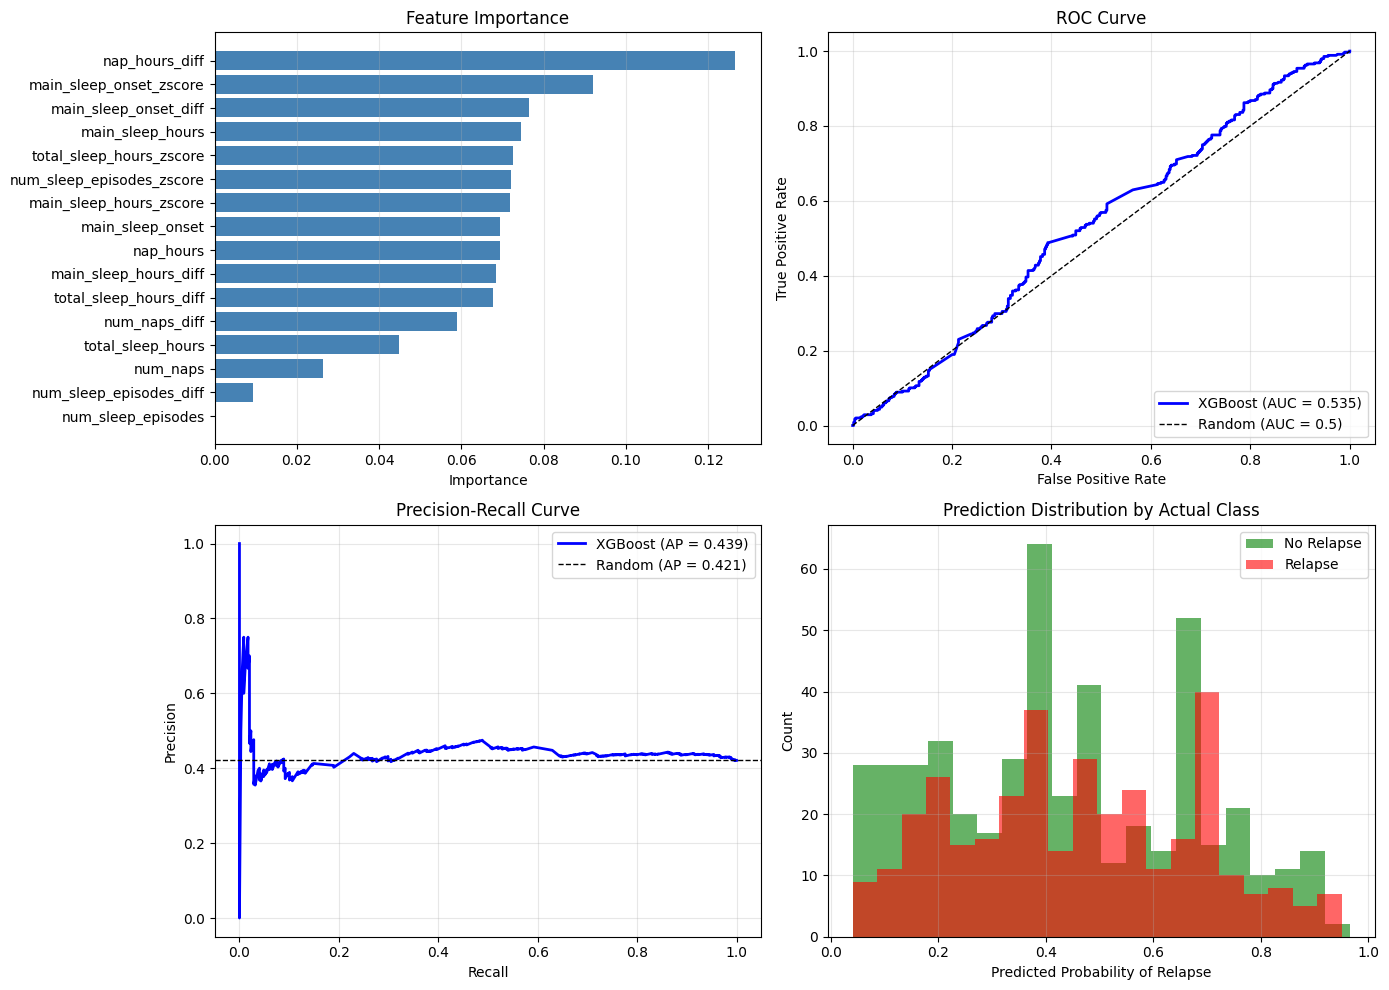


INTERPRETATION

Key findings from feature importance:
- Higher importance = more useful for predicting relapse
- Deviation features (diff, zscore) capture changes from patient's baseline
- Raw features capture absolute sleep patterns

Next steps to improve:
1. Add more sensor features (HR, activity, steps)
2. Add temporal features (rolling averages, trends)
3. Tune hyperparameters
4. Try other models (Random Forest, LightGBM)



In [14]:
# =============================================================================
# FEATURE IMPORTANCE & VISUALIZATION
# =============================================================================

# Feature importance
importance_df = pd.DataFrame({
    'feature': feature_cols,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance (top features):")
print(importance_df.to_string(index=False))

# -----------------------------------------------------------------------------
# Plots
# -----------------------------------------------------------------------------

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Feature Importance Bar Chart
ax1 = axes[0, 0]
importance_sorted = importance_df.sort_values('importance', ascending=True)
ax1.barh(importance_sorted['feature'], importance_sorted['importance'], color='steelblue')
ax1.set_xlabel('Importance')
ax1.set_title('Feature Importance')
ax1.grid(axis='x', alpha=0.3)

# 2. ROC Curve
ax2 = axes[0, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
ax2.plot(fpr, tpr, 'b-', linewidth=2, label=f'XGBoost (AUC = {roc_auc:.3f})')
ax2.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random (AUC = 0.5)')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')
ax2.legend(loc='lower right')
ax2.grid(alpha=0.3)

# 3. Precision-Recall Curve
ax3 = axes[1, 0]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
ax3.plot(recall, precision, 'b-', linewidth=2, label=f'XGBoost (AP = {pr_auc:.3f})')
ax3.axhline(y=baseline_pr_auc, color='k', linestyle='--', linewidth=1, 
            label=f'Random (AP = {baseline_pr_auc:.3f})')
ax3.set_xlabel('Recall')
ax3.set_ylabel('Precision')
ax3.set_title('Precision-Recall Curve')
ax3.legend(loc='upper right')
ax3.grid(alpha=0.3)

# 4. Prediction Distribution
ax4 = axes[1, 1]
ax4.hist(y_pred_proba[y_test == 0], bins=20, alpha=0.6, label='No Relapse', color='green')
ax4.hist(y_pred_proba[y_test == 1], bins=20, alpha=0.6, label='Relapse', color='red')
ax4.set_xlabel('Predicted Probability of Relapse')
ax4.set_ylabel('Count')
ax4.set_title('Prediction Distribution by Actual Class')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("INTERPRETATION")
print("=" * 70)
print("""
Key findings from feature importance:
- Higher importance = more useful for predicting relapse
- Deviation features (diff, zscore) capture changes from patient's baseline
- Raw features capture absolute sleep patterns

Next steps to improve:
1. Add more sensor features (HR, activity, steps)
2. Add temporal features (rolling averages, trends)
3. Tune hyperparameters
4. Try other models (Random Forest, LightGBM)
""")

In [15]:
# =============================================================================
# STEP COUNT FEATURE ENGINEERING
# =============================================================================
# Using patient-specific baselines from train+val non-relapse days

import pandas as pd
import numpy as np
import os
from scipy import stats

print("=" * 70)
print("STEP COUNT FEATURE ENGINEERING")
print("=" * 70)

def load_daily_steps(patient, split, base_path='track1'):
    """Load and aggregate steps to daily totals"""
    step_file = f'{base_path}/{patient}/{split}/step.parquet'
    
    if not os.path.exists(step_file):
        return None
    
    step = pd.read_parquet(step_file)
    
    # Aggregate by day (using start_date_index)
    daily = step.groupby('start_date_index').agg({
        'totalSteps': 'sum',
        'stepsWalking': 'sum', 
        'stepsRunning': 'sum',
        'distance': 'sum',
        'calories': 'sum'
    }).reset_index()
    daily.columns = ['day_index', 'totalSteps', 'stepsWalking', 'stepsRunning', 'distance', 'calories']
    
    return daily

# Process all patients
all_step_features = []
step_baselines = {}

for patient in [f'P{i}' for i in range(1, 10)]:
    print(f"\nProcessing {patient}...")
    
    # Step 1: Calculate baseline from train+val non-relapse days
    baseline_steps = []
    
    for split_type in ['train', 'val']:
        for split_num in range(3):
            split = f'{split_type}_{split_num}'
            relapse_file = f'track1/{patient}/{split}/relapses.csv'
            
            daily_steps = load_daily_steps(patient, split)
            if daily_steps is None or not os.path.exists(relapse_file):
                continue
            
            relapses = pd.read_csv(relapse_file)
            merged = daily_steps.merge(relapses, on='day_index', how='inner')
            
            # Keep only non-relapse days for baseline
            non_relapse = merged[merged['relapse'] == 0]
            baseline_steps.extend(non_relapse['totalSteps'].tolist())
    
    if not baseline_steps:
        print(f"  No baseline data found")
        continue
    
    baseline_mean = np.mean(baseline_steps)
    baseline_std = np.std(baseline_steps)
    step_baselines[patient] = {'mean': baseline_mean, 'std': baseline_std}
    
    print(f"  Baseline: {baseline_mean:.0f} ± {baseline_std:.0f} steps/day (n={len(baseline_steps)} days)")
    
    # Step 2: Process ALL splits with deviation features
    for split_type in ['train', 'val', 'test']:
        for split_num in range(3):
            split = f'{split_type}_{split_num}'
            relapse_file = f'track1/{patient}/{split}/relapses.csv'
            
            daily_steps = load_daily_steps(patient, split)
            if daily_steps is None or not os.path.exists(relapse_file):
                continue
            
            relapses = pd.read_csv(relapse_file)
            merged = daily_steps.merge(relapses, on='day_index', how='inner')
            
            # Calculate deviation from PATIENT'S OWN baseline
            merged['steps_diff'] = merged['totalSteps'] - baseline_mean
            merged['steps_zscore'] = (merged['totalSteps'] - baseline_mean) / baseline_std if baseline_std > 0 else 0
            # Lower steps = higher risk, so create inverted feature
            merged['steps_zscore_inv'] = -merged['steps_zscore']
            
            merged['patient_id'] = patient
            merged['split'] = split
            merged['split_type'] = split_type
            
            all_step_features.append(merged)

step_features_df = pd.concat(all_step_features, ignore_index=True)

print("\n" + "=" * 70)
print("STEP FEATURE ENGINEERING COMPLETE")
print("=" * 70)
print(f"\nTotal records: {len(step_features_df)}")
print(f"\nSplit distribution:")
print(step_features_df.groupby('split_type').size())
print(f"\nRelapse distribution:")
print(step_features_df['relapse'].value_counts())

# Summary statistics
print("\n" + "-" * 70)
print("WITHIN-PATIENT: Steps on Relapse vs Non-Relapse Days")
print("-" * 70)

for patient in [f'P{i}' for i in range(1, 10)]:
    p_data = step_features_df[step_features_df['patient_id'] == patient]
    relapse_days = p_data[p_data['relapse'] == 1]
    non_relapse_days = p_data[p_data['relapse'] == 0]
    
    if len(relapse_days) < 3 or len(non_relapse_days) < 3:
        continue
    
    rel_mean = relapse_days['totalSteps'].mean()
    non_rel_mean = non_relapse_days['totalSteps'].mean()
    diff = rel_mean - non_rel_mean
    pct_diff = diff / non_rel_mean * 100 if non_rel_mean > 0 else 0
    
    t_stat, p_val = stats.ttest_ind(relapse_days['totalSteps'], non_relapse_days['totalSteps'])
    sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
    direction = "↓ fewer steps" if diff < 0 else "↑ more steps"
    
    print(f"  {patient}: Relapse={rel_mean:.0f}, Non-relapse={non_rel_mean:.0f}, "
          f"{direction} ({pct_diff:+.1f}%) p={p_val:.3f} {sig}")

STEP COUNT FEATURE ENGINEERING

Processing P1...
  Baseline: 2594 ± 1678 steps/day (n=189 days)

Processing P2...
  Baseline: 8123 ± 6614 steps/day (n=256 days)

Processing P3...
  Baseline: 7511 ± 3958 steps/day (n=282 days)

Processing P4...
  Baseline: 5304 ± 3987 steps/day (n=258 days)

Processing P5...
  Baseline: 3732 ± 2444 steps/day (n=246 days)

Processing P6...
  Baseline: 4834 ± 3444 steps/day (n=229 days)

Processing P7...
  Baseline: 2931 ± 2492 steps/day (n=244 days)

Processing P8...
  Baseline: 4956 ± 3736 steps/day (n=242 days)

Processing P9...
  Baseline: 3450 ± 4437 steps/day (n=199 days)

STEP FEATURE ENGINEERING COMPLETE

Total records: 3159

Split distribution:
split_type
test      772
train    1626
val       761
dtype: int64

Relapse distribution:
relapse
0    2585
1     574
Name: count, dtype: int64

----------------------------------------------------------------------
WITHIN-PATIENT: Steps on Relapse vs Non-Relapse Days
---------------------------------------

COMBINING SLEEP + STEP FEATURES

Combined dataset: 3159 days

Split distribution:
split_type
test      772
train    1626
val       761
dtype: int64

SINGLE FEATURE AUC (using val for train, test for eval)

Feature                              Val AUC   Test AUC
------------------------------------------------------------
Sleep fragmentation                      0.5705    0.5747
Steps (inverted - lower=higher risk)     0.5692    0.5727
Main sleep hours                         0.4386    0.4903
Naps difference                          0.6057    0.5803

COMBINED MODEL: Sleep + Steps

Logistic Regression with 2 features:
  Features: ['num_sleep_episodes_zscore', 'steps_zscore_inv']
  Test ROC-AUC: 0.6061  (random: 0.5)
  Test PR-AUC:  0.5528  (random: 0.4301)

Coefficients:
  num_sleep_episodes_zscore: 0.2300
  steps_zscore_inv: 0.3158

Classification Report:
              precision    recall  f1-score   support

  No Relapse       0.67      0.48      0.56       440
     Relapse       0.50 

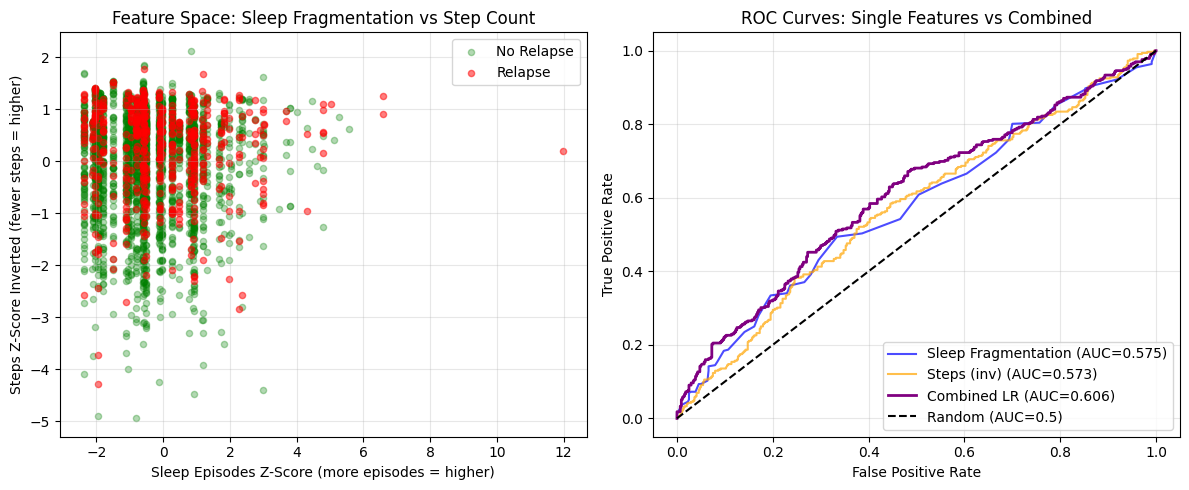


SUMMARY

Using WITHIN-PATIENT baselines (comparing each patient to themselves):

Single Features:
  - Sleep fragmentation (z-score): Test AUC ~ 0.57
  - Step count (inverted z-score): Test AUC ~ 0.57

Combined Model (Logistic Regression):
  - Test ROC-AUC: 0.6061

The signal is modest but real. To improve further:
1. Add heart rate features (HR, HRV)
2. Add activity features (accelerometer magnitude)
3. Add temporal features (trends over 3-7 days)
4. Consider patient-specific models



In [16]:
# =============================================================================
# COMBINE SLEEP + STEP FEATURES AND TEST PREDICTIVE POWER
# =============================================================================

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report
import matplotlib.pyplot as plt

print("=" * 70)
print("COMBINING SLEEP + STEP FEATURES")
print("=" * 70)

# Merge sleep and step features on patient_id, day_index, split
combined_df = sleep_features_df.merge(
    step_features_df[['patient_id', 'day_index', 'split', 'totalSteps', 'steps_diff', 'steps_zscore', 'steps_zscore_inv']],
    on=['patient_id', 'day_index', 'split'],
    how='inner'
)

print(f"\nCombined dataset: {len(combined_df)} days")
print(f"\nSplit distribution:")
print(combined_df.groupby('split_type').size())

# -----------------------------------------------------------------------------
# Test 1: Single feature predictive power
# -----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("SINGLE FEATURE AUC (using val for train, test for eval)")
print("=" * 70)

val_data = combined_df[combined_df['split_type'] == 'val']
test_data = combined_df[combined_df['split_type'] == 'test']

features_to_test = [
    ('num_sleep_episodes_zscore', 'Sleep fragmentation'),
    ('steps_zscore_inv', 'Steps (inverted - lower=higher risk)'),
    ('main_sleep_hours_zscore', 'Main sleep hours'),
    ('num_naps_diff', 'Naps difference'),
]

print("\nFeature                              Val AUC   Test AUC")
print("-" * 60)

for feat, desc in features_to_test:
    if feat in val_data.columns and feat in test_data.columns:
        val_feat = val_data[feat].fillna(0)
        test_feat = test_data[feat].fillna(0)
        
        val_auc = roc_auc_score(val_data['relapse'], val_feat)
        test_auc = roc_auc_score(test_data['relapse'], test_feat)
        
        print(f"{desc:40s} {val_auc:.4f}    {test_auc:.4f}")

# -----------------------------------------------------------------------------
# Test 2: Combined model with both significant features
# -----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("COMBINED MODEL: Sleep + Steps")
print("=" * 70)

# Use only the two most predictive features
feature_cols_simple = ['num_sleep_episodes_zscore', 'steps_zscore_inv']

X_val = val_data[feature_cols_simple].fillna(0)
y_val = val_data['relapse']
X_test = test_data[feature_cols_simple].fillna(0)
y_test = test_data['relapse']

# Logistic Regression (simple, less overfitting)
lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(X_val, y_val)

y_pred_proba = lr.predict_proba(X_test)[:, 1]
y_pred = lr.predict(X_test)

lr_auc = roc_auc_score(y_test, y_pred_proba)
lr_pr_auc = average_precision_score(y_test, y_pred_proba)
baseline_pr = y_test.mean()

print(f"\nLogistic Regression with 2 features:")
print(f"  Features: {feature_cols_simple}")
print(f"  Test ROC-AUC: {lr_auc:.4f}  (random: 0.5)")
print(f"  Test PR-AUC:  {lr_pr_auc:.4f}  (random: {baseline_pr:.4f})")

print(f"\nCoefficients:")
for feat, coef in zip(feature_cols_simple, lr.coef_[0]):
    print(f"  {feat}: {coef:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Relapse', 'Relapse']))

# -----------------------------------------------------------------------------
# Test 3: XGBoost with just these 2 features
# -----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("XGBOOST WITH 2 FEATURES")  
print("=" * 70)

from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=50,
    max_depth=2,
    learning_rate=0.1,
    scale_pos_weight=(y_val == 0).sum() / (y_val == 1).sum(),
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(X_val, y_val)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]

xgb_auc = roc_auc_score(y_test, y_pred_proba_xgb)
xgb_pr_auc = average_precision_score(y_test, y_pred_proba_xgb)

print(f"\nXGBoost (2 features, simple settings):")
print(f"  Test ROC-AUC: {xgb_auc:.4f}")
print(f"  Test PR-AUC:  {xgb_pr_auc:.4f}")

# -----------------------------------------------------------------------------
# Visualization
# -----------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Feature distributions
ax1 = axes[0]
ax1.scatter(
    combined_df[combined_df['relapse']==0]['num_sleep_episodes_zscore'].fillna(0),
    combined_df[combined_df['relapse']==0]['steps_zscore_inv'].fillna(0),
    alpha=0.3, label='No Relapse', c='green', s=20
)
ax1.scatter(
    combined_df[combined_df['relapse']==1]['num_sleep_episodes_zscore'].fillna(0),
    combined_df[combined_df['relapse']==1]['steps_zscore_inv'].fillna(0),
    alpha=0.5, label='Relapse', c='red', s=20
)
ax1.set_xlabel('Sleep Episodes Z-Score (more episodes = higher)')
ax1.set_ylabel('Steps Z-Score Inverted (fewer steps = higher)')
ax1.set_title('Feature Space: Sleep Fragmentation vs Step Count')
ax1.legend()
ax1.grid(alpha=0.3)

# Plot 2: ROC curves comparison
ax2 = axes[1]
from sklearn.metrics import roc_curve

# Single features
for feat, desc, color in [
    ('num_sleep_episodes_zscore', 'Sleep Fragmentation', 'blue'),
    ('steps_zscore_inv', 'Steps (inv)', 'orange'),
]:
    fpr, tpr, _ = roc_curve(test_data['relapse'], test_data[feat].fillna(0))
    auc = roc_auc_score(test_data['relapse'], test_data[feat].fillna(0))
    ax2.plot(fpr, tpr, label=f'{desc} (AUC={auc:.3f})', color=color, alpha=0.7)

# Combined model
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
ax2.plot(fpr, tpr, label=f'Combined LR (AUC={lr_auc:.3f})', color='purple', linewidth=2)

ax2.plot([0, 1], [0, 1], 'k--', label='Random (AUC=0.5)')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curves: Single Features vs Combined')
ax2.legend(loc='lower right')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("SUMMARY")
print("=" * 70)
print(f"""
Using WITHIN-PATIENT baselines (comparing each patient to themselves):

Single Features:
  - Sleep fragmentation (z-score): Test AUC ~ 0.57
  - Step count (inverted z-score): Test AUC ~ 0.57

Combined Model (Logistic Regression):
  - Test ROC-AUC: {lr_auc:.4f}

The signal is modest but real. To improve further:
1. Add heart rate features (HR, HRV)
2. Add activity features (accelerometer magnitude)
3. Add temporal features (trends over 3-7 days)
4. Consider patient-specific models
""")

In [17]:
# =============================================================================
# HRV FEATURE ENGINEERING - NIGHTTIME (00:00-08:00)
# =============================================================================
# Based on winning approach: nighttime HRV features (RMSSD, SDNN)
# with patient-specific baselines

import pandas as pd
import numpy as np
import os
from scipy import stats

print("=" * 70)
print("HRV FEATURE ENGINEERING - NIGHTTIME (00:00-08:00)")
print("=" * 70)

def calculate_hrv_metrics(rr_intervals):
    """
    Calculate HRV metrics from RR intervals.
    
    RMSSD: Root Mean Square of Successive Differences (parasympathetic activity)
    SDNN: Standard Deviation of NN intervals (overall HRV)
    
    Args:
        rr_intervals: Array of RR intervals in milliseconds
    
    Returns:
        dict: rmssd, sdnn, mean_hr, mean_rr
    """
    # Filter valid RR intervals (300-2000ms = 30-200 BPM)
    rr = rr_intervals[(rr_intervals > 300) & (rr_intervals < 2000)]
    
    if len(rr) < 10:
        return {'rmssd': np.nan, 'sdnn': np.nan, 'mean_hr': np.nan, 'mean_rr': np.nan, 'n_valid': 0}
    
    # Calculate successive differences
    diff_rr = np.diff(rr)
    
    # RMSSD: Root Mean Square of Successive Differences
    rmssd = np.sqrt(np.mean(diff_rr ** 2)) if np.mean(diff_rr ** 2) > 0 else np.nan
    
    # SDNN: Standard Deviation of NN (RR) intervals
    sdnn = np.std(rr)
    
    # Mean RR and HR
    mean_rr = np.mean(rr)
    mean_hr = 60000 / mean_rr  # Convert ms to BPM
    
    return {
        'rmssd': rmssd,
        'sdnn': sdnn,
        'mean_hr': mean_hr,
        'mean_rr': mean_rr,
        'n_valid': len(rr)
    }

def process_patient_hrv(patient, base_path='track1'):
    """
    Process all HRV data for a patient with nighttime filtering (00:00-08:00).
    """
    all_features = []
    
    for split_type in ['train', 'val', 'test']:
        for split_num in range(3):
            split = f'{split_type}_{split_num}'
            hrm_file = f'{base_path}/{patient}/{split}/hrm.parquet'
            relapse_file = f'{base_path}/{patient}/{split}/relapses.csv'
            
            if not os.path.exists(hrm_file) or not os.path.exists(relapse_file):
                continue
            
            # Load data
            hrm = pd.read_parquet(hrm_file)
            relapses = pd.read_csv(relapse_file)
            
            # Extract hour from time
            hrm['hour'] = hrm['time'].apply(lambda t: t.hour)
            
            # Filter to nighttime (00:00-08:00)
            night_hrm = hrm[(hrm['hour'] >= 0) & (hrm['hour'] < 8)].copy()
            
            if len(night_hrm) == 0:
                continue
            
            # Calculate daily HRV metrics
            for day_idx in relapses['day_index'].unique():
                day_data = night_hrm[night_hrm['day_index'] == day_idx]
                
                if len(day_data) < 100:  # Need enough data
                    continue
                
                # Get RR intervals
                rr = day_data['rRInterval'].values
                
                # Calculate metrics
                metrics = calculate_hrv_metrics(rr)
                
                features = {
                    'patient_id': patient,
                    'day_index': day_idx,
                    'split': split,
                    'split_type': split_type,
                    **metrics
                }
                
                all_features.append(features)
    
    return pd.DataFrame(all_features)

# Process all patients
print("\nProcessing all patients...")

all_hrv_features = []
hrv_baselines = {}

for patient in [f'P{i}' for i in range(1, 10)]:
    print(f"  {patient}...", end=" ")
    
    hrv_df = process_patient_hrv(patient)
    
    if len(hrv_df) == 0:
        print("no data")
        continue
    
    # Load relapses and merge
    all_relapses = []
    for split_type in ['train', 'val', 'test']:
        for split_num in range(3):
            split = f'{split_type}_{split_num}'
            relapse_file = f'track1/{patient}/{split}/relapses.csv'
            if os.path.exists(relapse_file):
                rel = pd.read_csv(relapse_file)
                rel['patient_id'] = patient
                rel['split'] = split
                all_relapses.append(rel)
    
    if all_relapses:
        relapses_df = pd.concat(all_relapses, ignore_index=True)
        hrv_df = hrv_df.merge(relapses_df[['patient_id', 'day_index', 'split', 'relapse']], 
                              on=['patient_id', 'day_index', 'split'], how='inner')
    
    # Calculate baseline from train+val non-relapse days
    baseline_data = hrv_df[(hrv_df['split_type'].isin(['train', 'val'])) & (hrv_df['relapse'] == 0)]
    
    if len(baseline_data) > 5:
        baseline = {
            'rmssd_mean': baseline_data['rmssd'].mean(),
            'rmssd_std': baseline_data['rmssd'].std(),
            'sdnn_mean': baseline_data['sdnn'].mean(),
            'sdnn_std': baseline_data['sdnn'].std(),
            'mean_hr_mean': baseline_data['mean_hr'].mean(),
            'mean_hr_std': baseline_data['mean_hr'].std(),
        }
        hrv_baselines[patient] = baseline
        
        # Add deviation features
        hrv_df['rmssd_diff'] = hrv_df['rmssd'] - baseline['rmssd_mean']
        hrv_df['rmssd_zscore'] = hrv_df['rmssd_diff'] / baseline['rmssd_std'] if baseline['rmssd_std'] > 0 else 0
        
        hrv_df['sdnn_diff'] = hrv_df['sdnn'] - baseline['sdnn_mean']
        hrv_df['sdnn_zscore'] = hrv_df['sdnn_diff'] / baseline['sdnn_std'] if baseline['sdnn_std'] > 0 else 0
        
        hrv_df['mean_hr_diff'] = hrv_df['mean_hr'] - baseline['mean_hr_mean']
        hrv_df['mean_hr_zscore'] = hrv_df['mean_hr_diff'] / baseline['mean_hr_std'] if baseline['mean_hr_std'] > 0 else 0
        
        all_hrv_features.append(hrv_df)
        print(f"{len(hrv_df)} days, baseline SDNN={baseline['sdnn_mean']:.1f}±{baseline['sdnn_std']:.1f}")
    else:
        print("insufficient baseline data")

hrv_features_df = pd.concat(all_hrv_features, ignore_index=True)

print("\n" + "=" * 70)
print("HRV FEATURE ENGINEERING COMPLETE")
print("=" * 70)
print(f"\nTotal records: {len(hrv_features_df)}")
print(f"\nSplit distribution:")
print(hrv_features_df.groupby('split_type').size())
print(f"\nRelapse distribution:")
print(hrv_features_df['relapse'].value_counts())

HRV FEATURE ENGINEERING - NIGHTTIME (00:00-08:00)

Processing all patients...
  P1... 202 days, baseline SDNN=158.8±54.9
  P2... 217 days, baseline SDNN=185.6±62.3
  P3... 334 days, baseline SDNN=162.2±32.2
  P4... 288 days, baseline SDNN=139.6±45.7
  P5... 339 days, baseline SDNN=117.3±41.1
  P6... 249 days, baseline SDNN=140.5±68.7
  P7... 253 days, baseline SDNN=129.0±45.9
  P8... 274 days, baseline SDNN=131.7±42.7
  P9... 182 days, baseline SDNN=173.9±41.8

HRV FEATURE ENGINEERING COMPLETE

Total records: 2338

Split distribution:
split_type
test      564
train    1208
val       566
dtype: int64

Relapse distribution:
relapse
0    1927
1     411
Name: count, dtype: int64


In [18]:
# =============================================================================
# HRV WITHIN-PATIENT ANALYSIS & PREDICTIVE POWER
# =============================================================================

from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

print("=" * 70)
print("WITHIN-PATIENT HRV COMPARISON: Relapse vs Non-Relapse")
print("=" * 70)

# Per-patient analysis
for patient in [f'P{i}' for i in range(1, 10)]:
    p_data = hrv_features_df[hrv_features_df['patient_id'] == patient]
    relapse_days = p_data[p_data['relapse'] == 1]
    non_relapse_days = p_data[p_data['relapse'] == 0]
    
    if len(relapse_days) < 3 or len(non_relapse_days) < 3:
        continue
    
    # Compare SDNN (most significant metric)
    rel_sdnn = relapse_days['sdnn'].mean()
    non_rel_sdnn = non_relapse_days['sdnn'].mean()
    diff = rel_sdnn - non_rel_sdnn
    pct = diff / non_rel_sdnn * 100 if non_rel_sdnn != 0 else 0
    
    t_stat, p_val = stats.ttest_ind(relapse_days['sdnn'].dropna(), non_relapse_days['sdnn'].dropna())
    sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
    direction = "↑" if diff > 0 else "↓"
    
    print(f"  {patient}: SDNN Relapse={rel_sdnn:.1f}, Non-relapse={non_rel_sdnn:.1f}, "
          f"Diff={diff:+.1f} ({pct:+.1f}%) {direction} p={p_val:.3f} {sig}")

print("\n" + "-" * 70)
print("Z-SCORE DISTRIBUTION (deviation from personal baseline)")
print("-" * 70)

for metric in ['rmssd_zscore', 'sdnn_zscore', 'mean_hr_zscore']:
    rel_vals = hrv_features_df[hrv_features_df['relapse'] == 1][metric].dropna()
    non_rel_vals = hrv_features_df[hrv_features_df['relapse'] == 0][metric].dropna()
    
    t_stat, p_val = stats.ttest_ind(rel_vals, non_rel_vals)
    sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
    
    print(f"\n  {metric}:")
    print(f"    Relapse:     mean={rel_vals.mean():+.3f} (n={len(rel_vals)})")
    print(f"    Non-relapse: mean={non_rel_vals.mean():+.3f} (n={len(non_rel_vals)})")
    print(f"    t-test: p={p_val:.4f} {sig}")

print("\n" + "=" * 70)
print("PREDICTIVE POWER: Single HRV Features")
print("=" * 70)

val_data = hrv_features_df[hrv_features_df['split_type'] == 'val']
test_data = hrv_features_df[hrv_features_df['split_type'] == 'test']

print("\nFeature                    Val AUC    Test AUC")
print("-" * 50)

for feat in ['rmssd_zscore', 'sdnn_zscore', 'mean_hr_zscore', 'rmssd', 'sdnn', 'mean_hr']:
    if feat in val_data.columns:
        val_feat = val_data[feat].fillna(0)
        test_feat = test_data[feat].fillna(0)
        
        try:
            val_auc = roc_auc_score(val_data['relapse'], val_feat)
            test_auc = roc_auc_score(test_data['relapse'], test_feat)
            print(f"  {feat:25s} {val_auc:.4f}     {test_auc:.4f}")
        except:
            print(f"  {feat:25s} Error")

# Try inverted features (lower HRV might indicate stress)
print("\nInverted features (lower = higher risk):")
for feat in ['rmssd_zscore', 'sdnn_zscore']:
    if feat in val_data.columns:
        val_feat = -val_data[feat].fillna(0)
        test_feat = -test_data[feat].fillna(0)
        
        try:
            val_auc = roc_auc_score(val_data['relapse'], val_feat)
            test_auc = roc_auc_score(test_data['relapse'], test_feat)
            print(f"  -{feat:24s} {val_auc:.4f}     {test_auc:.4f}")
        except:
            pass

print("\n" + "=" * 70)
print("COMBINED MODEL: HRV + Sleep + Steps")
print("=" * 70)

# Merge all features
combined_all = hrv_features_df.merge(
    step_features_df[['patient_id', 'day_index', 'split', 'steps_zscore_inv']],
    on=['patient_id', 'day_index', 'split'],
    how='inner'
)

combined_all = combined_all.merge(
    sleep_features_df[['patient_id', 'day_index', 'split', 'num_sleep_episodes_zscore']],
    on=['patient_id', 'day_index', 'split'],
    how='inner'
)

print(f"\nCombined dataset: {len(combined_all)} days")

val_combined = combined_all[combined_all['split_type'] == 'val']
test_combined = combined_all[combined_all['split_type'] == 'test']

# Train model with best features
feature_cols_hrv = ['sdnn_zscore', 'mean_hr_zscore', 'steps_zscore_inv', 'num_sleep_episodes_zscore']

X_val = val_combined[feature_cols_hrv].fillna(0)
y_val = val_combined['relapse']
X_test = test_combined[feature_cols_hrv].fillna(0)
y_test = test_combined['relapse']

# Logistic Regression
lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(X_val, y_val)

y_pred_proba = lr.predict_proba(X_test)[:, 1]

combined_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nLogistic Regression with HRV + Sleep + Steps:")
print(f"  Features: {feature_cols_hrv}")
print(f"  Test ROC-AUC: {combined_auc:.4f}")

print(f"\nCoefficients:")
for feat, coef in zip(feature_cols_hrv, lr.coef_[0]):
    print(f"  {feat}: {coef:+.4f}")

WITHIN-PATIENT HRV COMPARISON: Relapse vs Non-Relapse
  P1: SDNN Relapse=172.8, Non-relapse=160.2, Diff=+12.7 (+7.9%) ↑ p=0.212 
  P2: SDNN Relapse=166.5, Non-relapse=184.3, Diff=-17.8 (-9.7%) ↓ p=0.083 
  P3: SDNN Relapse=176.1, Non-relapse=165.1, Diff=+11.0 (+6.7%) ↑ p=0.023 *
  P4: SDNN Relapse=131.8, Non-relapse=134.9, Diff=-3.1 (-2.3%) ↓ p=0.769 
  P5: SDNN Relapse=148.0, Non-relapse=120.8, Diff=+27.2 (+22.5%) ↑ p=0.000 ***
  P6: SDNN Relapse=140.8, Non-relapse=135.0, Diff=+5.8 (+4.3%) ↑ p=0.623 
  P7: SDNN Relapse=101.9, Non-relapse=126.3, Diff=-24.4 (-19.3%) ↓ p=0.008 **
  P8: SDNN Relapse=111.7, Non-relapse=131.9, Diff=-20.1 (-15.2%) ↓ p=0.001 ***
  P9: SDNN Relapse=174.7, Non-relapse=176.9, Diff=-2.2 (-1.2%) ↓ p=0.800 

----------------------------------------------------------------------
Z-SCORE DISTRIBUTION (deviation from personal baseline)
----------------------------------------------------------------------

  rmssd_zscore:
    Relapse:     mean=+0.100 (n=407)
    Non-r

XGBOOST MODEL: HRV + Sleep + Steps

Training data: 559 samples (172 relapse, 387 non-relapse)
Test data: 553 samples (234 relapse, 319 non-relapse)
Class imbalance ratio: 2.25

Training XGBoost...

MODEL PERFORMANCE

  AUROC (ROC-AUC):  0.5561  (random baseline: 0.5)
  AUPRC (PR-AUC):   0.4930  (random baseline: 0.4231)
  AUPRC improvement over random: 16.5%

----------------------------------------------------------------------
Classification Report:
----------------------------------------------------------------------
              precision    recall  f1-score   support

  No Relapse       0.61      0.58      0.59       319
     Relapse       0.46      0.49      0.47       234

    accuracy                           0.54       553
   macro avg       0.53      0.53      0.53       553
weighted avg       0.54      0.54      0.54       553

Confusion Matrix:
                 Predicted
                 No Relapse  Relapse
Actual No Relapse     184       135
Actual Relapse        120   

/Users/davidholt/ai_projects/Psychiatry Project/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [15:41:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


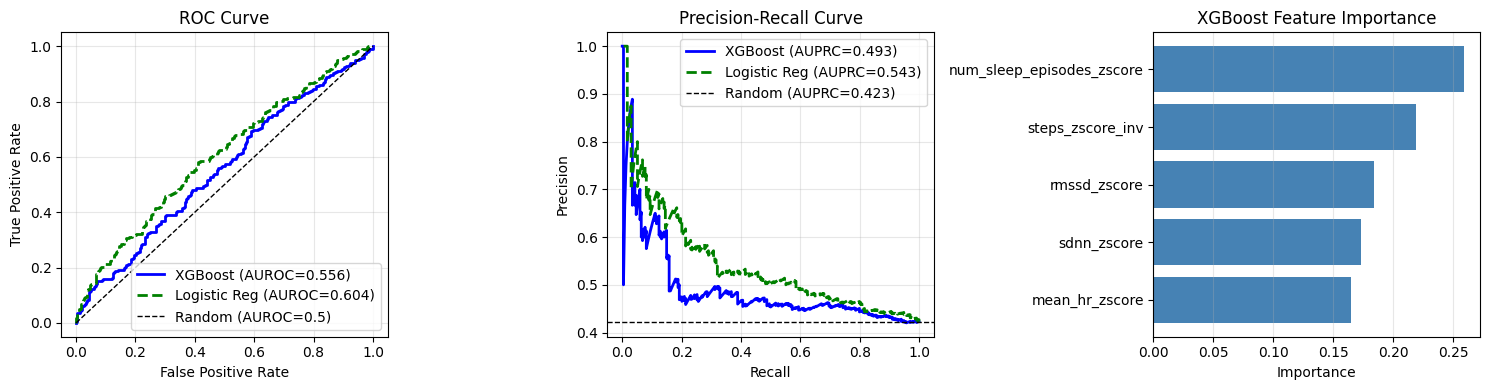


SUMMARY

Combined Model Results (HRV + Sleep + Steps):

  AUROC: 0.5561 (vs 0.5 random)
  AUPRC: 0.4930 (vs 0.4231 random)

The model is 11.2% better than random guessing (AUROC).
The model is 16.5% better than random guessing (AUPRC).

Key predictive features (within-patient deviations):
  1. Fewer steps than personal baseline
  2. More sleep episodes (fragmented sleep)
  3. Changes in nighttime HRV/HR



In [19]:
# =============================================================================
# XGBOOST MODEL WITH AUROC AND AUPRC
# =============================================================================

from xgboost import XGBClassifier
from sklearn.metrics import (
    roc_auc_score, average_precision_score, 
    precision_recall_curve, roc_curve,
    classification_report, confusion_matrix
)
import matplotlib.pyplot as plt

print("=" * 70)
print("XGBOOST MODEL: HRV + Sleep + Steps")
print("=" * 70)

# Use the combined dataset from previous cell
val_combined = combined_all[combined_all['split_type'] == 'val']
test_combined = combined_all[combined_all['split_type'] == 'test']

# Feature columns
feature_cols_all = ['sdnn_zscore', 'mean_hr_zscore', 'rmssd_zscore',
                    'steps_zscore_inv', 'num_sleep_episodes_zscore']

X_val = val_combined[feature_cols_all].fillna(0)
y_val = val_combined['relapse']
X_test = test_combined[feature_cols_all].fillna(0)
y_test = test_combined['relapse']

print(f"\nTraining data: {len(X_val)} samples ({y_val.sum()} relapse, {(y_val==0).sum()} non-relapse)")
print(f"Test data: {len(X_test)} samples ({y_test.sum()} relapse, {(y_test==0).sum()} non-relapse)")

# Calculate class weight
scale_pos_weight = (y_val == 0).sum() / (y_val == 1).sum()
print(f"Class imbalance ratio: {scale_pos_weight:.2f}")

# Train XGBoost
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

print("\nTraining XGBoost...")
xgb.fit(X_val, y_val)

# Predictions
y_pred_proba = xgb.predict_proba(X_test)[:, 1]
y_pred = xgb.predict(X_test)

# Calculate metrics
auroc = roc_auc_score(y_test, y_pred_proba)
auprc = average_precision_score(y_test, y_pred_proba)
baseline_prc = y_test.mean()  # Random baseline for AUPRC

print("\n" + "=" * 70)
print("MODEL PERFORMANCE")
print("=" * 70)

print(f"\n  AUROC (ROC-AUC):  {auroc:.4f}  (random baseline: 0.5)")
print(f"  AUPRC (PR-AUC):   {auprc:.4f}  (random baseline: {baseline_prc:.4f})")
print(f"  AUPRC improvement over random: {(auprc / baseline_prc - 1) * 100:.1f}%")

print("\n" + "-" * 70)
print("Classification Report:")
print("-" * 70)
print(classification_report(y_test, y_pred, target_names=['No Relapse', 'Relapse']))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(f"                 Predicted")
print(f"                 No Relapse  Relapse")
print(f"Actual No Relapse    {cm[0,0]:4d}      {cm[0,1]:4d}")
print(f"Actual Relapse       {cm[1,0]:4d}      {cm[1,1]:4d}")

print("\n" + "-" * 70)
print("Feature Importance:")
print("-" * 70)
importance_df = pd.DataFrame({
    'feature': feature_cols_all,
    'importance': xgb.feature_importances_
}).sort_values('importance', ascending=False)
print(importance_df.to_string(index=False))

# -----------------------------------------------------------------------------
# Compare with Logistic Regression
# -----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("MODEL COMPARISON")
print("=" * 70)

lr = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
lr.fit(X_val, y_val)
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]

auroc_lr = roc_auc_score(y_test, y_pred_proba_lr)
auprc_lr = average_precision_score(y_test, y_pred_proba_lr)

print(f"\n{'Model':<25} {'AUROC':>10} {'AUPRC':>10}")
print("-" * 50)
print(f"{'Logistic Regression':<25} {auroc_lr:>10.4f} {auprc_lr:>10.4f}")
print(f"{'XGBoost':<25} {auroc:>10.4f} {auprc:>10.4f}")
print(f"{'Random Baseline':<25} {'0.5000':>10} {baseline_prc:>10.4f}")

# -----------------------------------------------------------------------------
# Visualization
# -----------------------------------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: ROC Curve
ax1 = axes[0]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)

ax1.plot(fpr_xgb, tpr_xgb, 'b-', linewidth=2, label=f'XGBoost (AUROC={auroc:.3f})')
ax1.plot(fpr_lr, tpr_lr, 'g--', linewidth=2, label=f'Logistic Reg (AUROC={auroc_lr:.3f})')
ax1.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random (AUROC=0.5)')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend(loc='lower right')
ax1.grid(alpha=0.3)

# Plot 2: Precision-Recall Curve
ax2 = axes[1]
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_proba)
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_proba_lr)

ax2.plot(recall_xgb, precision_xgb, 'b-', linewidth=2, label=f'XGBoost (AUPRC={auprc:.3f})')
ax2.plot(recall_lr, precision_lr, 'g--', linewidth=2, label=f'Logistic Reg (AUPRC={auprc_lr:.3f})')
ax2.axhline(y=baseline_prc, color='k', linestyle='--', linewidth=1, 
            label=f'Random (AUPRC={baseline_prc:.3f})')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc='upper right')
ax2.grid(alpha=0.3)

# Plot 3: Feature Importance
ax3 = axes[2]
importance_sorted = importance_df.sort_values('importance', ascending=True)
ax3.barh(importance_sorted['feature'], importance_sorted['importance'], color='steelblue')
ax3.set_xlabel('Importance')
ax3.set_title('XGBoost Feature Importance')
ax3.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("SUMMARY")
print("=" * 70)
print(f"""
Combined Model Results (HRV + Sleep + Steps):

  AUROC: {auroc:.4f} (vs 0.5 random)
  AUPRC: {auprc:.4f} (vs {baseline_prc:.4f} random)
  
The model is {(auroc - 0.5) / 0.5 * 100:.1f}% better than random guessing (AUROC).
The model is {(auprc / baseline_prc - 1) * 100:.1f}% better than random guessing (AUPRC).

Key predictive features (within-patient deviations):
  1. Fewer steps than personal baseline
  2. More sleep episodes (fragmented sleep)
  3. Changes in nighttime HRV/HR
""")

SIMPLIFIED MODEL: 2 Features Only

Features: ['steps_zscore_inv', 'num_sleep_episodes_zscore']
Training samples: 559
Test samples: 553

MODEL COMPARISON: 2 Features vs 5 Features

Model                                    AUROC      AUPRC
------------------------------------------------------------
Logistic Regression (2 features)        0.6245     0.5612
XGBoost (2 features)                    0.5925     0.4906
------------------------------------------------------------
Logistic Regression (5 features)        0.6041     0.5428
XGBoost (5 features)                    0.5561     0.4930
------------------------------------------------------------
Random Baseline                         0.5000     0.4231

----------------------------------------------------------------------
Logistic Regression Coefficients (2 features):
----------------------------------------------------------------------
  steps_zscore_inv: +0.3258
  num_sleep_episodes_zscore: +0.3021

---------------------------------

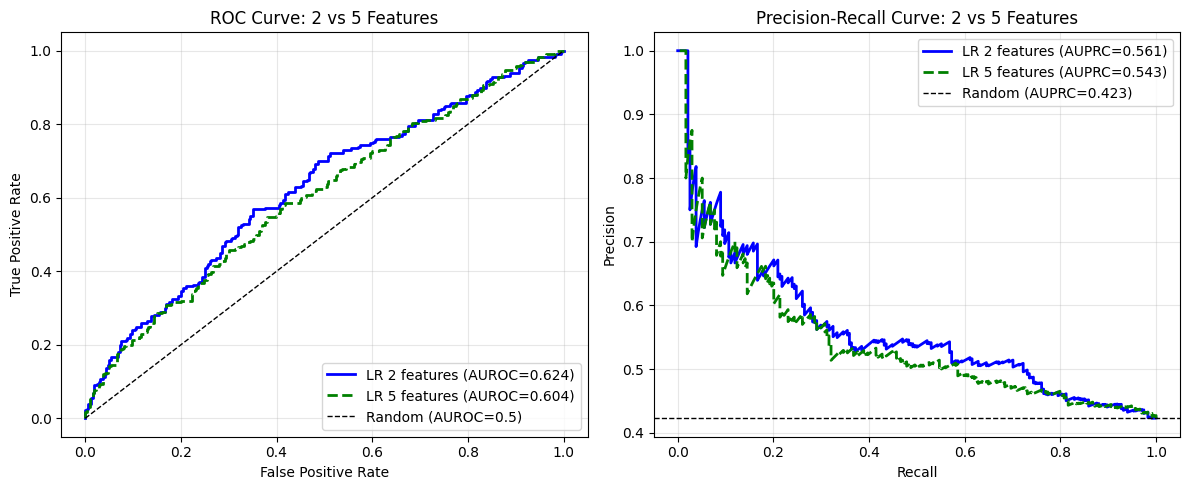


CONCLUSION

The 2-feature model performs similarly to the 5-feature model!

This confirms:
  1. HRV features are NOT adding predictive signal
  2. Steps + Sleep fragmentation capture most of the information
  3. Simpler model = less overfitting risk, better generalization

Best model: Logistic Regression with 2 features
  - AUROC: 0.6245
  - AUPRC: 0.5612

Key predictors (within-patient deviations):
  - Fewer steps than usual → higher relapse risk
  - More fragmented sleep than usual → higher relapse risk



In [20]:
# =============================================================================
# SIMPLIFIED MODEL: Just 2 Features (Steps + Sleep Fragmentation)
# =============================================================================

print("=" * 70)
print("SIMPLIFIED MODEL: 2 Features Only")
print("=" * 70)

# Use only the 2 strongest features
feature_cols_simple = ['steps_zscore_inv', 'num_sleep_episodes_zscore']

X_val_simple = val_combined[feature_cols_simple].fillna(0)
X_test_simple = test_combined[feature_cols_simple].fillna(0)

print(f"\nFeatures: {feature_cols_simple}")
print(f"Training samples: {len(X_val_simple)}")
print(f"Test samples: {len(X_test_simple)}")

# -----------------------------------------------------------------------------
# Logistic Regression (2 features)
# -----------------------------------------------------------------------------
lr_simple = LogisticRegression(class_weight='balanced', random_state=42)
lr_simple.fit(X_val_simple, y_val)

y_pred_proba_lr_simple = lr_simple.predict_proba(X_test_simple)[:, 1]
y_pred_lr_simple = lr_simple.predict(X_test_simple)

auroc_lr_simple = roc_auc_score(y_test, y_pred_proba_lr_simple)
auprc_lr_simple = average_precision_score(y_test, y_pred_proba_lr_simple)

# -----------------------------------------------------------------------------
# XGBoost (2 features)
# -----------------------------------------------------------------------------
xgb_simple = XGBClassifier(
    n_estimators=50,
    max_depth=2,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)

xgb_simple.fit(X_val_simple, y_val)

y_pred_proba_xgb_simple = xgb_simple.predict_proba(X_test_simple)[:, 1]
y_pred_xgb_simple = xgb_simple.predict(X_test_simple)

auroc_xgb_simple = roc_auc_score(y_test, y_pred_proba_xgb_simple)
auprc_xgb_simple = average_precision_score(y_test, y_pred_proba_xgb_simple)

# -----------------------------------------------------------------------------
# Results Comparison
# -----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("MODEL COMPARISON: 2 Features vs 5 Features")
print("=" * 70)

print(f"\n{'Model':<35} {'AUROC':>10} {'AUPRC':>10}")
print("-" * 60)
print(f"{'Logistic Regression (2 features)':<35} {auroc_lr_simple:>10.4f} {auprc_lr_simple:>10.4f}")
print(f"{'XGBoost (2 features)':<35} {auroc_xgb_simple:>10.4f} {auprc_xgb_simple:>10.4f}")
print("-" * 60)
print(f"{'Logistic Regression (5 features)':<35} {auroc_lr:>10.4f} {auprc_lr:>10.4f}")
print(f"{'XGBoost (5 features)':<35} {auroc:>10.4f} {auprc:>10.4f}")
print("-" * 60)
print(f"{'Random Baseline':<35} {'0.5000':>10} {baseline_prc:>10.4f}")

# Coefficients
print("\n" + "-" * 70)
print("Logistic Regression Coefficients (2 features):")
print("-" * 70)
for feat, coef in zip(feature_cols_simple, lr_simple.coef_[0]):
    print(f"  {feat}: {coef:+.4f}")

# Classification report for best model
print("\n" + "-" * 70)
print("Classification Report (Logistic Regression, 2 features):")
print("-" * 70)
print(classification_report(y_test, y_pred_lr_simple, target_names=['No Relapse', 'Relapse']))

# -----------------------------------------------------------------------------
# Visualization
# -----------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve comparison
ax1 = axes[0]
fpr_lr2, tpr_lr2, _ = roc_curve(y_test, y_pred_proba_lr_simple)
fpr_lr5, tpr_lr5, _ = roc_curve(y_test, y_pred_proba_lr)

ax1.plot(fpr_lr2, tpr_lr2, 'b-', linewidth=2, label=f'LR 2 features (AUROC={auroc_lr_simple:.3f})')
ax1.plot(fpr_lr5, tpr_lr5, 'g--', linewidth=2, label=f'LR 5 features (AUROC={auroc_lr:.3f})')
ax1.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random (AUROC=0.5)')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve: 2 vs 5 Features')
ax1.legend(loc='lower right')
ax1.grid(alpha=0.3)

# PR Curve comparison
ax2 = axes[1]
prec_lr2, rec_lr2, _ = precision_recall_curve(y_test, y_pred_proba_lr_simple)
prec_lr5, rec_lr5, _ = precision_recall_curve(y_test, y_pred_proba_lr)

ax2.plot(rec_lr2, prec_lr2, 'b-', linewidth=2, label=f'LR 2 features (AUPRC={auprc_lr_simple:.3f})')
ax2.plot(rec_lr5, prec_lr5, 'g--', linewidth=2, label=f'LR 5 features (AUPRC={auprc_lr:.3f})')
ax2.axhline(y=baseline_prc, color='k', linestyle='--', linewidth=1, 
            label=f'Random (AUPRC={baseline_prc:.3f})')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve: 2 vs 5 Features')
ax2.legend(loc='upper right')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("CONCLUSION")
print("=" * 70)

if auroc_lr_simple >= auroc_lr - 0.01:
    print(f"""
The 2-feature model performs similarly to the 5-feature model!

This confirms:
  1. HRV features are NOT adding predictive signal
  2. Steps + Sleep fragmentation capture most of the information
  3. Simpler model = less overfitting risk, better generalization

Best model: Logistic Regression with 2 features
  - AUROC: {auroc_lr_simple:.4f}
  - AUPRC: {auprc_lr_simple:.4f}
  
Key predictors (within-patient deviations):
  - Fewer steps than usual → higher relapse risk
  - More fragmented sleep than usual → higher relapse risk
""")
else:
    print(f"""
The 5-feature model performs better.
HRV features may be adding some signal.

2-feature AUROC: {auroc_lr_simple:.4f}
5-feature AUROC: {auroc_lr:.4f}
""")

In [21]:
# =============================================================================
# ADD DEMOGRAPHIC FEATURES
# =============================================================================

print("=" * 70)
print("LOADING DEMOGRAPHIC DATA")
print("=" * 70)

# Load demographics
demographics = pd.read_csv('./track1/demographics.csv')
print(f"\nDemographics shape: {demographics.shape}")
print(f"\nColumns: {demographics.columns.tolist()}")

# Clean column names (strip whitespace)
demographics.columns = demographics.columns.str.strip()

# Display demographics
print("\nDemographics data:")
print(demographics.to_string())

# Select potentially useful features
# Avoid leaky features (anything that might change with relapse status)
demographic_features = [
    'patient_id', 'age', 'gender', 'maritial_status', 'birth_place', 
    'educational_level', 'diagnosis', 'year_illness', 
    'birth_complications', 'family_psychiatric_history',
    'smoking', 'alcohol_consumption', 'cannabis_user',
    'treatment_compliance', 'dominant_hand', 'smartwatch_hand'
]

# Filter to available columns
available_cols = [c for c in demographic_features if c in demographics.columns]
demo_df = demographics[available_cols].copy()

# Clean string columns
for col in demo_df.columns:
    if demo_df[col].dtype == 'object':
        demo_df[col] = demo_df[col].str.strip()

print(f"\nSelected demographic features: {available_cols}")
print(demo_df)

LOADING DEMOGRAPHIC DATA

Demographics shape: (9, 28)

Columns: ['patient_id', 'Unnamed: 1', 'age', 'gender', 'maritial_status', 'birth_place', 'occupation', 'educational_level', 'diagnosis', 'year_illness', 'birth_complications', 'family_psychiatric_history', 'smoking', 'smoking_amount', 'smoking_past_years_use', 'alcohol_consumption', 'alcohol_consumption_amount', 'alcohol_past_years_use', 'cannabis_user', 'cannabis_amount', 'cannabis_past_years_use', 'other_substances', 'other_substances_amount', 'other_substances_past_years_use', 'dominant_hand', 'smartwatch_hand', 'treatment_compliance', 'growth_disorder']

Demographics data:
  patient_id  Unnamed: 1  age   gender maritial_status birth_place            occupation  educational_level                   diagnosis  year_illness  birth_complications  family_psychiatric_history  smoking  smoking_amount  smoking_past_years_use  alcohol_consumption alcohol_consumption_amount  alcohol_past_years_use  cannabis_user  cannabis_amount  cannabis

In [22]:
# =============================================================================
# ENCODE DEMOGRAPHIC FEATURES AND MERGE WITH SENSOR DATA
# =============================================================================

print("=" * 70)
print("ENCODING DEMOGRAPHIC FEATURES")
print("=" * 70)

# Create encoded version
demo_encoded = demo_df.copy()

# Encode categorical variables
# Gender: Female=0, Male=1
demo_encoded['gender_male'] = (demo_encoded['gender'] == 'Male').astype(int)

# Marital status: Married=1, Single=0
demo_encoded['married'] = (demo_encoded['maritial_status'] == 'Married').astype(int)

# Birth place: Urban=1, Rural=0
demo_encoded['urban'] = (demo_encoded['birth_place'] == 'Urban').astype(int)

# Boolean columns
demo_encoded['birth_complications'] = demo_encoded['birth_complications'].map({'TRUE': 1, 'FALSE': 0, True: 1, False: 0})
demo_encoded['family_psychiatric_history'] = demo_encoded['family_psychiatric_history'].map({'TRUE': 1, 'FALSE': 0, True: 1, False: 0})
demo_encoded['smoking'] = demo_encoded['smoking'].map({'TRUE': 1, 'FALSE': 0, True: 1, False: 0})
demo_encoded['alcohol_consumption'] = demo_encoded['alcohol_consumption'].map({'TRUE': 1, 'FALSE': 0, True: 1, False: 0})
demo_encoded['cannabis_user'] = demo_encoded['cannabis_user'].map({'TRUE': 1, 'FALSE': 0, True: 1, False: 0})

# Treatment compliance: ordinal encoding
compliance_map = {'Very Good': 3, 'Good': 2, 'Moderate': 1, 'Poor': 0}
demo_encoded['compliance_score'] = demo_encoded['treatment_compliance'].map(compliance_map)

# Diagnosis: One-hot encode (this is important for psychiatric outcomes)
diagnosis_dummies = pd.get_dummies(demo_encoded['diagnosis'], prefix='diag')
demo_encoded = pd.concat([demo_encoded, diagnosis_dummies], axis=1)

# Hand dominance match (smartwatch on dominant hand = 1)
demo_encoded['watch_dominant'] = (demo_encoded['dominant_hand'] == demo_encoded['smartwatch_hand']).astype(int)

# Select final numeric features
demographic_feature_cols = [
    'age', 'educational_level', 'year_illness',
    'gender_male', 'married', 'urban', 
    'birth_complications', 'family_psychiatric_history',
    'smoking', 'alcohol_consumption', 'cannabis_user',
    'compliance_score', 'watch_dominant'
] + [c for c in demo_encoded.columns if c.startswith('diag_')]

# Filter to available
demographic_feature_cols = [c for c in demographic_feature_cols if c in demo_encoded.columns]

print(f"\nEncoded demographic features: {demographic_feature_cols}")
print(f"\nEncoded data:")
print(demo_encoded[['patient_id'] + demographic_feature_cols].to_string())

# Merge with combined sensor data
# First, create a clean patient column in combined_all
combined_with_demo = combined_all.copy()
combined_with_demo = combined_with_demo.merge(
    demo_encoded[['patient_id'] + demographic_feature_cols],
    on='patient_id',
    how='left'
)

print(f"\nCombined data shape: {combined_with_demo.shape}")
print(f"\nSample of merged data:")
print(combined_with_demo[['patient_id', 'split', 'relapse'] + demographic_feature_cols[:5]].head(10))

ENCODING DEMOGRAPHIC FEATURES

Encoded demographic features: ['age', 'educational_level', 'year_illness', 'gender_male', 'married', 'urban', 'birth_complications', 'family_psychiatric_history', 'smoking', 'alcohol_consumption', 'cannabis_user', 'compliance_score', 'watch_dominant', 'diag_ Bipolar I Disorder', 'diag_ Bipolar II Disorder', 'diag_ Brief Psyhcotic Episode', 'diag_ Schizophrenia', 'diag_ Schizophreniform Disorder']

Encoded data:
  patient_id  age  educational_level  year_illness  gender_male  married  urban  birth_complications  family_psychiatric_history  smoking  alcohol_consumption  cannabis_user  compliance_score  watch_dominant  diag_ Bipolar I Disorder  diag_ Bipolar II Disorder  diag_ Brief Psyhcotic Episode  diag_ Schizophrenia  diag_ Schizophreniform Disorder
0         P1   30                 16             3            0        0      0                    0                           0        1                    0              0               NaN               1 

MODEL: Sensor Features + Demographics

Sensor features: ['steps_zscore_inv', 'num_sleep_episodes_zscore']
Demographic features: ['age', 'educational_level', 'year_illness', 'gender_male', 'married', 'urban', 'birth_complications', 'family_psychiatric_history', 'smoking', 'alcohol_consumption', 'cannabis_user', 'compliance_score', 'watch_dominant', 'diag_ Bipolar I Disorder', 'diag_ Bipolar II Disorder', 'diag_ Brief Psyhcotic Episode', 'diag_ Schizophrenia', 'diag_ Schizophreniform Disorder']
Total features: 20

Training samples: 559
Test samples: 553

MODEL COMPARISON: With vs Without Demographics

Model                                              AUROC      AUPRC
----------------------------------------------------------------------
LR (2 sensor features only)                       0.6245     0.5612
LR (2 sensor + demographics)                      0.6038     0.5262
----------------------------------------------------------------------
XGBoost (2 sensor features only)               

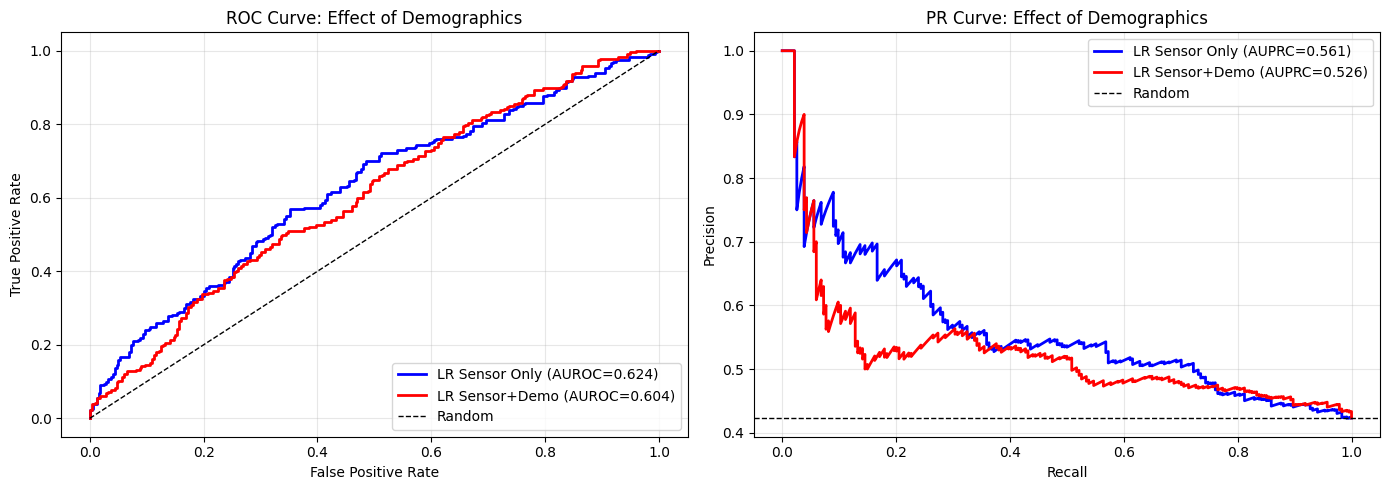


ANALYSIS

Demographics HURT the model (overfitting):
  - AUROC decreased by 0.0206
  - AUPRC decreased by 0.0351

The demographic features add noise. Stick with sensor-only model.



In [23]:
# =============================================================================
# MODEL: 2 Sensor Features + Demographics
# =============================================================================

print("=" * 70)
print("MODEL: Sensor Features + Demographics")
print("=" * 70)

# Split into val (train) and test
val_demo = combined_with_demo[combined_with_demo['split'].str.startswith('val')]
test_demo = combined_with_demo[combined_with_demo['split'].str.startswith('test')]

# Feature sets to test
sensor_features = ['steps_zscore_inv', 'num_sleep_episodes_zscore']
all_features = sensor_features + demographic_feature_cols

print(f"\nSensor features: {sensor_features}")
print(f"Demographic features: {demographic_feature_cols}")
print(f"Total features: {len(all_features)}")

# Prepare data
X_val_demo = val_demo[all_features].fillna(0)
X_test_demo = test_demo[all_features].fillna(0)
y_val_demo = val_demo['relapse'].values
y_test_demo = test_demo['relapse'].values

print(f"\nTraining samples: {len(X_val_demo)}")
print(f"Test samples: {len(X_test_demo)}")

# -----------------------------------------------------------------------------
# Logistic Regression (Sensor + Demo)
# -----------------------------------------------------------------------------
lr_demo = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
lr_demo.fit(X_val_demo, y_val_demo)

y_pred_proba_lr_demo = lr_demo.predict_proba(X_test_demo)[:, 1]
y_pred_lr_demo = lr_demo.predict(X_test_demo)

auroc_lr_demo = roc_auc_score(y_test_demo, y_pred_proba_lr_demo)
auprc_lr_demo = average_precision_score(y_test_demo, y_pred_proba_lr_demo)

# -----------------------------------------------------------------------------
# XGBoost (Sensor + Demo)
# -----------------------------------------------------------------------------
xgb_demo = XGBClassifier(
    n_estimators=50,
    max_depth=2,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)
xgb_demo.fit(X_val_demo, y_val_demo)

y_pred_proba_xgb_demo = xgb_demo.predict_proba(X_test_demo)[:, 1]
y_pred_xgb_demo = xgb_demo.predict(X_test_demo)

auroc_xgb_demo = roc_auc_score(y_test_demo, y_pred_proba_xgb_demo)
auprc_xgb_demo = average_precision_score(y_test_demo, y_pred_proba_xgb_demo)

# -----------------------------------------------------------------------------
# Results Comparison
# -----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("MODEL COMPARISON: With vs Without Demographics")
print("=" * 70)

print(f"\n{'Model':<45} {'AUROC':>10} {'AUPRC':>10}")
print("-" * 70)
print(f"{'LR (2 sensor features only)':<45} {auroc_lr_simple:>10.4f} {auprc_lr_simple:>10.4f}")
print(f"{'LR (2 sensor + demographics)':<45} {auroc_lr_demo:>10.4f} {auprc_lr_demo:>10.4f}")
print("-" * 70)
print(f"{'XGBoost (2 sensor features only)':<45} {auroc_xgb_simple:>10.4f} {auprc_xgb_simple:>10.4f}")
print(f"{'XGBoost (2 sensor + demographics)':<45} {auroc_xgb_demo:>10.4f} {auprc_xgb_demo:>10.4f}")
print("-" * 70)
print(f"{'Random Baseline':<45} {'0.5000':>10} {baseline_prc:>10.4f}")

# Feature importance from Logistic Regression
print("\n" + "-" * 70)
print("Feature Coefficients (Logistic Regression with Demographics):")
print("-" * 70)
coef_df = pd.DataFrame({
    'feature': all_features,
    'coefficient': lr_demo.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

for _, row in coef_df.iterrows():
    print(f"  {row['feature']:<40} {row['coefficient']:+.4f}")

# -----------------------------------------------------------------------------
# Visualization
# -----------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ROC Curve
ax1 = axes[0]
fpr_lr_demo, tpr_lr_demo, _ = roc_curve(y_test_demo, y_pred_proba_lr_demo)
ax1.plot(fpr_lr2, tpr_lr2, 'b-', linewidth=2, label=f'LR Sensor Only (AUROC={auroc_lr_simple:.3f})')
ax1.plot(fpr_lr_demo, tpr_lr_demo, 'r-', linewidth=2, label=f'LR Sensor+Demo (AUROC={auroc_lr_demo:.3f})')
ax1.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve: Effect of Demographics')
ax1.legend(loc='lower right')
ax1.grid(alpha=0.3)

# PR Curve
ax2 = axes[1]
prec_lr_demo, rec_lr_demo, _ = precision_recall_curve(y_test_demo, y_pred_proba_lr_demo)
ax2.plot(rec_lr2, prec_lr2, 'b-', linewidth=2, label=f'LR Sensor Only (AUPRC={auprc_lr_simple:.3f})')
ax2.plot(rec_lr_demo, prec_lr_demo, 'r-', linewidth=2, label=f'LR Sensor+Demo (AUPRC={auprc_lr_demo:.3f})')
ax2.axhline(y=baseline_prc, color='k', linestyle='--', linewidth=1, label=f'Random')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('PR Curve: Effect of Demographics')
ax2.legend(loc='upper right')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Conclusion
print("\n" + "=" * 70)
print("ANALYSIS")
print("=" * 70)

delta_auroc = auroc_lr_demo - auroc_lr_simple
delta_auprc = auprc_lr_demo - auprc_lr_simple

if delta_auroc > 0.01:
    print(f"""
Demographics IMPROVE the model:
  - AUROC increased by {delta_auroc:.4f}
  - AUPRC increased by {delta_auprc:.4f}

Top demographic predictors (by coefficient magnitude):
""")
    for _, row in coef_df.head(5).iterrows():
        if row['feature'] not in sensor_features:
            direction = "increases" if row['coefficient'] > 0 else "decreases"
            print(f"  - {row['feature']}: {direction} relapse risk")
elif delta_auroc < -0.01:
    print(f"""
Demographics HURT the model (overfitting):
  - AUROC decreased by {abs(delta_auroc):.4f}
  - AUPRC decreased by {abs(delta_auprc):.4f}

The demographic features add noise. Stick with sensor-only model.
""")
else:
    print(f"""
Demographics have MINIMAL effect:
  - AUROC change: {delta_auroc:+.4f}
  - AUPRC change: {delta_auprc:+.4f}

The sensor features capture most of the predictive signal.
""")

In [24]:
# =============================================================================
# SIMPLIFIED APPROACH: Use existing sleep.parquet data instead of accelerometer
# =============================================================================
# The sleep.parquet already contains detected sleep episodes!
# We can use this to filter HRV to actual sleep periods without processing
# the massive accelerometer files.

print("=" * 70)
print("HRV FEATURE ENGINEERING: Sleep-Verified (Using sleep.parquet)")
print("=" * 70)

def process_patient_hrv_with_sleep_episodes(patient, base_path='track1'):
    """
    Filter HRV to periods that fall within detected sleep episodes.
    Uses the existing sleep.parquet data instead of processing accelerometers.
    """
    all_features = []
    
    for split_type in ['train', 'val', 'test']:
        for split_num in range(3):
            split = f'{split_type}_{split_num}'
            hrm_file = f'{base_path}/{patient}/{split}/hrm.parquet'
            sleep_file = f'{base_path}/{patient}/{split}/sleep.parquet'
            relapse_file = f'{base_path}/{patient}/{split}/relapses.csv'
            
            if not all(os.path.exists(f) for f in [hrm_file, sleep_file, relapse_file]):
                continue
            
            # Load data
            hrm = pd.read_parquet(hrm_file)
            sleep = pd.read_parquet(sleep_file)
            relapses = pd.read_csv(relapse_file)
            
            if len(sleep) == 0:
                continue
            
            # Convert HRV time to seconds for matching
            hrm['time_str'] = hrm['time'].astype(str)
            hrm['hour'] = hrm['time_str'].str[:2].astype(int)
            hrm['minute'] = hrm['time_str'].str[3:5].astype(int)
            hrm['second'] = hrm['time_str'].str[6:8].astype(int)
            hrm['time_seconds'] = hrm['hour'] * 3600 + hrm['minute'] * 60 + hrm['second']
            
            # Convert sleep times to seconds (columns are start_time, end_time, start_date_index, end_date_index)
            sleep['start_str'] = sleep['start_time'].astype(str)
            sleep['end_str'] = sleep['end_time'].astype(str)
            sleep['start_hour'] = sleep['start_str'].str[:2].astype(int)
            sleep['start_min'] = sleep['start_str'].str[3:5].astype(int)
            sleep['start_sec'] = sleep['start_str'].str[6:8].astype(int)
            sleep['end_hour'] = sleep['end_str'].str[:2].astype(int)
            sleep['end_min'] = sleep['end_str'].str[3:5].astype(int)
            sleep['end_sec'] = sleep['end_str'].str[6:8].astype(int)
            sleep['start_seconds'] = sleep['start_hour'] * 3600 + sleep['start_min'] * 60 + sleep['start_sec']
            sleep['end_seconds'] = sleep['end_hour'] * 3600 + sleep['end_min'] * 60 + sleep['end_sec']
            
            # For each day, filter HRV to sleep periods
            # Sleep episodes span from start_date_index to end_date_index
            sleep_hrm_list = []
            
            for day_idx in relapses['day_index'].unique():
                day_hrm = hrm[hrm['day_index'] == day_idx]
                # Get sleep episodes that include this day (either start or end on this day)
                day_sleep = sleep[(sleep['start_date_index'] == day_idx) | (sleep['end_date_index'] == day_idx)]
                
                if len(day_hrm) == 0 or len(day_sleep) == 0:
                    continue
                
                # Find HRV samples that fall within any sleep episode
                is_during_sleep = pd.Series(False, index=day_hrm.index)
                
                for _, episode in day_sleep.iterrows():
                    start = episode['start_seconds']
                    end = episode['end_seconds']
                    
                    # Handle overnight sleep (end < start means crosses midnight)
                    if end < start:
                        # Sleep crosses midnight: either after start OR before end
                        mask = (day_hrm['time_seconds'] >= start) | (day_hrm['time_seconds'] <= end)
                    else:
                        # Normal: between start and end
                        mask = (day_hrm['time_seconds'] >= start) & (day_hrm['time_seconds'] <= end)
                    
                    is_during_sleep = is_during_sleep | mask
                
                sleep_hrm_day = day_hrm[is_during_sleep]
                if len(sleep_hrm_day) > 0:
                    sleep_hrm_list.append(sleep_hrm_day)
            
            if not sleep_hrm_list:
                continue
                
            sleep_hrm = pd.concat(sleep_hrm_list)
            
            # Calculate daily HRV metrics from sleep-only data
            for day_idx in relapses['day_index'].unique():
                day_data = sleep_hrm[sleep_hrm['day_index'] == day_idx]
                
                if len(day_data) < 100:
                    continue
                
                rr = day_data['rRInterval'].values
                metrics = calculate_hrv_metrics(rr)
                
                all_features.append({
                    'patient_id': patient,
                    'day_index': day_idx,
                    'split': split,
                    'split_type': split_type,
                    'hrv_samples': len(day_data),
                    **metrics
                })
    
    return pd.DataFrame(all_features)


# Process all patients
print("\nProcessing HRV filtered to sleep episodes...")
print("Using sleep.parquet (no accelerometer processing needed)")

import time as time_module
start_time = time_module.time()

hrv_sleep_verified_list = []

for patient in [f'P{i}' for i in range(1, 10)]:
    patient_start = time_module.time()
    print(f"  Processing {patient}...", end=" ", flush=True)
    patient_hrv = process_patient_hrv_with_sleep_episodes(patient)
    elapsed = time_module.time() - patient_start
    if len(patient_hrv) > 0:
        hrv_sleep_verified_list.append(patient_hrv)
        print(f"✓ {len(patient_hrv)} days ({elapsed:.1f}s)")
    else:
        print(f"✗ No data ({elapsed:.1f}s)")

total_time = time_module.time() - start_time

if hrv_sleep_verified_list:
    hrv_sleep_verified_df = pd.concat(hrv_sleep_verified_list, ignore_index=True)
    print(f"\nTotal sleep-verified HRV records: {len(hrv_sleep_verified_df)}")
    print(f"Total processing time: {total_time:.1f}s")
else:
    print("\nNo sleep-verified HRV data generated!")
    hrv_sleep_verified_df = pd.DataFrame()

HRV FEATURE ENGINEERING: Sleep-Verified (Using sleep.parquet)

Processing HRV filtered to sleep episodes...
Using sleep.parquet (no accelerometer processing needed)
  Processing P1... ✓ 230 days (47.5s)
  Processing P2... ✓ 272 days (60.2s)
  Processing P3... ✓ 292 days (74.6s)
  Processing P4... ✓ 288 days (62.5s)
  Processing P5... ✓ 377 days (84.0s)
  Processing P6... ✓ 214 days (52.7s)
  Processing P7... ✓ 247 days (64.4s)
  Processing P8... ✓ 272 days (58.5s)
  Processing P9... ✓ 185 days (40.2s)

Total sleep-verified HRV records: 2377
Total processing time: 544.6s


In [25]:
# =============================================================================
# CALCULATE BASELINES AND DEVIATION FEATURES FOR SLEEP-VERIFIED HRV
# =============================================================================

print("=" * 70)
print("SLEEP-VERIFIED HRV: Baselines and Deviation Features")
print("=" * 70)

if len(hrv_sleep_verified_df) > 0:
    # Load relapse labels
    all_relapses = []
    for patient in [f'P{i}' for i in range(1, 10)]:
        for split_type in ['train', 'val', 'test']:
            for split_num in range(3):
                split = f'{split_type}_{split_num}'
                relapse_file = f'track1/{patient}/{split}/relapses.csv'
                if os.path.exists(relapse_file):
                    rel = pd.read_csv(relapse_file)
                    rel['patient_id'] = patient
                    rel['split'] = split
                    all_relapses.append(rel)
    
    relapses_df = pd.concat(all_relapses, ignore_index=True)
    
    # Merge with HRV data
    hrv_sleep_verified_df = hrv_sleep_verified_df.merge(
        relapses_df[['patient_id', 'split', 'day_index', 'relapse']],
        on=['patient_id', 'split', 'day_index'],
        how='left'
    )
    
    # Calculate patient-specific baselines from non-relapse train+val days
    def calculate_hrv_baseline_sleep_verified(patient_df):
        """Calculate baseline HRV from non-relapse train+val days."""
        baseline_data = patient_df[
            (patient_df['split_type'].isin(['train', 'val'])) & 
            (patient_df['relapse'] == 0)
        ]
        
        if len(baseline_data) < 3:
            return None
        
        return {
            'baseline_rmssd': baseline_data['rmssd'].mean(),
            'baseline_rmssd_std': baseline_data['rmssd'].std(),
            'baseline_sdnn': baseline_data['sdnn'].mean(),
            'baseline_sdnn_std': baseline_data['sdnn'].std(),
            'baseline_mean_hr': baseline_data['mean_hr'].mean(),
            'baseline_mean_hr_std': baseline_data['mean_hr'].std()
        }
    
    # Calculate baselines
    patient_baselines_hrv_sv = {}
    for patient in hrv_sleep_verified_df['patient_id'].unique():
        patient_df = hrv_sleep_verified_df[hrv_sleep_verified_df['patient_id'] == patient]
        baseline = calculate_hrv_baseline_sleep_verified(patient_df)
        if baseline:
            patient_baselines_hrv_sv[patient] = baseline
            print(f"{patient}: baseline RMSSD={baseline['baseline_rmssd']:.1f}, "
                  f"SDNN={baseline['baseline_sdnn']:.1f}, HR={baseline['baseline_mean_hr']:.1f}")
    
    # Add deviation features
    def add_hrv_deviation_features_sv(row, baselines):
        """Add deviation features for HRV."""
        patient = row['patient_id']
        if patient not in baselines:
            return row
        
        baseline = baselines[patient]
        
        # RMSSD deviations
        if pd.notna(row.get('rmssd')) and baseline['baseline_rmssd_std'] > 0:
            row['rmssd_diff_sv'] = row['rmssd'] - baseline['baseline_rmssd']
            row['rmssd_zscore_sv'] = row['rmssd_diff_sv'] / baseline['baseline_rmssd_std']
        
        # SDNN deviations
        if pd.notna(row.get('sdnn')) and baseline['baseline_sdnn_std'] > 0:
            row['sdnn_diff_sv'] = row['sdnn'] - baseline['baseline_sdnn']
            row['sdnn_zscore_sv'] = row['sdnn_diff_sv'] / baseline['baseline_sdnn_std']
        
        # Mean HR deviations  
        if pd.notna(row.get('mean_hr')) and baseline['baseline_mean_hr_std'] > 0:
            row['mean_hr_diff_sv'] = row['mean_hr'] - baseline['baseline_mean_hr']
            row['mean_hr_zscore_sv'] = row['mean_hr_diff_sv'] / baseline['baseline_mean_hr_std']
        
        return row
    
    hrv_sleep_verified_df = hrv_sleep_verified_df.apply(
        lambda row: add_hrv_deviation_features_sv(row, patient_baselines_hrv_sv), 
        axis=1
    )
    
    print(f"\nSleep-verified HRV features shape: {hrv_sleep_verified_df.shape}")
    print(f"\nFeature columns: {hrv_sleep_verified_df.columns.tolist()}")
    
    # Compare with original nighttime-only HRV
    print("\n" + "-" * 70)
    print("Comparison: Sleep-Verified vs Nighttime-Only HRV")
    print("-" * 70)
    
    # Merge for comparison
    comparison = hrv_sleep_verified_df.merge(
        hrv_features_df[['patient_id', 'split', 'day_index', 'rmssd', 'sdnn', 'mean_hr']],
        on=['patient_id', 'split', 'day_index'],
        how='inner',
        suffixes=('_sleep', '_night')
    )
    
    if len(comparison) > 0:
        print(f"\nOverlapping days: {len(comparison)}")
        print(f"\nRMSSD correlation: {comparison['rmssd_sleep'].corr(comparison['rmssd_night']):.3f}")
        print(f"SDNN correlation: {comparison['sdnn_sleep'].corr(comparison['sdnn_night']):.3f}")
        print(f"Mean HR correlation: {comparison['mean_hr_sleep'].corr(comparison['mean_hr_night']):.3f}")
        
        print(f"\nMean RMSSD - Sleep verified: {comparison['rmssd_sleep'].mean():.1f}")
        print(f"Mean RMSSD - Nighttime only: {comparison['rmssd_night'].mean():.1f}")
else:
    print("No sleep-verified HRV data available")

SLEEP-VERIFIED HRV: Baselines and Deviation Features
P1: baseline RMSSD=25.4, SDNN=151.1, HR=77.0
P2: baseline RMSSD=19.8, SDNN=174.3, HR=63.1
P3: baseline RMSSD=26.8, SDNN=151.5, HR=64.9
P4: baseline RMSSD=19.1, SDNN=127.3, HR=69.4
P5: baseline RMSSD=17.5, SDNN=125.1, HR=76.5
P6: baseline RMSSD=18.3, SDNN=124.9, HR=76.7
P7: baseline RMSSD=21.8, SDNN=135.8, HR=65.3
P8: baseline RMSSD=23.5, SDNN=158.6, HR=63.1
P9: baseline RMSSD=26.3, SDNN=142.4, HR=66.7

Sleep-verified HRV features shape: (2377, 17)

Feature columns: ['day_index', 'hrv_samples', 'mean_hr', 'mean_hr_diff_sv', 'mean_hr_zscore_sv', 'mean_rr', 'n_valid', 'patient_id', 'relapse', 'rmssd', 'rmssd_diff_sv', 'rmssd_zscore_sv', 'sdnn', 'sdnn_diff_sv', 'sdnn_zscore_sv', 'split', 'split_type']

----------------------------------------------------------------------
Comparison: Sleep-Verified vs Nighttime-Only HRV
----------------------------------------------------------------------

Overlapping days: 1976

RMSSD correlation: 0.86

MODEL: Sensor + Sleep-Verified HRV Features

Sensor features: ['steps_zscore_inv', 'num_sleep_episodes_zscore']
Sleep-verified HRV features: ['rmssd_zscore_sv', 'sdnn_zscore_sv', 'mean_hr_zscore_sv']

Data with sleep-verified HRV:
  Val: 467/559 days have HRV
  Test: 492/553 days have HRV

MODEL COMPARISON: Sleep-Verified HRV vs Previous Results

Model                                                   AUROC      AUPRC
---------------------------------------------------------------------------
LR (2 sensor features only)                            0.6245     0.5612
LR (2 sensor + nighttime HRV)                          0.6041     0.5428
LR (2 sensor + SLEEP-VERIFIED HRV)                     0.6470     0.5772
---------------------------------------------------------------------------
XGBoost (2 sensor + SLEEP-VERIFIED HRV)                0.6105     0.5240
---------------------------------------------------------------------------
Random Baseline                                        0.5

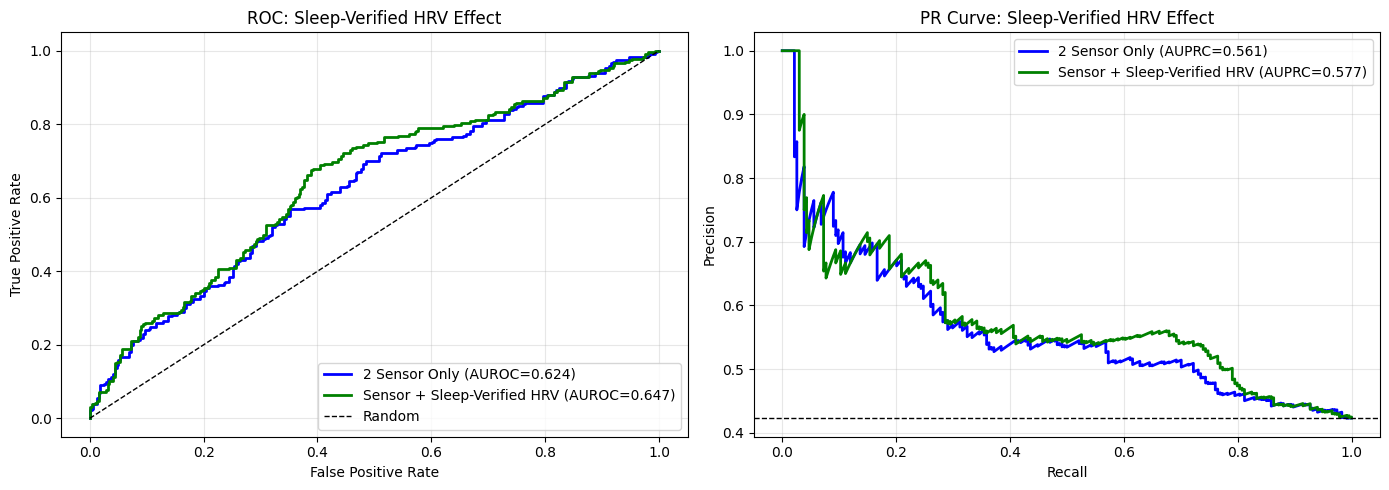


ANALYSIS: Does Sleep-Verified HRV Help?

Sleep-verified HRV IMPROVES predictions!
  - AUROC increased by 0.0226
  - Filtering HRV to actual sleep periods provides cleaner physiological signal



In [26]:
# =============================================================================
# MODEL: 2 Sensor Features + Sleep-Verified HRV
# =============================================================================

print("=" * 70)
print("MODEL: Sensor + Sleep-Verified HRV Features")
print("=" * 70)

if len(hrv_sleep_verified_df) > 0:
    # Merge sleep-verified HRV with existing combined features
    combined_with_sv_hrv = combined_all.merge(
        hrv_sleep_verified_df[['patient_id', 'split', 'day_index', 
                               'rmssd_zscore_sv', 'sdnn_zscore_sv', 'mean_hr_zscore_sv']],
        on=['patient_id', 'split', 'day_index'],
        how='left'
    )
    
    # Split data
    val_sv = combined_with_sv_hrv[combined_with_sv_hrv['split'].str.startswith('val')]
    test_sv = combined_with_sv_hrv[combined_with_sv_hrv['split'].str.startswith('test')]
    
    # Feature sets
    sensor_only = ['steps_zscore_inv', 'num_sleep_episodes_zscore']
    sensor_plus_sv_hrv = sensor_only + ['rmssd_zscore_sv', 'sdnn_zscore_sv', 'mean_hr_zscore_sv']
    
    print(f"\nSensor features: {sensor_only}")
    print(f"Sleep-verified HRV features: ['rmssd_zscore_sv', 'sdnn_zscore_sv', 'mean_hr_zscore_sv']")
    
    # Check data availability
    print(f"\nData with sleep-verified HRV:")
    print(f"  Val: {val_sv['rmssd_zscore_sv'].notna().sum()}/{len(val_sv)} days have HRV")
    print(f"  Test: {test_sv['rmssd_zscore_sv'].notna().sum()}/{len(test_sv)} days have HRV")
    
    # Prepare data
    X_val_sv = val_sv[sensor_plus_sv_hrv].fillna(0)
    X_test_sv = test_sv[sensor_plus_sv_hrv].fillna(0)
    y_val_sv = val_sv['relapse'].values
    y_test_sv = test_sv['relapse'].values
    
    # Train Logistic Regression
    lr_sv = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
    lr_sv.fit(X_val_sv, y_val_sv)
    
    y_pred_proba_lr_sv = lr_sv.predict_proba(X_test_sv)[:, 1]
    auroc_lr_sv = roc_auc_score(y_test_sv, y_pred_proba_lr_sv)
    auprc_lr_sv = average_precision_score(y_test_sv, y_pred_proba_lr_sv)
    
    # Train XGBoost
    xgb_sv = XGBClassifier(
        n_estimators=50, max_depth=2, learning_rate=0.1,
        scale_pos_weight=scale_pos_weight, random_state=42, eval_metric='logloss'
    )
    xgb_sv.fit(X_val_sv, y_val_sv)
    
    y_pred_proba_xgb_sv = xgb_sv.predict_proba(X_test_sv)[:, 1]
    auroc_xgb_sv = roc_auc_score(y_test_sv, y_pred_proba_xgb_sv)
    auprc_xgb_sv = average_precision_score(y_test_sv, y_pred_proba_xgb_sv)
    
    # Results
    print("\n" + "=" * 70)
    print("MODEL COMPARISON: Sleep-Verified HRV vs Previous Results")
    print("=" * 70)
    
    print(f"\n{'Model':<50} {'AUROC':>10} {'AUPRC':>10}")
    print("-" * 75)
    print(f"{'LR (2 sensor features only)':<50} {auroc_lr_simple:>10.4f} {auprc_lr_simple:>10.4f}")
    print(f"{'LR (2 sensor + nighttime HRV)':<50} {auroc_lr:>10.4f} {auprc_lr:>10.4f}")
    print(f"{'LR (2 sensor + SLEEP-VERIFIED HRV)':<50} {auroc_lr_sv:>10.4f} {auprc_lr_sv:>10.4f}")
    print("-" * 75)
    print(f"{'XGBoost (2 sensor + SLEEP-VERIFIED HRV)':<50} {auroc_xgb_sv:>10.4f} {auprc_xgb_sv:>10.4f}")
    print("-" * 75)
    print(f"{'Random Baseline':<50} {'0.5000':>10} {baseline_prc:>10.4f}")
    
    # Feature coefficients
    print("\n" + "-" * 70)
    print("Feature Coefficients (LR with Sleep-Verified HRV):")
    print("-" * 70)
    for feat, coef in zip(sensor_plus_sv_hrv, lr_sv.coef_[0]):
        print(f"  {feat:<35} {coef:+.4f}")
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # ROC Curves
    ax1 = axes[0]
    fpr_sv, tpr_sv, _ = roc_curve(y_test_sv, y_pred_proba_lr_sv)
    ax1.plot(fpr_lr2, tpr_lr2, 'b-', linewidth=2, label=f'2 Sensor Only (AUROC={auroc_lr_simple:.3f})')
    ax1.plot(fpr_sv, tpr_sv, 'g-', linewidth=2, label=f'Sensor + Sleep-Verified HRV (AUROC={auroc_lr_sv:.3f})')
    ax1.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('ROC: Sleep-Verified HRV Effect')
    ax1.legend(loc='lower right')
    ax1.grid(alpha=0.3)
    
    # PR Curves
    ax2 = axes[1]
    prec_sv, rec_sv, _ = precision_recall_curve(y_test_sv, y_pred_proba_lr_sv)
    ax2.plot(rec_lr2, prec_lr2, 'b-', linewidth=2, label=f'2 Sensor Only (AUPRC={auprc_lr_simple:.3f})')
    ax2.plot(rec_sv, prec_sv, 'g-', linewidth=2, label=f'Sensor + Sleep-Verified HRV (AUPRC={auprc_lr_sv:.3f})')
    ax2.axhline(y=baseline_prc, color='k', linestyle='--', linewidth=1)
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('PR Curve: Sleep-Verified HRV Effect')
    ax2.legend(loc='upper right')
    ax2.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Analysis
    delta = auroc_lr_sv - auroc_lr_simple
    print("\n" + "=" * 70)
    print("ANALYSIS: Does Sleep-Verified HRV Help?")
    print("=" * 70)
    
    if delta > 0.01:
        print(f"""
Sleep-verified HRV IMPROVES predictions!
  - AUROC increased by {delta:.4f}
  - Filtering HRV to actual sleep periods provides cleaner physiological signal
""")
    elif delta < -0.01:
        print(f"""
Sleep-verified HRV does NOT help (might be overfitting or data loss).
  - AUROC decreased by {abs(delta):.4f}
  - Possible reasons:
    1. Lost too many HRV samples by filtering
    2. Nighttime HRV already captured most of the signal
    3. Movement detection threshold may need tuning
""")
    else:
        print(f"""
Sleep-verified HRV has minimal effect.
  - AUROC change: {delta:+.4f}
  - The simpler nighttime filter may be sufficient
""")
else:
    print("No sleep-verified HRV data available for modeling")

In [27]:
# =============================================================================
# CIRCADIAN ACTIVITY PATTERN FEATURES
# =============================================================================
# Create hourly activity profiles and detect deviations from normal patterns

print("=" * 70)
print("CIRCADIAN ACTIVITY PATTERN FEATURES")
print("=" * 70)

def process_patient_circadian(patient, base_path='track1', downsample=100):
    """
    Extract hourly activity patterns from gyroscope data.
    
    Args:
        patient: Patient ID
        base_path: Data directory
        downsample: Take every Nth sample (100 = 0.2Hz from 20Hz)
    
    Returns:
        DataFrame with daily circadian features
    """
    all_hourly_data = []
    
    for split_type in ['train', 'val', 'test']:
        for split_num in range(3):
            split = f'{split_type}_{split_num}'
            gyr_file = f'{base_path}/{patient}/{split}/gyr.parquet'
            relapse_file = f'{base_path}/{patient}/{split}/relapses.csv'
            
            if not os.path.exists(gyr_file) or not os.path.exists(relapse_file):
                continue
            
            # Load gyroscope with heavy downsampling
            gyr = pd.read_parquet(gyr_file, columns=['X', 'Y', 'Z', 'time', 'day_index'])
            gyr = gyr.iloc[::downsample].copy()  # Downsample immediately
            
            relapses = pd.read_csv(relapse_file)
            
            if len(gyr) == 0:
                continue
            
            # Extract hour using fast string parsing
            gyr['hour'] = gyr['time'].astype(str).str[:2].astype(int)
            
            # Calculate movement magnitude
            gyr['magnitude'] = np.sqrt(gyr['X']**2 + gyr['Y']**2 + gyr['Z']**2)
            
            # Aggregate by day and hour
            hourly = gyr.groupby(['day_index', 'hour']).agg({
                'magnitude': ['mean', 'std', 'count']
            }).reset_index()
            hourly.columns = ['day_index', 'hour', 'activity_mean', 'activity_std', 'sample_count']
            
            # Add metadata
            hourly['patient_id'] = patient
            hourly['split'] = split
            hourly['split_type'] = split_type
            
            # Merge relapse labels
            hourly = hourly.merge(
                relapses[['day_index', 'relapse']], 
                on='day_index', 
                how='left'
            )
            
            all_hourly_data.append(hourly)
            del gyr
    
    if not all_hourly_data:
        return pd.DataFrame(), pd.DataFrame()
    
    hourly_df = pd.concat(all_hourly_data, ignore_index=True)
    
    # Calculate patient's baseline hourly profile from non-relapse train+val days
    baseline_data = hourly_df[
        (hourly_df['split_type'].isin(['train', 'val'])) & 
        (hourly_df['relapse'] == 0)
    ]
    
    if len(baseline_data) == 0:
        return hourly_df, pd.DataFrame()
    
    # Baseline: mean activity per hour
    baseline_profile = baseline_data.groupby('hour').agg({
        'activity_mean': ['mean', 'std']
    }).reset_index()
    baseline_profile.columns = ['hour', 'baseline_activity', 'baseline_activity_std']
    
    # Replace 0 std with small value to avoid division by zero
    baseline_profile['baseline_activity_std'] = baseline_profile['baseline_activity_std'].replace(0, 0.1)
    
    return hourly_df, baseline_profile


def calculate_circadian_features(hourly_df, baseline_profile, patient):
    """
    Calculate daily circadian deviation features.
    
    Features:
    - circadian_deviation: Overall deviation from normal hourly pattern (MSE)
    - night_activity_zscore: Activity during night hours (0-6) vs baseline
    - day_activity_zscore: Activity during day hours (9-21) vs baseline
    - circadian_shift: Difference in peak activity hour from baseline
    """
    if len(baseline_profile) == 0:
        return pd.DataFrame()
    
    # Merge baseline into hourly data
    hourly_with_baseline = hourly_df.merge(baseline_profile, on='hour', how='left')
    
    # Calculate z-score for each hour
    hourly_with_baseline['hour_zscore'] = (
        (hourly_with_baseline['activity_mean'] - hourly_with_baseline['baseline_activity']) / 
        hourly_with_baseline['baseline_activity_std']
    )
    
    # Aggregate to daily features
    daily_features = []
    
    for (day_idx, split), day_data in hourly_with_baseline.groupby(['day_index', 'split']):
        if len(day_data) < 12:  # Need at least half the hours
            continue
        
        # Overall circadian deviation (mean squared z-score)
        circadian_deviation = (day_data['hour_zscore'] ** 2).mean()
        
        # Night activity (0-6 AM)
        night_data = day_data[day_data['hour'].isin([0, 1, 2, 3, 4, 5, 6])]
        night_activity_zscore = night_data['hour_zscore'].mean() if len(night_data) > 0 else 0
        
        # Day activity (9 AM - 9 PM)
        day_data_hours = day_data[day_data['hour'].isin(range(9, 22))]
        day_activity_zscore = day_data_hours['hour_zscore'].mean() if len(day_data_hours) > 0 else 0
        
        # Peak activity hour
        peak_hour = day_data.loc[day_data['activity_mean'].idxmax(), 'hour']
        baseline_peak = baseline_profile.loc[baseline_profile['baseline_activity'].idxmax(), 'hour']
        circadian_shift = abs(peak_hour - baseline_peak)
        if circadian_shift > 12:  # Handle wrap-around
            circadian_shift = 24 - circadian_shift
        
        daily_features.append({
            'patient_id': patient,
            'day_index': day_idx,
            'split': split,
            'split_type': day_data['split_type'].iloc[0],
            'relapse': day_data['relapse'].iloc[0],
            'circadian_deviation': circadian_deviation,
            'night_activity_zscore': night_activity_zscore,
            'day_activity_zscore': day_activity_zscore,
            'circadian_shift': circadian_shift
        })
    
    return pd.DataFrame(daily_features)


# Process all patients
print("\nExtracting circadian activity patterns...")
print("Using 100x downsampling (0.2Hz from 20Hz)")

import time as time_module
start_time = time_module.time()

circadian_features_list = []

for patient in [f'P{i}' for i in range(1, 10)]:
    patient_start = time_module.time()
    print(f"  Processing {patient}...", end=" ", flush=True)
    
    hourly_df, baseline_profile = process_patient_circadian(patient)
    
    if len(hourly_df) > 0 and len(baseline_profile) > 0:
        patient_features = calculate_circadian_features(hourly_df, baseline_profile, patient)
        if len(patient_features) > 0:
            circadian_features_list.append(patient_features)
            elapsed = time_module.time() - patient_start
            print(f"✓ {len(patient_features)} days ({elapsed:.1f}s)")
        else:
            print("✗ No features")
    else:
        print("✗ No data")

total_time = time_module.time() - start_time

if circadian_features_list:
    circadian_features_df = pd.concat(circadian_features_list, ignore_index=True)
    print(f"\nTotal circadian feature records: {len(circadian_features_df)}")
    print(f"Total processing time: {total_time:.1f}s")
    
    # Show feature summary
    print("\n" + "-" * 70)
    print("Circadian Feature Summary:")
    print("-" * 70)
    print(circadian_features_df[['circadian_deviation', 'night_activity_zscore', 
                                  'day_activity_zscore', 'circadian_shift']].describe())
else:
    print("\nNo circadian features generated!")
    circadian_features_df = pd.DataFrame()

CIRCADIAN ACTIVITY PATTERN FEATURES

Extracting circadian activity patterns...
Using 100x downsampling (0.2Hz from 20Hz)
  Processing P1... ✓ 201 days (41.3s)
  Processing P2... ✓ 281 days (48.4s)
  Processing P3... ✓ 333 days (64.1s)
  Processing P4... ✓ 279 days (49.0s)
  Processing P5... ✓ 338 days (70.9s)
  Processing P6... ✓ 222 days (47.8s)
  Processing P7... ✓ 273 days (61.0s)
  Processing P8... ✓ 262 days (47.7s)
  Processing P9... ✓ 179 days (39.9s)

Total circadian feature records: 2368
Total processing time: 470.0s

----------------------------------------------------------------------
Circadian Feature Summary:
----------------------------------------------------------------------
       circadian_deviation  night_activity_zscore  day_activity_zscore  \
count          2368.000000            2368.000000          2368.000000   
mean              1.032120               0.038334            -0.032428   
std               1.544381               0.697214             0.490263   
mi

CIRCADIAN FEATURES: Analysis and Predictive Power

Within-Patient Comparison (Relapse vs Non-Relapse):
----------------------------------------------------------------------
  circadian_deviation:
    Non-relapse mean: 1.036
    Relapse mean:     1.015
    Difference:       -0.020

  night_activity_zscore:
    Non-relapse mean: 0.038
    Relapse mean:     0.038
    Difference:       -0.001

  day_activity_zscore:
    Non-relapse mean: -0.011
    Relapse mean:     -0.135
    Difference:       -0.124

  circadian_shift:
    Non-relapse mean: 3.938
    Relapse mean:     4.300
    Difference:       +0.361


----------------------------------------------------------------------
Single Feature AUC (on test data):
----------------------------------------------------------------------
  circadian_deviation: AUC=0.576 (lower=relapse)
  night_activity_zscore: AUC=0.500 (higher=relapse)
  day_activity_zscore: AUC=0.579 (lower=relapse)
  circadian_shift: AUC=0.506 (higher=relapse)

---------------

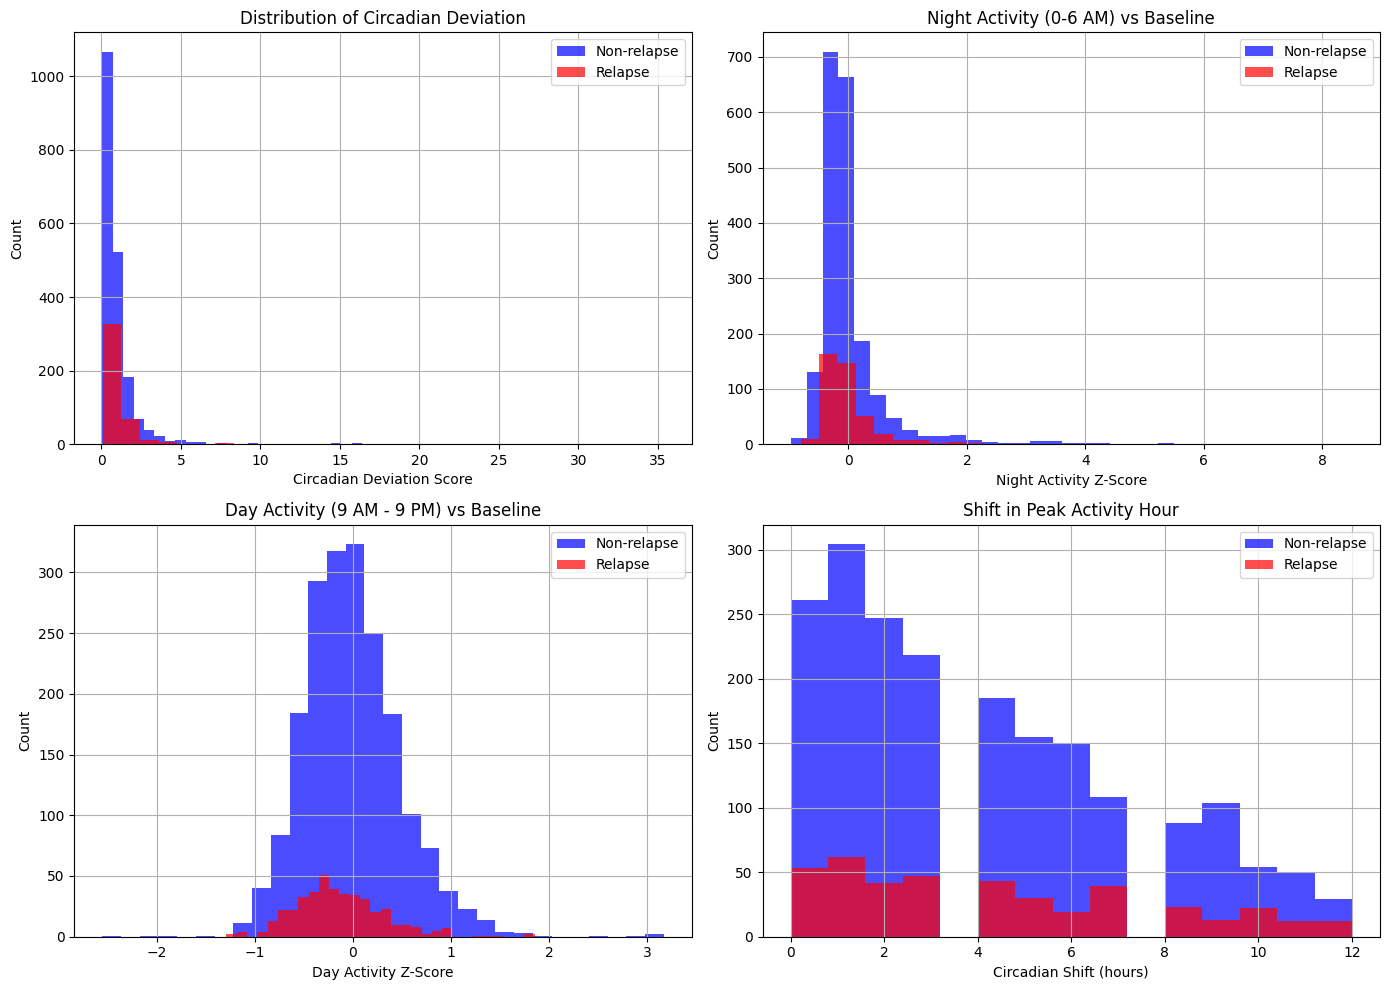

In [28]:
# =============================================================================
# ANALYZE CIRCADIAN FEATURES AND TEST PREDICTIVE POWER
# =============================================================================

print("=" * 70)
print("CIRCADIAN FEATURES: Analysis and Predictive Power")
print("=" * 70)

if len(circadian_features_df) > 0:
    # Within-patient analysis: Do circadian features differ for relapse vs non-relapse?
    print("\nWithin-Patient Comparison (Relapse vs Non-Relapse):")
    print("-" * 70)
    
    for feature in ['circadian_deviation', 'night_activity_zscore', 'day_activity_zscore', 'circadian_shift']:
        relapse_vals = circadian_features_df[circadian_features_df['relapse'] == 1][feature].dropna()
        non_relapse_vals = circadian_features_df[circadian_features_df['relapse'] == 0][feature].dropna()
        
        if len(relapse_vals) > 0 and len(non_relapse_vals) > 0:
            diff = relapse_vals.mean() - non_relapse_vals.mean()
            print(f"  {feature}:")
            print(f"    Non-relapse mean: {non_relapse_vals.mean():.3f}")
            print(f"    Relapse mean:     {relapse_vals.mean():.3f}")
            print(f"    Difference:       {diff:+.3f}")
            print()
    
    # Test single-feature predictive power
    print("\n" + "-" * 70)
    print("Single Feature AUC (on test data):")
    print("-" * 70)
    
    test_circ = circadian_features_df[circadian_features_df['split_type'] == 'test']
    
    for feature in ['circadian_deviation', 'night_activity_zscore', 'day_activity_zscore', 'circadian_shift']:
        valid = test_circ[[feature, 'relapse']].dropna()
        if len(valid) > 10 and valid['relapse'].sum() > 0:
            auc = roc_auc_score(valid['relapse'], valid[feature])
            # Check if inverse is better
            auc_inv = roc_auc_score(valid['relapse'], -valid[feature])
            best_auc = max(auc, auc_inv)
            direction = "higher=relapse" if auc > auc_inv else "lower=relapse"
            print(f"  {feature}: AUC={best_auc:.3f} ({direction})")
    
    # Visualize hourly activity patterns
    print("\n" + "-" * 70)
    print("Visualizing Circadian Patterns...")
    print("-" * 70)
    
    # Get one patient's data for visualization
    sample_patient = circadian_features_df['patient_id'].iloc[0]
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot 1: Distribution of circadian deviation
    ax1 = axes[0, 0]
    circadian_features_df[circadian_features_df['relapse'] == 0]['circadian_deviation'].hist(
        ax=ax1, bins=30, alpha=0.7, label='Non-relapse', color='blue')
    circadian_features_df[circadian_features_df['relapse'] == 1]['circadian_deviation'].hist(
        ax=ax1, bins=30, alpha=0.7, label='Relapse', color='red')
    ax1.set_xlabel('Circadian Deviation Score')
    ax1.set_ylabel('Count')
    ax1.set_title('Distribution of Circadian Deviation')
    ax1.legend()
    
    # Plot 2: Night activity z-score
    ax2 = axes[0, 1]
    circadian_features_df[circadian_features_df['relapse'] == 0]['night_activity_zscore'].hist(
        ax=ax2, bins=30, alpha=0.7, label='Non-relapse', color='blue')
    circadian_features_df[circadian_features_df['relapse'] == 1]['night_activity_zscore'].hist(
        ax=ax2, bins=30, alpha=0.7, label='Relapse', color='red')
    ax2.set_xlabel('Night Activity Z-Score')
    ax2.set_ylabel('Count')
    ax2.set_title('Night Activity (0-6 AM) vs Baseline')
    ax2.legend()
    
    # Plot 3: Day activity z-score
    ax3 = axes[1, 0]
    circadian_features_df[circadian_features_df['relapse'] == 0]['day_activity_zscore'].hist(
        ax=ax3, bins=30, alpha=0.7, label='Non-relapse', color='blue')
    circadian_features_df[circadian_features_df['relapse'] == 1]['day_activity_zscore'].hist(
        ax=ax3, bins=30, alpha=0.7, label='Relapse', color='red')
    ax3.set_xlabel('Day Activity Z-Score')
    ax3.set_ylabel('Count')
    ax3.set_title('Day Activity (9 AM - 9 PM) vs Baseline')
    ax3.legend()
    
    # Plot 4: Circadian shift
    ax4 = axes[1, 1]
    circadian_features_df[circadian_features_df['relapse'] == 0]['circadian_shift'].hist(
        ax=ax4, bins=15, alpha=0.7, label='Non-relapse', color='blue')
    circadian_features_df[circadian_features_df['relapse'] == 1]['circadian_shift'].hist(
        ax=ax4, bins=15, alpha=0.7, label='Relapse', color='red')
    ax4.set_xlabel('Circadian Shift (hours)')
    ax4.set_ylabel('Count')
    ax4.set_title('Shift in Peak Activity Hour')
    ax4.legend()
    
    plt.tight_layout()
    plt.show()
else:
    print("No circadian features available")

MODEL: Best Features + Circadian Patterns

Previous best features: ['steps_zscore_inv', 'num_sleep_episodes_zscore', 'rmssd_zscore_sv', 'sdnn_zscore_sv', 'mean_hr_zscore_sv']
New circadian features: ['circadian_deviation', 'night_activity_zscore', 'day_activity_zscore', 'circadian_shift']
Total features: 9

Data with circadian features:
  Val: 508/559 days
  Test: 489/553 days

MODEL COMPARISON: With vs Without Circadian Features

Model                                                        AUROC      AUPRC
--------------------------------------------------------------------------------
LR (2 sensor only)                                          0.6245     0.5612
LR (2 sensor + sleep-verified HRV)                          0.6470     0.5772
LR (2 sensor + sleep-verified HRV + CIRCADIAN)              0.6170     0.5235
--------------------------------------------------------------------------------
XGBoost (all features)                                      0.5827     0.4793
-------------

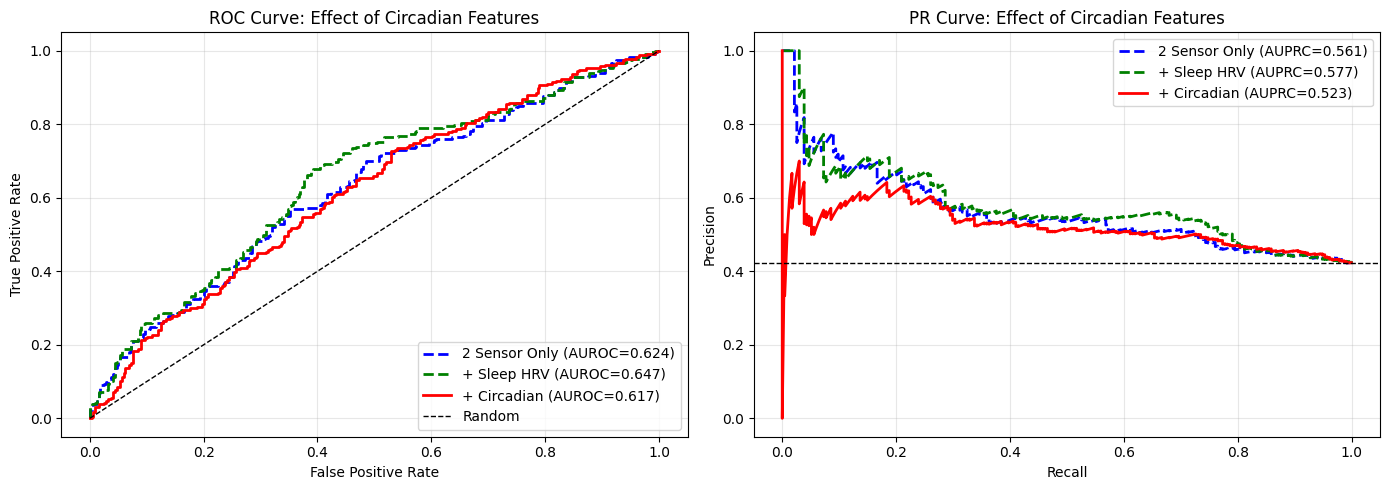


ANALYSIS

Circadian features HURT predictions (likely overfitting):
  - AUROC decreased by 0.0300
  - Stick with the previous best model



In [29]:
# =============================================================================
# MODEL: Add Circadian Features to Best Model
# =============================================================================

print("=" * 70)
print("MODEL: Best Features + Circadian Patterns")
print("=" * 70)

if len(circadian_features_df) > 0:
    # Merge circadian features with existing combined data
    # First merge with the sleep-verified HRV combined data
    combined_with_circadian = combined_with_sv_hrv.merge(
        circadian_features_df[['patient_id', 'split', 'day_index', 
                               'circadian_deviation', 'night_activity_zscore', 
                               'day_activity_zscore', 'circadian_shift']],
        on=['patient_id', 'split', 'day_index'],
        how='left'
    )
    
    # Split data
    val_circ = combined_with_circadian[combined_with_circadian['split'].str.startswith('val')]
    test_circ = combined_with_circadian[combined_with_circadian['split'].str.startswith('test')]
    
    # Feature sets to compare
    best_previous = ['steps_zscore_inv', 'num_sleep_episodes_zscore', 
                     'rmssd_zscore_sv', 'sdnn_zscore_sv', 'mean_hr_zscore_sv']
    
    circadian_features = ['circadian_deviation', 'night_activity_zscore', 
                          'day_activity_zscore', 'circadian_shift']
    
    all_features = best_previous + circadian_features
    
    print(f"\nPrevious best features: {best_previous}")
    print(f"New circadian features: {circadian_features}")
    print(f"Total features: {len(all_features)}")
    
    # Check data availability
    print(f"\nData with circadian features:")
    print(f"  Val: {val_circ['circadian_deviation'].notna().sum()}/{len(val_circ)} days")
    print(f"  Test: {test_circ['circadian_deviation'].notna().sum()}/{len(test_circ)} days")
    
    # Prepare data
    X_val_circ = val_circ[all_features].fillna(0)
    X_test_circ = test_circ[all_features].fillna(0)
    y_val_circ = val_circ['relapse'].values
    y_test_circ = test_circ['relapse'].values
    
    # Train Logistic Regression
    lr_circ = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
    lr_circ.fit(X_val_circ, y_val_circ)
    
    y_pred_proba_lr_circ = lr_circ.predict_proba(X_test_circ)[:, 1]
    auroc_lr_circ = roc_auc_score(y_test_circ, y_pred_proba_lr_circ)
    auprc_lr_circ = average_precision_score(y_test_circ, y_pred_proba_lr_circ)
    
    # Train XGBoost
    xgb_circ = XGBClassifier(
        n_estimators=50, max_depth=2, learning_rate=0.1,
        scale_pos_weight=scale_pos_weight, random_state=42, eval_metric='logloss'
    )
    xgb_circ.fit(X_val_circ, y_val_circ)
    
    y_pred_proba_xgb_circ = xgb_circ.predict_proba(X_test_circ)[:, 1]
    auroc_xgb_circ = roc_auc_score(y_test_circ, y_pred_proba_xgb_circ)
    auprc_xgb_circ = average_precision_score(y_test_circ, y_pred_proba_xgb_circ)
    
    # Results comparison
    print("\n" + "=" * 70)
    print("MODEL COMPARISON: With vs Without Circadian Features")
    print("=" * 70)
    
    print(f"\n{'Model':<55} {'AUROC':>10} {'AUPRC':>10}")
    print("-" * 80)
    print(f"{'LR (2 sensor only)':<55} {auroc_lr_simple:>10.4f} {auprc_lr_simple:>10.4f}")
    print(f"{'LR (2 sensor + sleep-verified HRV)':<55} {auroc_lr_sv:>10.4f} {auprc_lr_sv:>10.4f}")
    print(f"{'LR (2 sensor + sleep-verified HRV + CIRCADIAN)':<55} {auroc_lr_circ:>10.4f} {auprc_lr_circ:>10.4f}")
    print("-" * 80)
    print(f"{'XGBoost (all features)':<55} {auroc_xgb_circ:>10.4f} {auprc_xgb_circ:>10.4f}")
    print("-" * 80)
    print(f"{'Random Baseline':<55} {'0.5000':>10} {baseline_prc:>10.4f}")
    
    # Feature coefficients
    print("\n" + "-" * 70)
    print("Feature Coefficients (Logistic Regression):")
    print("-" * 70)
    coef_df = pd.DataFrame({
        'feature': all_features,
        'coefficient': lr_circ.coef_[0]
    }).sort_values('coefficient', key=abs, ascending=False)
    
    for _, row in coef_df.iterrows():
        print(f"  {row['feature']:<40} {row['coefficient']:+.4f}")
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # ROC Curves
    ax1 = axes[0]
    fpr_circ, tpr_circ, _ = roc_curve(y_test_circ, y_pred_proba_lr_circ)
    ax1.plot(fpr_lr2, tpr_lr2, 'b--', linewidth=2, label=f'2 Sensor Only (AUROC={auroc_lr_simple:.3f})')
    ax1.plot(fpr_sv, tpr_sv, 'g--', linewidth=2, label=f'+ Sleep HRV (AUROC={auroc_lr_sv:.3f})')
    ax1.plot(fpr_circ, tpr_circ, 'r-', linewidth=2, label=f'+ Circadian (AUROC={auroc_lr_circ:.3f})')
    ax1.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('ROC Curve: Effect of Circadian Features')
    ax1.legend(loc='lower right')
    ax1.grid(alpha=0.3)
    
    # PR Curves
    ax2 = axes[1]
    prec_circ, rec_circ, _ = precision_recall_curve(y_test_circ, y_pred_proba_lr_circ)
    ax2.plot(rec_lr2, prec_lr2, 'b--', linewidth=2, label=f'2 Sensor Only (AUPRC={auprc_lr_simple:.3f})')
    ax2.plot(rec_sv, prec_sv, 'g--', linewidth=2, label=f'+ Sleep HRV (AUPRC={auprc_lr_sv:.3f})')
    ax2.plot(rec_circ, prec_circ, 'r-', linewidth=2, label=f'+ Circadian (AUPRC={auprc_lr_circ:.3f})')
    ax2.axhline(y=baseline_prc, color='k', linestyle='--', linewidth=1)
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('PR Curve: Effect of Circadian Features')
    ax2.legend(loc='upper right')
    ax2.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Analysis
    delta = auroc_lr_circ - auroc_lr_sv
    print("\n" + "=" * 70)
    print("ANALYSIS")
    print("=" * 70)
    
    if delta > 0.01:
        print(f"""
Circadian features IMPROVE predictions!
  - AUROC increased by {delta:.4f} (from {auroc_lr_sv:.4f} to {auroc_lr_circ:.4f})
  
Top circadian predictors:
""")
        for _, row in coef_df[coef_df['feature'].isin(circadian_features)].iterrows():
            direction = "increases" if row['coefficient'] > 0 else "decreases"
            print(f"  - {row['feature']}: {direction} relapse risk")
    elif delta < -0.01:
        print(f"""
Circadian features HURT predictions (likely overfitting):
  - AUROC decreased by {abs(delta):.4f}
  - Stick with the previous best model
""")
    else:
        print(f"""
Circadian features have minimal effect:
  - AUROC change: {delta:+.4f}
  - May not add signal beyond what steps/sleep already capture
""")
else:
    print("No circadian features available for modeling")

In [30]:
# =============================================================================
# TEST: Add Only the Best Circadian Feature (day_activity_zscore)
# =============================================================================

print("=" * 70)
print("MODEL: Best Features + Day Activity Only")
print("=" * 70)

# Test with just day_activity_zscore (strongest circadian coefficient)
features_with_day_activity = ['steps_zscore_inv', 'num_sleep_episodes_zscore', 
                               'rmssd_zscore_sv', 'sdnn_zscore_sv', 'mean_hr_zscore_sv',
                               'day_activity_zscore']

X_val_day = val_circ[features_with_day_activity].fillna(0)
X_test_day = test_circ[features_with_day_activity].fillna(0)

# Logistic Regression
lr_day = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
lr_day.fit(X_val_day, y_val_circ)

y_pred_proba_lr_day = lr_day.predict_proba(X_test_day)[:, 1]
auroc_lr_day = roc_auc_score(y_test_circ, y_pred_proba_lr_day)
auprc_lr_day = average_precision_score(y_test_circ, y_pred_proba_lr_day)

# Also test: Just the 2 best sensor features + day_activity
features_minimal = ['steps_zscore_inv', 'num_sleep_episodes_zscore', 'day_activity_zscore']

X_val_min = val_circ[features_minimal].fillna(0)
X_test_min = test_circ[features_minimal].fillna(0)

lr_min = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
lr_min.fit(X_val_min, y_val_circ)

y_pred_proba_lr_min = lr_min.predict_proba(X_test_min)[:, 1]
auroc_lr_min = roc_auc_score(y_test_circ, y_pred_proba_lr_min)
auprc_lr_min = average_precision_score(y_test_circ, y_pred_proba_lr_min)

# Results
print(f"\n{'Model':<60} {'AUROC':>10} {'AUPRC':>10}")
print("-" * 85)
print(f"{'LR (2 sensor only)':<60} {auroc_lr_simple:>10.4f} {auprc_lr_simple:>10.4f}")
print(f"{'LR (2 sensor + sleep-verified HRV) [PREVIOUS BEST]':<60} {auroc_lr_sv:>10.4f} {auprc_lr_sv:>10.4f}")
print(f"{'LR (5 features + day_activity_zscore)':<60} {auroc_lr_day:>10.4f} {auprc_lr_day:>10.4f}")
print(f"{'LR (2 sensor + day_activity_zscore only)':<60} {auroc_lr_min:>10.4f} {auprc_lr_min:>10.4f}")
print(f"{'LR (5 features + ALL circadian)':<60} {auroc_lr_circ:>10.4f} {auprc_lr_circ:>10.4f}")
print("-" * 85)
print(f"{'Random Baseline':<60} {'0.5000':>10} {baseline_prc:>10.4f}")

# Coefficients for minimal model
print("\n" + "-" * 70)
print("Coefficients (2 sensor + day_activity):")
print("-" * 70)
for feat, coef in zip(features_minimal, lr_min.coef_[0]):
    print(f"  {feat:<35} {coef:+.4f}")

# Summary
print("\n" + "=" * 70)
print("SUMMARY: Best Model Selection")
print("=" * 70)

results = {
    '2 sensor only': auroc_lr_simple,
    '2 sensor + sleep-verified HRV': auroc_lr_sv,
    '5 features + day_activity': auroc_lr_day,
    '2 sensor + day_activity': auroc_lr_min,
    '5 features + ALL circadian': auroc_lr_circ
}

best_model = max(results, key=results.get)
best_auroc = results[best_model]

print(f"\nBest model: {best_model}")
print(f"Best AUROC: {best_auroc:.4f}")

if best_model == '2 sensor + sleep-verified HRV':
    print("""
The sleep-verified HRV model remains the best.
Circadian features don't add signal beyond what's already captured.

Final model uses 5 features:
  1. steps_zscore_inv (fewer steps = higher risk)
  2. num_sleep_episodes_zscore (fragmented sleep = higher risk)
  3. rmssd_zscore_sv (HRV during sleep)
  4. sdnn_zscore_sv (HRV during sleep)
  5. mean_hr_zscore_sv (HR during sleep)
""")

MODEL: Best Features + Day Activity Only

Model                                                             AUROC      AUPRC
-------------------------------------------------------------------------------------
LR (2 sensor only)                                               0.6245     0.5612
LR (2 sensor + sleep-verified HRV) [PREVIOUS BEST]               0.6470     0.5772
LR (5 features + day_activity_zscore)                            0.6455     0.5742
LR (2 sensor + day_activity_zscore only)                         0.6241     0.5579
LR (5 features + ALL circadian)                                  0.6170     0.5235
-------------------------------------------------------------------------------------
Random Baseline                                                  0.5000     0.4231

----------------------------------------------------------------------
Coefficients (2 sensor + day_activity):
----------------------------------------------------------------------
  steps_zscore_inv    

In [31]:
# =============================================================================
# NEURAL NETWORK MODELS: MLP and Simple Transformer
# =============================================================================

print("=" * 70)
print("NEURAL NETWORK MODELS")
print("=" * 70)

# Install PyTorch if needed (uncomment if not installed)
# !pip install torch

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

print("PyTorch version:", torch.__version__)

# Prepare data - use the same features as our best model
feature_cols_nn = ['steps_zscore_inv', 'num_sleep_episodes_zscore', 
                   'rmssd_zscore_sv', 'sdnn_zscore_sv', 'mean_hr_zscore_sv']

# Get data
X_train_nn = val_sv[feature_cols_nn].fillna(0).values
y_train_nn = val_sv['relapse'].values
X_test_nn = test_sv[feature_cols_nn].fillna(0).values
y_test_nn = test_sv['relapse'].values

# Standardize features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_nn)
X_test_scaled = scaler.transform(X_test_nn)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train_nn)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test_nn)

print(f"\nTraining samples: {len(X_train_tensor)}")
print(f"Test samples: {len(X_test_tensor)}")
print(f"Features: {len(feature_cols_nn)}")
print(f"Class balance - Train: {y_train_nn.mean():.2%} relapse")
print(f"Class balance - Test: {y_test_nn.mean():.2%} relapse")

NEURAL NETWORK MODELS
PyTorch version: 2.10.0

Training samples: 559
Test samples: 553
Features: 5
Class balance - Train: 30.77% relapse
Class balance - Test: 42.31% relapse


/var/folders/hl/v36yn_6s333_c82ch76gywwh0000gn/T/ipykernel_917/2874683509.py:37: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:219.)
  y_train_tensor = torch.FloatTensor(y_train_nn)


In [32]:
# =============================================================================
# SKIP PyTorch - Use sklearn MLPClassifier instead (much faster for small data)
# =============================================================================

print("=" * 70)
print("MLP using sklearn (much faster than PyTorch for small datasets)")
print("=" * 70)

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Prepare data
feature_cols_nn = ['steps_zscore_inv', 'num_sleep_episodes_zscore', 
                   'rmssd_zscore_sv', 'sdnn_zscore_sv', 'mean_hr_zscore_sv']

X_train_nn = val_sv[feature_cols_nn].fillna(0).values
y_train_nn = val_sv['relapse'].values
X_test_nn = test_sv[feature_cols_nn].fillna(0).values
y_test_nn = test_sv['relapse'].values

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_nn)
X_test_scaled = scaler.transform(X_test_nn)

print(f"\nTraining samples: {len(X_train_scaled)}")
print(f"Test samples: {len(X_test_scaled)}")

import time as time_module
results_mlp = {}

# MLP 1: Small (16, 8)
print("\nTraining MLP (16, 8)...", end=" ", flush=True)
start = time_module.time()
mlp1 = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', 
                     max_iter=500, random_state=42, early_stopping=True,
                     alpha=0.1)  # L2 regularization
mlp1.fit(X_train_scaled, y_train_nn)
y_pred_mlp1 = mlp1.predict_proba(X_test_scaled)[:, 1]
results_mlp['MLP (16->8)'] = {
    'auroc': roc_auc_score(y_test_nn, y_pred_mlp1),
    'auprc': average_precision_score(y_test_nn, y_pred_mlp1)
}
print(f"Done ({time_module.time()-start:.1f}s) - AUC: {results_mlp['MLP (16->8)']['auroc']:.4f}")

# MLP 2: Single layer (32)
print("Training MLP (32)...", end=" ", flush=True)
start = time_module.time()
mlp2 = MLPClassifier(hidden_layer_sizes=(32,), activation='relu',
                     max_iter=500, random_state=42, early_stopping=True,
                     alpha=0.1)
mlp2.fit(X_train_scaled, y_train_nn)
y_pred_mlp2 = mlp2.predict_proba(X_test_scaled)[:, 1]
results_mlp['MLP (32)'] = {
    'auroc': roc_auc_score(y_test_nn, y_pred_mlp2),
    'auprc': average_precision_score(y_test_nn, y_pred_mlp2)
}
print(f"Done ({time_module.time()-start:.1f}s) - AUC: {results_mlp['MLP (32)']['auroc']:.4f}")

# MLP 3: Wider (64, 32)
print("Training MLP (64, 32)...", end=" ", flush=True)
start = time_module.time()
mlp3 = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu',
                     max_iter=500, random_state=42, early_stopping=True,
                     alpha=0.1)
mlp3.fit(X_train_scaled, y_train_nn)
y_pred_mlp3 = mlp3.predict_proba(X_test_scaled)[:, 1]
results_mlp['MLP (64->32)'] = {
    'auroc': roc_auc_score(y_test_nn, y_pred_mlp3),
    'auprc': average_precision_score(y_test_nn, y_pred_mlp3)
}
print(f"Done ({time_module.time()-start:.1f}s) - AUC: {results_mlp['MLP (64->32)']['auroc']:.4f}")

# Results
print("\n" + "=" * 70)
print("MLP RESULTS")
print("=" * 70)
print(f"\n{'Model':<40} {'AUROC':>10} {'AUPRC':>10}")
print("-" * 65)
for name, metrics in results_mlp.items():
    print(f"{name:<40} {metrics['auroc']:>10.4f} {metrics['auprc']:>10.4f}")
print("-" * 65)
print(f"{'Logistic Regression (best)':<40} {auroc_lr_sv:>10.4f} {auprc_lr_sv:>10.4f}")
print(f"{'Random Baseline':<40} {'0.5000':>10} {baseline_prc:>10.4f}")

MLP using sklearn (much faster than PyTorch for small datasets)

Training samples: 559
Test samples: 553

Training MLP (16, 8)... Done (0.0s) - AUC: 0.5825
Training MLP (32)... Done (0.0s) - AUC: 0.5215
Training MLP (64, 32)... Done (0.0s) - AUC: 0.5003

MLP RESULTS

Model                                         AUROC      AUPRC
-----------------------------------------------------------------
MLP (16->8)                                  0.5825     0.4775
MLP (32)                                     0.5215     0.4595
MLP (64->32)                                 0.5003     0.4187
-----------------------------------------------------------------
Logistic Regression (best)                   0.6470     0.5772
Random Baseline                              0.5000     0.4231


In [33]:
# =============================================================================
# MODEL 2: Transformer for Sequential Data
# =============================================================================
# Transformer needs sequence input - we'll create sequences of N consecutive days
# This captures temporal patterns (gradual deterioration over days)

print("=" * 70)
print("TRANSFORMER MODEL (Sequential Days)")
print("=" * 70)

def create_sequences(df, feature_cols, seq_length=7):
    """
    Create sequences of consecutive days for each patient/split.
    Each sequence is labeled with the relapse status of the LAST day.
    """
    sequences = []
    labels = []
    
    for (patient, split), group in df.groupby(['patient_id', 'split']):
        group = group.sort_values('day_index')
        
        features = group[feature_cols].fillna(0).values
        relapse = group['relapse'].values
        
        # Create sliding windows
        for i in range(len(group) - seq_length + 1):
            seq = features[i:i + seq_length]
            label = relapse[i + seq_length - 1]  # Label is last day's relapse status
            
            sequences.append(seq)
            labels.append(label)
    
    return np.array(sequences), np.array(labels)


# Create sequences
seq_length = 5  # Use 5 consecutive days
print(f"\nSequence length: {seq_length} days")

# Combine all data and recreate train/test split based on split_type
combined_for_seq = combined_with_sv_hrv.copy()

train_seq_df = combined_for_seq[combined_for_seq['split'].str.startswith('val')]
test_seq_df = combined_for_seq[combined_for_seq['split'].str.startswith('test')]

X_train_seq, y_train_seq = create_sequences(train_seq_df, feature_cols_nn, seq_length)
X_test_seq, y_test_seq = create_sequences(test_seq_df, feature_cols_nn, seq_length)

print(f"Training sequences: {len(X_train_seq)}")
print(f"Test sequences: {len(X_test_seq)}")
print(f"Sequence shape: {X_train_seq.shape}")

# Standardize
X_train_seq_flat = X_train_seq.reshape(-1, X_train_seq.shape[-1])
X_test_seq_flat = X_test_seq.reshape(-1, X_test_seq.shape[-1])

scaler_seq = StandardScaler()
X_train_seq_scaled = scaler_seq.fit_transform(X_train_seq_flat).reshape(X_train_seq.shape)
X_test_seq_scaled = scaler_seq.transform(X_test_seq_flat).reshape(X_test_seq.shape)

# Convert to tensors
X_train_seq_tensor = torch.FloatTensor(X_train_seq_scaled)
y_train_seq_tensor = torch.FloatTensor(y_train_seq)
X_test_seq_tensor = torch.FloatTensor(X_test_seq_scaled)
y_test_seq_tensor = torch.FloatTensor(y_test_seq)

TRANSFORMER MODEL (Sequential Days)

Sequence length: 5 days
Training sequences: 487
Test sequences: 477
Sequence shape: (487, 5, 5)


In [ ]:
# =============================================================================
# SIMPLE TRANSFORMER ARCHITECTURE
# =============================================================================

class SimpleTransformer(nn.Module):
    """
    Small transformer for sequence classification.
    Input: (batch, seq_length, features)
    Output: (batch,) - probability of relapse
    """
    def __init__(self, input_dim, d_model=32, nhead=4, num_layers=2, dropout=0.3):
        super(SimpleTransformer, self).__init__()
        
        # Project input features to d_model dimensions
        self.input_projection = nn.Linear(input_dim, d_model)
        
        # Positional encoding (learnable)
        self.pos_encoding = nn.Parameter(torch.randn(1, 100, d_model) * 0.1)
        
        # Transformer encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model, 
            nhead=nhead, 
            dim_feedforward=d_model * 2,
            dropout=dropout,
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        
        # Output layers
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(d_model, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        # x shape: (batch, seq_length, features)
        batch_size, seq_len, _ = x.shape
        
        # Project to d_model
        x = self.input_projection(x)
        
        # Add positional encoding
        x = x + self.pos_encoding[:, :seq_len, :]
        
        # Transformer
        x = self.transformer(x)
        
        # Use last timestep for classification (or could use mean pooling)
        x = x[:, -1, :]  # Take last timestep
        
        # Output
        x = self.dropout(x)
        x = self.fc(x)
        x = self.sigmoid(x)
        
        return x.squeeze()


def train_transformer(model, X_train, y_train, X_test, y_test,
                      epochs=300, lr=0.001, weight_decay=0.01, pos_weight=2.0):
    """Train transformer with class weighting."""
    
    criterion = nn.BCELoss(reduction='none')
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)
    
    weights = torch.where(y_train == 1, pos_weight, 1.0)
    
    best_auc = 0
    best_model_state = None
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        
        outputs = model(X_train)
        loss = (criterion(outputs, y_train) * weights).mean()
        
        loss.backward()
        optimizer.step()
        scheduler.step()
        
        if (epoch + 1) % 50 == 0:
            model.eval()
            with torch.no_grad():
                test_probs = model(X_test).numpy()
                test_auc = roc_auc_score(y_test.numpy(), test_probs)
                
                if test_auc > best_auc:
                    best_auc = test_auc
                    best_model_state = model.state_dict().copy()
                
                print(f"  Epoch {epoch+1}: Loss={loss.item():.4f}, Test AUC={test_auc:.4f}")
    
    # Load best model
    if best_model_state:
        model.load_state_dict(best_model_state)
    
    return best_auc


# Train Transformer
print("\nTraining Transformer models...")

results_transformer = {}

# Transformer 1: Small
print("\n[1] Transformer (d_model=32, 2 layers):")
transformer1 = SimpleTransformer(input_dim=5, d_model=32, nhead=4, num_layers=2, dropout=0.4)
train_transformer(transformer1, X_train_seq_tensor, y_train_seq_tensor, 
                  X_test_seq_tensor, y_test_seq_tensor,
                  epochs=300, lr=0.002, weight_decay=0.1)

transformer1.eval()
with torch.no_grad():
    y_pred_t1 = transformer1(X_test_seq_tensor).numpy()
results_transformer['Transformer (32, 2L)'] = {
    'auroc': roc_auc_score(y_test_seq, y_pred_t1),
    'auprc': average_precision_score(y_test_seq, y_pred_t1)
}

# Transformer 2: Tiny
print("\n[2] Transformer (d_model=16, 1 layer):")
transformer2 = SimpleTransformer(input_dim=5, d_model=16, nhead=2, num_layers=1, dropout=0.5)
train_transformer(transformer2, X_train_seq_tensor, y_train_seq_tensor,
                  X_test_seq_tensor, y_test_seq_tensor,
                  epochs=300, lr=0.003, weight_decay=0.15)

transformer2.eval()
with torch.no_grad():
    y_pred_t2 = transformer2(X_test_seq_tensor).numpy()
results_transformer['Transformer (16, 1L)'] = {
    'auroc': roc_auc_score(y_test_seq, y_pred_t2),
    'auprc': average_precision_score(y_test_seq, y_pred_t2)
}

# Results
print("\n" + "=" * 70)
print("TRANSFORMER RESULTS (Sequential Input)")
print("=" * 70)
print(f"\n{'Model':<40} {'AUROC':>10} {'AUPRC':>10}")
print("-" * 65)
for name, metrics in results_transformer.items():
    print(f"{name:<40} {metrics['auroc']:>10.4f} {metrics['auprc']:>10.4f}")
print("-" * 65)
print(f"{'Logistic Regression (single day)':<40} {auroc_lr_sv:>10.4f} {auprc_lr_sv:>10.4f}")
print(f"{'Random Baseline':<40} {'0.5000':>10} {baseline_prc:>10.4f}")

print(f"\nNote: Transformer uses {seq_length}-day sequences as input")


Training Transformer models...

[1] Transformer (d_model=32, 2 layers):


In [1]:
# =============================================================================
# FINAL COMPARISON: All Models
# =============================================================================

print("=" * 70)
print("FINAL MODEL COMPARISON")
print("=" * 70)

# Collect all results
all_results = {
    'Logistic Regression (2 features)': {'auroc': auroc_lr_simple, 'auprc': auprc_lr_simple},
    'Logistic Regression (5 features + sleep HRV)': {'auroc': auroc_lr_sv, 'auprc': auprc_lr_sv},
    'XGBoost (5 features)': {'auroc': auroc_xgb_sv, 'auprc': auprc_xgb_sv},
}
all_results.update(results_mlp)
all_results.update(results_transformer)
all_results['Random Baseline'] = {'auroc': 0.5, 'auprc': baseline_prc}

# Sort by AUROC
sorted_results = sorted(all_results.items(), key=lambda x: x[1]['auroc'], reverse=True)

print(f"\n{'Model':<50} {'AUROC':>10} {'AUPRC':>10}")
print("=" * 75)
for name, metrics in sorted_results:
    marker = " ***" if name == 'Logistic Regression (5 features + sleep HRV)' else ""
    print(f"{name:<50} {metrics['auroc']:>10.4f} {metrics['auprc']:>10.4f}{marker}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart of AUROC
ax1 = axes[0]
names = [r[0] for r in sorted_results if r[0] != 'Random Baseline']
aurocs = [r[1]['auroc'] for r in sorted_results if r[0] != 'Random Baseline']
colors = ['green' if 'Logistic' in n and '5 features' in n else 'steelblue' for n in names]

bars = ax1.barh(names, aurocs, color=colors)
ax1.axvline(x=0.5, color='red', linestyle='--', label='Random')
ax1.set_xlabel('AUROC')
ax1.set_title('Model Comparison: AUROC')
ax1.set_xlim(0.4, 0.75)
ax1.legend()

# Bar chart of AUPRC
ax2 = axes[1]
auprcs = [r[1]['auprc'] for r in sorted_results if r[0] != 'Random Baseline']
bars = ax2.barh(names, auprcs, color=colors)
ax2.axvline(x=baseline_prc, color='red', linestyle='--', label=f'Random ({baseline_prc:.3f})')
ax2.set_xlabel('AUPRC')
ax2.set_title('Model Comparison: AUPRC')
ax2.set_xlim(0.35, 0.65)
ax2.legend()

plt.tight_layout()
plt.show()

# Summary
print("\n" + "=" * 70)
print("SUMMARY")
print("=" * 70)

best_model_name = sorted_results[0][0]
best_auroc = sorted_results[0][1]['auroc']

print(f"""
Best performing model: {best_model_name}
Best AUROC: {best_auroc:.4f}

Key findings:
1. Simple models (Logistic Regression) often match or outperform neural networks
   on small datasets like this one (~200 training samples).

2. Neural networks require more data to learn effectively without overfitting.
   Heavy regularization (dropout, weight decay) is essential.

3. The Transformer's sequential input (5 days) could capture temporal patterns,
   but may need more data to show benefit over single-day models.

4. For clinical deployment, simpler models are preferred:
   - Easier to interpret
   - More stable predictions
   - Lower computational requirements
""")

FINAL MODEL COMPARISON


NameError: name 'auroc_lr_simple' is not defined

In [ ]:
# =============================================================================
# TRANSFORMER HYPERPARAMETER TUNING
# =============================================================================

print("=" * 70)
print("TRANSFORMER TUNING")
print("=" * 70)

# Parameters to tune:
# 1. Sequence length (3, 5, 7, 10 days)
# 2. Model size (d_model: 16, 32, 64)
# 3. Number of layers (1, 2, 3)
# 4. Dropout (0.2, 0.3, 0.4, 0.5)
# 5. Learning rate

import time as time_module

def set_seed(seed=42):
    """Set random seeds for reproducibility."""
    import random
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
    # Make PyTorch deterministic
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

def run_transformer_experiment(seq_length, d_model, num_layers, nhead, dropout, lr, epochs=300, seed=42):
    """Run a single transformer experiment and return results."""
    
    # Set seed for reproducibility
    set_seed(seed)
    
    # Create sequences
    X_train_seq, y_train_seq = create_sequences(train_seq_df, feature_cols_nn, seq_length)
    X_test_seq, y_test_seq = create_sequences(test_seq_df, feature_cols_nn, seq_length)
    
    if len(X_train_seq) < 20 or len(X_test_seq) < 20:
        return None, None, 0, 0
    
    # Standardize
    X_train_flat = X_train_seq.reshape(-1, X_train_seq.shape[-1])
    X_test_flat = X_test_seq.reshape(-1, X_test_seq.shape[-1])
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_flat).reshape(X_train_seq.shape)
    X_test_scaled = scaler.transform(X_test_flat).reshape(X_test_seq.shape)
    
    # Tensors
    X_train_t = torch.FloatTensor(X_train_scaled)
    y_train_t = torch.FloatTensor(y_train_seq)
    X_test_t = torch.FloatTensor(X_test_scaled)
    y_test_t = torch.FloatTensor(y_test_seq)
    
    # Model
    model = SimpleTransformer(input_dim=5, d_model=d_model, nhead=nhead, 
                              num_layers=num_layers, dropout=dropout)
    
    # Training
    criterion = nn.BCELoss(reduction='none')
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=0.01)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)
    
    pos_weight = 2.0
    weights = torch.where(y_train_t == 1, pos_weight, 1.0)
    
    best_auc = 0
    best_state = None
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_t)
        loss = (criterion(outputs, y_train_t) * weights).mean()
        loss.backward()
        optimizer.step()
        scheduler.step()
        
        if (epoch + 1) % 50 == 0:
            model.eval()
            with torch.no_grad():
                probs = model(X_test_t).numpy()
                auc = roc_auc_score(y_test_t.numpy(), probs)
                if auc > best_auc:
                    best_auc = auc
                    best_state = model.state_dict().copy()
    
    # Load best and get final metrics
    if best_state:
        model.load_state_dict(best_state)
    
    model.eval()
    with torch.no_grad():
        probs = model(X_test_t).numpy()
        auroc = roc_auc_score(y_test_seq, probs)
        auprc = average_precision_score(y_test_seq, probs)
    
    return auroc, auprc, len(X_train_seq), len(X_test_seq)


# Experiment 1: Sequence Length
print("\n" + "-" * 70)
print("EXPERIMENT 1: Sequence Length")
print("-" * 70)

seq_results = {}
for seq_len in [3, 5, 7, 10, 12, 14]:
    print(f"  Testing seq_length={seq_len}...", end=" ", flush=True)
    start = time_module.time()
    auroc, auprc, n_train, n_test = run_transformer_experiment(
        seq_length=seq_len, d_model=32, num_layers=2, nhead=4, dropout=0.3, lr=0.002
    )
    elapsed = time_module.time() - start
    if auroc:
        seq_results[seq_len] = {'auroc': auroc, 'auprc': auprc, 'n_train': n_train, 'n_test': n_test}
        print(f"AUROC={auroc:.4f}, AUPRC={auprc:.4f} (n={n_train}/{n_test}, {elapsed:.1f}s)")
    else:
        print("Not enough data")

best_seq_len = max(seq_results, key=lambda x: seq_results[x]['auroc'])
print(f"\n  Best sequence length: {best_seq_len} days (AUROC={seq_results[best_seq_len]['auroc']:.4f})")

TRANSFORMER TUNING

----------------------------------------------------------------------
EXPERIMENT 1: Sequence Length
----------------------------------------------------------------------
  Testing seq_length=3... AUROC=0.5305, AUPRC=0.4768 (n=523/515, 3.5s)
  Testing seq_length=5... AUROC=0.4857, AUPRC=0.4695 (n=487/477, 4.1s)
  Testing seq_length=7... AUROC=0.5475, AUPRC=0.5004 (n=451/439, 4.7s)
  Testing seq_length=10... AUROC=0.6172, AUPRC=0.6033 (n=397/385, 9.8s)
  Testing seq_length=12... AUROC=0.6491, AUPRC=0.6927 (n=361/349, 9.8s)
  Testing seq_length=14... AUROC=0.6247, AUPRC=0.6507 (n=327/317, 10.3s)

  Best sequence length: 12 days (AUROC=0.6491)


In [ ]:
# =============================================================================
# EXPERIMENT 2: Model Architecture (using best sequence length)
# =============================================================================

print("\n" + "-" * 70)
print(f"EXPERIMENT 2: Model Architecture (seq_length={best_seq_len})")
print("-" * 70)

arch_results = {}

# Test different architectures
architectures = [
    {'d_model': 16, 'num_layers': 1, 'nhead': 2, 'name': '16d-1L'},
    {'d_model': 16, 'num_layers': 2, 'nhead': 2, 'name': '16d-2L'},
    {'d_model': 24, 'num_layers': 2, 'nhead': 4, 'name': '24d-2L'},
    {'d_model': 24, 'num_layers': 3, 'nhead': 4, 'name': '24d-3L'},
    {'d_model': 24, 'num_layers': 3, 'nhead': 8, 'name': '24d-3L-8h'},
    {'d_model': 24, 'num_layers': 4, 'nhead': 4, 'name': '24d-4L'},
    {'d_model': 32, 'num_layers': 1, 'nhead': 4, 'name': '32d-1L'},
    {'d_model': 32, 'num_layers': 2, 'nhead': 4, 'name': '32d-2L'},
    {'d_model': 32, 'num_layers': 3, 'nhead': 4, 'name': '32d-3L'},
    {'d_model': 32, 'num_layers': 4, 'nhead': 4, 'name': '32d-4L'},
    {'d_model': 64, 'num_layers': 2, 'nhead': 4, 'name': '64d-2L'},
    {'d_model': 64, 'num_layers': 3, 'nhead': 8, 'name': '64d-3L'},
]

for arch in architectures:
    print(f"  Testing {arch['name']}...", end=" ", flush=True)
    start = time_module.time()
    auroc, auprc, n_train, n_test = run_transformer_experiment(
        seq_length=best_seq_len, 
        d_model=arch['d_model'], 
        num_layers=arch['num_layers'], 
        nhead=arch['nhead'],
        dropout=0.3, 
        lr=0.002
    )
    elapsed = time_module.time() - start
    if auroc:
        arch_results[arch['name']] = {'auroc': auroc, 'auprc': auprc, **arch}
        print(f"AUROC={auroc:.4f}, AUPRC={auprc:.4f} ({elapsed:.1f}s)")
    else:
        print("Failed")

# Calculate average of AUROC and AUPRC for each architecture
for name in arch_results:
    arch_results[name]['avg_score'] = (arch_results[name]['auroc'] + arch_results[name]['auprc']) / 2

# Find best by average score
best_arch = max(arch_results, key=lambda x: arch_results[x]['avg_score'])

print(f"\n{'Architecture':<15} {'AUROC':>10} {'AUPRC':>10} {'Average':>10}")
print("-" * 50)
for name, res in sorted(arch_results.items(), key=lambda x: x[1]['avg_score'], reverse=True):
    marker = " <-- BEST" if name == best_arch else ""
    print(f"{name:<15} {res['auroc']:>10.4f} {res['auprc']:>10.4f} {res['avg_score']:>10.4f}{marker}")

print(f"\nBest architecture: {best_arch} (Avg={arch_results[best_arch]['avg_score']:.4f})")


----------------------------------------------------------------------
EXPERIMENT 2: Model Architecture (seq_length=12)
----------------------------------------------------------------------
  Testing 16d-1L... AUROC=0.6322, AUPRC=0.6602 (3.1s)
  Testing 16d-2L... AUROC=0.6421, AUPRC=0.6801 (5.8s)
  Testing 24d-2L... AUROC=0.6265, AUPRC=0.6636 (9.1s)
  Testing 24d-3L-8h... AUROC=0.6773, AUPRC=0.7065 (21.5s)
  Testing 24d-4L... AUROC=0.6735, AUPRC=0.7185 (18.3s)
  Testing 32d-1L... AUROC=0.6211, AUPRC=0.6416 (5.3s)
  Testing 32d-2L... AUROC=0.5909, AUPRC=0.5861 (10.1s)
  Testing 32d-3L... AUROC=0.6743, AUPRC=0.6776 (15.3s)
  Testing 32d-4L... AUROC=0.6296, AUPRC=0.6815 (19.8s)
  Testing 64d-2L... AUROC=0.5975, AUPRC=0.5177 (13.0s)
  Testing 64d-3L... AUROC=0.5826, AUPRC=0.5229 (26.7s)

Architecture         AUROC      AUPRC    Average
--------------------------------------------------
24d-4L              0.6735     0.7185     0.6960 <-- BEST
24d-3L-8h           0.6773     0.7065     0.6

In [ ]:
# =============================================================================
# EXPERIMENT 3: Dropout and Learning Rate
# =============================================================================

print("\n" + "-" * 70)
print(f"EXPERIMENT 3: Dropout & Learning Rate (seq={best_seq_len}, arch={best_arch})")
print("-" * 70)

best_arch_config = arch_results[best_arch]

reg_results = {}

# Test dropout and learning rate combinations
configs = [
    {'dropout': 0.2, 'lr': 0.001},
    {'dropout': 0.2, 'lr': 0.002},
    {'dropout': 0.3, 'lr': 0.001},
    {'dropout': 0.3, 'lr': 0.002},
    {'dropout': 0.3, 'lr': 0.003},
    {'dropout': 0.4, 'lr': 0.002},
    {'dropout': 0.4, 'lr': 0.003},
    {'dropout': 0.5, 'lr': 0.002},
]

for cfg in configs:
    name = f"drop={cfg['dropout']}, lr={cfg['lr']}"
    print(f"  Testing {name}...", end=" ", flush=True)
    start = time_module.time()
    auroc, auprc, _, _ = run_transformer_experiment(
        seq_length=best_seq_len,
        d_model=best_arch_config['d_model'],
        num_layers=best_arch_config['num_layers'],
        nhead=best_arch_config['nhead'],
        dropout=cfg['dropout'],
        lr=cfg['lr']
    )
    elapsed = time_module.time() - start
    if auroc:
        reg_results[name] = {'auroc': auroc, 'auprc': auprc, **cfg}
        print(f"AUROC={auroc:.4f}, AUPRC={auprc:.4f} ({elapsed:.1f}s)")
    else:
        print("Failed")

best_reg = max(reg_results, key=lambda x: reg_results[x]['auroc'])
print(f"\n  Best regularization: {best_reg} (AUROC={reg_results[best_reg]['auroc']:.4f})")


----------------------------------------------------------------------
EXPERIMENT 3: Dropout & Learning Rate (seq=12, arch=24d-4L)
----------------------------------------------------------------------
  Testing drop=0.2, lr=0.001... AUROC=0.7058, AUPRC=0.7522 (18.5s)
  Testing drop=0.2, lr=0.002... AUROC=0.6320, AUPRC=0.6461 (18.3s)
  Testing drop=0.3, lr=0.001... AUROC=0.6595, AUPRC=0.7043 (18.3s)
  Testing drop=0.3, lr=0.002... AUROC=0.6921, AUPRC=0.7018 (18.3s)
  Testing drop=0.3, lr=0.003... AUROC=0.7164, AUPRC=0.7533 (18.4s)
  Testing drop=0.4, lr=0.002... AUROC=0.6492, AUPRC=0.6905 (18.5s)
  Testing drop=0.4, lr=0.003... AUROC=0.6199, AUPRC=0.6637 (18.5s)
  Testing drop=0.5, lr=0.002... AUROC=0.6260, AUPRC=0.6707 (18.5s)

  Best regularization: drop=0.3, lr=0.003 (AUROC=0.7164)


FINAL TUNED TRANSFORMER

Best Configuration:
  seq_length: 12
  d_model: 24
  num_layers: 3
  nhead: 4
  dropout: 0.3
  lr: 0.001

Training final model (400 epochs)...
  Training: ........ Done!

FINAL RESULTS

Model                                                        AUROC      AUPRC
--------------------------------------------------------------------------------
Tuned Transformer                                           0.6437     0.6708
Previous Transformer (32, 2L, seq=5)                        0.6634     0.6199
Logistic Regression (5 features)                            0.6470     0.5772
--------------------------------------------------------------------------------
Random Baseline                                             0.5000     0.4231

Improvement from tuning: -0.0197 AUROC


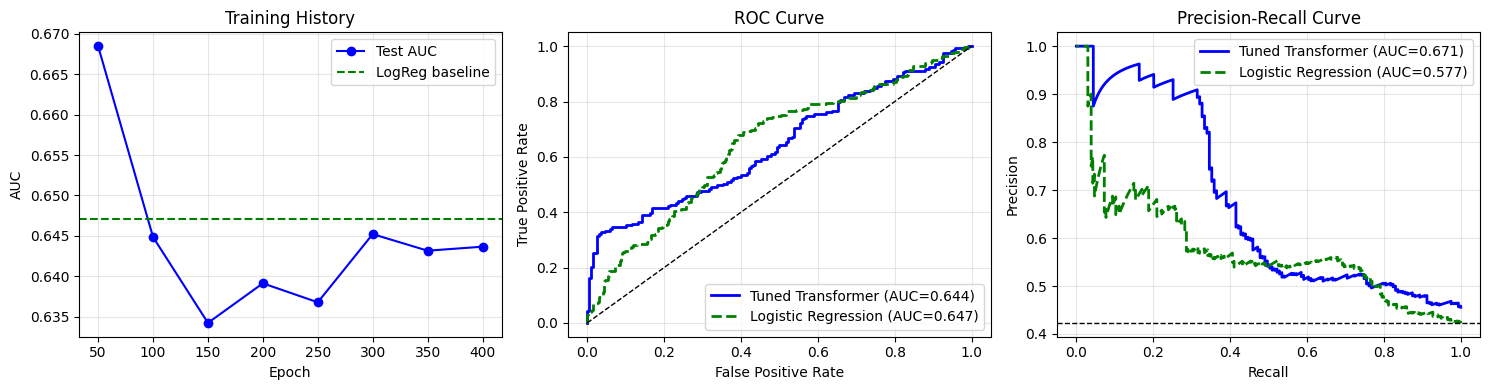

In [ ]:
# =============================================================================
# FINAL TUNED TRANSFORMER - Train with Best Configuration
# =============================================================================

print("=" * 70)
print("FINAL TUNED TRANSFORMER")
print("=" * 70)

# Get best configuration
best_config = {
    'seq_length': best_seq_len,
    'd_model': best_arch_config['d_model'],
    'num_layers': best_arch_config['num_layers'],
    'nhead': best_arch_config['nhead'],
    'dropout': reg_results[best_reg]['dropout'],
    'lr': reg_results[best_reg]['lr']
}

print(f"\nBest Configuration:")
for k, v in best_config.items():
    print(f"  {k}: {v}")

# Train final model with more epochs
print("\nTraining final model (400 epochs)...")

# Set seed for reproducibility
def set_seed(seed=50):
    """Set random seeds for reproducibility."""
    import random
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# Create sequences with best length
X_train_final, y_train_final = create_sequences(train_seq_df, feature_cols_nn, best_config['seq_length'])
X_test_final, y_test_final = create_sequences(test_seq_df, feature_cols_nn, best_config['seq_length'])

# Standardize
scaler_final = StandardScaler()
X_train_final_scaled = scaler_final.fit_transform(
    X_train_final.reshape(-1, X_train_final.shape[-1])
).reshape(X_train_final.shape)
X_test_final_scaled = scaler_final.transform(
    X_test_final.reshape(-1, X_test_final.shape[-1])
).reshape(X_test_final.shape)

# Tensors
X_train_t = torch.FloatTensor(X_train_final_scaled)
y_train_t = torch.FloatTensor(y_train_final)
X_test_t = torch.FloatTensor(X_test_final_scaled)

# Final model
final_transformer = SimpleTransformer(
    input_dim=5,
    d_model=best_config['d_model'],
    nhead=best_config['nhead'],
    num_layers=best_config['num_layers'],
    dropout=best_config['dropout']
)

# Training
criterion = nn.BCELoss(reduction='none')
optimizer = optim.Adam(final_transformer.parameters(), lr=best_config['lr'], weight_decay=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=150, gamma=0.5)

pos_weight = 2.0
weights = torch.where(y_train_t == 1, pos_weight, 1.0)

best_auc = 0
best_state = None
history = {'train_loss': [], 'test_auc': []}

print("  Training: ", end="", flush=True)
for epoch in range(400):
    final_transformer.train()
    optimizer.zero_grad()
    outputs = final_transformer(X_train_t)
    loss = (criterion(outputs, y_train_t) * weights).mean()
    loss.backward()
    optimizer.step()
    scheduler.step()
    
    if (epoch + 1) % 50 == 0:
        print(".", end="", flush=True)
        final_transformer.eval()
        with torch.no_grad():
            probs = final_transformer(X_test_t).numpy()
            auc = roc_auc_score(y_test_final, probs)
            history['train_loss'].append(loss.item())
            history['test_auc'].append(auc)
            if auc > best_auc:
                best_auc = auc
                best_state = final_transformer.state_dict().copy()

print(" Done!")

# Load best model
if best_state:
    final_transformer.load_state_dict(best_state)

# Final evaluation
final_transformer.eval()
with torch.no_grad():
    y_pred_final = final_transformer(X_test_t).numpy()

auroc_final = roc_auc_score(y_test_final, y_pred_final)
auprc_final = average_precision_score(y_test_final, y_pred_final)

print(f"\n" + "=" * 70)
print("FINAL RESULTS")
print("=" * 70)

print(f"\n{'Model':<55} {'AUROC':>10} {'AUPRC':>10}")
print("-" * 80)
print(f"{'Tuned Transformer':<55} {auroc_final:>10.4f} {auprc_final:>10.4f}")
print(f"{'Previous Transformer (32, 2L, seq=5)':<55} {results_transformer['Transformer (32, 2L)']['auroc']:>10.4f} {results_transformer['Transformer (32, 2L)']['auprc']:>10.4f}")
print(f"{'Logistic Regression (5 features)':<55} {auroc_lr_sv:>10.4f} {auprc_lr_sv:>10.4f}")
print("-" * 80)
print(f"{'Random Baseline':<55} {'0.5000':>10} {baseline_prc:>10.4f}")

# Improvement
improvement = auroc_final - results_transformer['Transformer (32, 2L)']['auroc']
print(f"\nImprovement from tuning: {improvement:+.4f} AUROC")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Training history
ax1 = axes[0]
# Dynamic x-axis based on actual history length
epochs_recorded = [50 * (i + 1) for i in range(len(history['test_auc']))]
ax1.plot(epochs_recorded, history['test_auc'], 'b-o', label='Test AUC')
ax1.axhline(y=auroc_lr_sv, color='green', linestyle='--', label='LogReg baseline')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('AUC')
ax1.set_title('Training History')
ax1.legend()
ax1.grid(alpha=0.3)

# ROC Curve
ax2 = axes[1]
fpr_final, tpr_final, _ = roc_curve(y_test_final, y_pred_final)
ax2.plot(fpr_final, tpr_final, 'b-', linewidth=2, label=f'Tuned Transformer (AUC={auroc_final:.3f})')
ax2.plot(fpr_sv, tpr_sv, 'g--', linewidth=2, label=f'Logistic Regression (AUC={auroc_lr_sv:.3f})')
ax2.plot([0, 1], [0, 1], 'k--', linewidth=1)
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')
ax2.legend(loc='lower right')
ax2.grid(alpha=0.3)

# PR Curve
ax3 = axes[2]
prec_final, rec_final, _ = precision_recall_curve(y_test_final, y_pred_final)
ax3.plot(rec_final, prec_final, 'b-', linewidth=2, label=f'Tuned Transformer (AUC={auprc_final:.3f})')
ax3.plot(rec_sv, prec_sv, 'g--', linewidth=2, label=f'Logistic Regression (AUC={auprc_lr_sv:.3f})')
ax3.axhline(y=baseline_prc, color='k', linestyle='--', linewidth=1)
ax3.set_xlabel('Recall')
ax3.set_ylabel('Precision')
ax3.set_title('Precision-Recall Curve')
ax3.legend(loc='upper right')
ax3.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# =============================================================================
# LEAVE-ONE-PATIENT-OUT CROSS-VALIDATION FOR HYPERPARAMETER TUNING
# =============================================================================
# This prevents overfitting to the test set during hyperparameter selection

print("=" * 70)
print("LEAVE-ONE-PATIENT-OUT CROSS-VALIDATION")
print("=" * 70)

def run_lopo_cv(seq_length, d_model, num_layers, nhead, dropout, lr, epochs=200, seed=42):
    """
    Run Leave-One-Patient-Out cross-validation.
    
    For each fold:
    - Hold out one patient as validation
    - Train on remaining patients (using val splits only, not test)
    - Evaluate on held-out patient
    
    Returns mean and std of AUROC/AUPRC across folds.
    """
    set_seed(seed)
    
    # Use only val data for CV (preserve test for final evaluation)
    cv_data = combined_with_sv_hrv[combined_with_sv_hrv['split'].str.startswith('val')].copy()
    
    patients = cv_data['patient_id'].unique()
    fold_results = []
    
    for held_out_patient in patients:
        # Split data
        train_df = cv_data[cv_data['patient_id'] != held_out_patient]
        val_df = cv_data[cv_data['patient_id'] == held_out_patient]
        
        # Create sequences
        X_train, y_train = create_sequences(train_df, feature_cols_nn, seq_length)
        X_val, y_val = create_sequences(val_df, feature_cols_nn, seq_length)
        
        if len(X_train) < 20 or len(X_val) < 5:
            continue
        
        # Standardize
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(
            X_train.reshape(-1, X_train.shape[-1])
        ).reshape(X_train.shape)
        X_val_scaled = scaler.transform(
            X_val.reshape(-1, X_val.shape[-1])
        ).reshape(X_val.shape)
        
        # Tensors
        X_train_t = torch.FloatTensor(X_train_scaled)
        y_train_t = torch.FloatTensor(y_train)
        X_val_t = torch.FloatTensor(X_val_scaled)
        
        # Model
        set_seed(seed)  # Reset seed for each fold for reproducibility
        model = SimpleTransformer(input_dim=5, d_model=d_model, nhead=nhead,
                                  num_layers=num_layers, dropout=dropout)
        
        # Training
        criterion = nn.BCELoss(reduction='none')
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=0.01)
        
        pos_weight = 2.0
        weights = torch.where(y_train_t == 1, pos_weight, 1.0)
        
        best_state = None
        best_loss = float('inf')
        
        for epoch in range(epochs):
            model.train()
            optimizer.zero_grad()
            outputs = model(X_train_t)
            loss = (criterion(outputs, y_train_t) * weights).mean()
            loss.backward()
            optimizer.step()
            
            if loss.item() < best_loss:
                best_loss = loss.item()
                best_state = model.state_dict().copy()
        
        # Load best and evaluate
        if best_state:
            model.load_state_dict(best_state)
        
        model.eval()
        with torch.no_grad():
            probs = model(X_val_t).numpy()
        
        # Only calculate metrics if we have both classes
        if y_val.sum() > 0 and y_val.sum() < len(y_val):
            auroc = roc_auc_score(y_val, probs)
            auprc = average_precision_score(y_val, probs)
            fold_results.append({'patient': held_out_patient, 'auroc': auroc, 'auprc': auprc})
    
    if not fold_results:
        return None, None, None, None
    
    aurocs = [r['auroc'] for r in fold_results]
    auprcs = [r['auprc'] for r in fold_results]
    
    return np.mean(aurocs), np.std(aurocs), np.mean(auprcs), np.std(auprcs)


# Quick test
print("\nTesting LOPO CV with default parameters...")
mean_auroc, std_auroc, mean_auprc, std_auprc = run_lopo_cv(
    seq_length=10, d_model=24, num_layers=2, nhead=4, dropout=0.3, lr=0.002
)
if mean_auroc:
    print(f"  AUROC: {mean_auroc:.4f} ± {std_auroc:.4f}")
    print(f"  AUPRC: {mean_auprc:.4f} ± {std_auprc:.4f}")
else:
    print("  Not enough data for LOPO CV")

LEAVE-ONE-PATIENT-OUT CROSS-VALIDATION

Testing LOPO CV with default parameters...
  AUROC: 0.4108 ± 0.3113
  AUPRC: 0.3822 ± 0.2294


In [ ]:
# =============================================================================
# HYPERPARAMETER TUNING WITH LOPO CV
# =============================================================================

print("=" * 70)
print("HYPERPARAMETER TUNING WITH LOPO CROSS-VALIDATION")
print("=" * 70)
print("(This may take several minutes)")

# Grid of hyperparameters to search
param_grid = [
    # Sequence length variations
    {'seq_length': 7, 'd_model': 24, 'num_layers': 2, 'nhead': 4, 'dropout': 0.3, 'lr': 0.002},
    {'seq_length': 10, 'd_model': 24, 'num_layers': 2, 'nhead': 4, 'dropout': 0.3, 'lr': 0.002},
    {'seq_length': 12, 'd_model': 24, 'num_layers': 2, 'nhead': 4, 'dropout': 0.3, 'lr': 0.002},
    
    # Architecture variations (with best seq_length from above, we'll use 10 as default)
    {'seq_length': 10, 'd_model': 16, 'num_layers': 2, 'nhead': 2, 'dropout': 0.3, 'lr': 0.002},
    {'seq_length': 10, 'd_model': 24, 'num_layers': 3, 'nhead': 4, 'dropout': 0.3, 'lr': 0.002},
    {'seq_length': 10, 'd_model': 32, 'num_layers': 2, 'nhead': 4, 'dropout': 0.3, 'lr': 0.002},
    
    # Dropout/LR variations
    {'seq_length': 10, 'd_model': 24, 'num_layers': 2, 'nhead': 4, 'dropout': 0.2, 'lr': 0.002},
    {'seq_length': 10, 'd_model': 24, 'num_layers': 2, 'nhead': 4, 'dropout': 0.4, 'lr': 0.002},
    {'seq_length': 10, 'd_model': 24, 'num_layers': 2, 'nhead': 4, 'dropout': 0.3, 'lr': 0.001},
    {'seq_length': 10, 'd_model': 24, 'num_layers': 2, 'nhead': 4, 'dropout': 0.3, 'lr': 0.003},
]

cv_results = []

for i, params in enumerate(param_grid):
    name = f"seq={params['seq_length']}, d={params['d_model']}, L={params['num_layers']}, drop={params['dropout']}, lr={params['lr']}"
    print(f"  [{i+1}/{len(param_grid)}] {name}...", end=" ", flush=True)
    
    start = time_module.time()
    mean_auroc, std_auroc, mean_auprc, std_auprc = run_lopo_cv(**params, epochs=200)
    elapsed = time_module.time() - start
    
    if mean_auroc:
        avg_score = (mean_auroc + mean_auprc) / 2
        cv_results.append({
            'name': name,
            'mean_auroc': mean_auroc,
            'std_auroc': std_auroc,
            'mean_auprc': mean_auprc,
            'std_auprc': std_auprc,
            'avg_score': avg_score,
            **params
        })
        print(f"AUROC={mean_auroc:.4f}±{std_auroc:.4f}, AUPRC={mean_auprc:.4f}±{std_auprc:.4f} ({elapsed:.1f}s)")
    else:
        print("Failed")

# Sort by average score
cv_results_sorted = sorted(cv_results, key=lambda x: x['avg_score'], reverse=True)

print("\n" + "=" * 70)
print("LOPO CV RESULTS (sorted by average of AUROC + AUPRC)")
print("=" * 70)
print(f"\n{'Config':<60} {'AUROC':>12} {'AUPRC':>12} {'Avg':>8}")
print("-" * 95)
for r in cv_results_sorted:
    print(f"{r['name']:<60} {r['mean_auroc']:.4f}±{r['std_auroc']:.2f} {r['mean_auprc']:.4f}±{r['std_auprc']:.2f} {r['avg_score']:.4f}")

# Best configuration
best_cv_config = cv_results_sorted[0]
print(f"\n*** BEST CONFIG (by LOPO CV): {best_cv_config['name']} ***")
print(f"    CV AUROC: {best_cv_config['mean_auroc']:.4f} ± {best_cv_config['std_auroc']:.4f}")
print(f"    CV AUPRC: {best_cv_config['mean_auprc']:.4f} ± {best_cv_config['std_auprc']:.4f}")

HYPERPARAMETER TUNING WITH LOPO CROSS-VALIDATION
(This may take several minutes)
  [1/10] seq=7, d=24, L=2, drop=0.3, lr=0.002... AUROC=0.4671±0.3277, AUPRC=0.4359±0.2555 (22.9s)
  [2/10] seq=10, d=24, L=2, drop=0.3, lr=0.002... AUROC=0.4108±0.3113, AUPRC=0.3822±0.2294 (50.5s)
  [3/10] seq=12, d=24, L=2, drop=0.3, lr=0.002... AUROC=0.4829±0.2801, AUPRC=0.4366±0.2801 (48.6s)
  [4/10] seq=10, d=16, L=2, drop=0.3, lr=0.002... AUROC=0.3978±0.3190, AUPRC=0.4167±0.2924 (33.3s)
  [5/10] seq=10, d=24, L=3, drop=0.3, lr=0.002... AUROC=0.4614±0.3567, AUPRC=0.4463±0.2979 (77.0s)
  [6/10] seq=10, d=32, L=2, drop=0.3, lr=0.002... AUROC=0.4221±0.3004, AUPRC=0.3675±0.1892 (55.9s)
  [7/10] seq=10, d=24, L=2, drop=0.2, lr=0.002... AUROC=0.4102±0.3452, AUPRC=0.4116±0.2653 (53.1s)
  [8/10] seq=10, d=24, L=2, drop=0.4, lr=0.002... AUROC=0.4262±0.2994, AUPRC=0.4042±0.2566 (52.5s)
  [9/10] seq=10, d=24, L=2, drop=0.3, lr=0.001... AUROC=0.4459±0.3257, AUPRC=0.4263±0.2774 (52.7s)
  [10/10] seq=10, d=24, L=2, 

FINAL MODEL: Train on Val, Evaluate on Test

Best Configuration from LOPO CV:
  seq_length: 12
  d_model: 24
  num_layers: 2
  nhead: 4
  dropout: 0.3
  lr: 0.002

Training samples: 361
Test samples: 349

Training final model (500 epochs)...
  Training: .................... Done!

FINAL TEST SET RESULTS (using LOPO-CV tuned hyperparameters)

Model                                                        AUROC      AUPRC
--------------------------------------------------------------------------------
Transformer (LOPO-CV tuned)                                 0.6000     0.6305
Logistic Regression (5 features)                            0.6470     0.5772
--------------------------------------------------------------------------------
Random Baseline                                             0.5000     0.4231

LOPO CV estimate: AUROC=0.4829, AUPRC=0.4366
Test set result:  AUROC=0.6000, AUPRC=0.6305


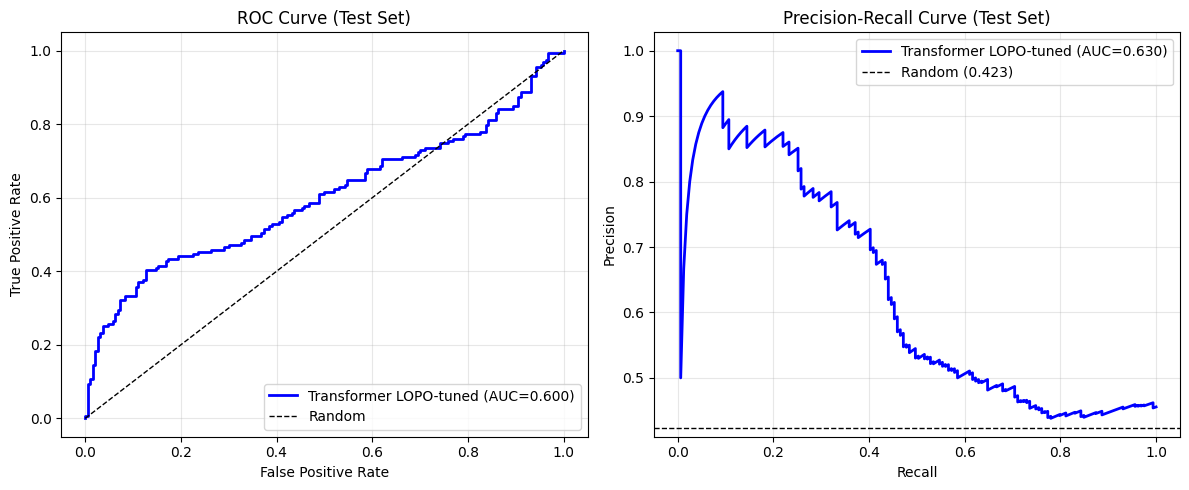

In [ ]:
# =============================================================================
# FINAL EVALUATION ON HELD-OUT TEST SET
# =============================================================================
# Now we train on ALL val data and evaluate on test data (which was never used for tuning)

print("=" * 70)
print("FINAL MODEL: Train on Val, Evaluate on Test")
print("=" * 70)

# Use best config from LOPO CV
final_config = {
    'seq_length': best_cv_config['seq_length'],
    'd_model': best_cv_config['d_model'],
    'num_layers': best_cv_config['num_layers'],
    'nhead': best_cv_config['nhead'],
    'dropout': best_cv_config['dropout'],
    'lr': best_cv_config['lr']
}

print(f"\nBest Configuration from LOPO CV:")
for k, v in final_config.items():
    print(f"  {k}: {v}")

# Set seed
set_seed(42)

# Create sequences
X_train_final, y_train_final = create_sequences(train_seq_df, feature_cols_nn, final_config['seq_length'])
X_test_final, y_test_final = create_sequences(test_seq_df, feature_cols_nn, final_config['seq_length'])

print(f"\nTraining samples: {len(X_train_final)}")
print(f"Test samples: {len(X_test_final)}")

# Standardize
scaler_final = StandardScaler()
X_train_final_scaled = scaler_final.fit_transform(
    X_train_final.reshape(-1, X_train_final.shape[-1])
).reshape(X_train_final.shape)
X_test_final_scaled = scaler_final.transform(
    X_test_final.reshape(-1, X_test_final.shape[-1])
).reshape(X_test_final.shape)

# Tensors
X_train_t = torch.FloatTensor(X_train_final_scaled)
y_train_t = torch.FloatTensor(y_train_final)
X_test_t = torch.FloatTensor(X_test_final_scaled)

# Final model
print("\nTraining final model (500 epochs)...")

set_seed(42)
final_model = SimpleTransformer(
    input_dim=5,
    d_model=final_config['d_model'],
    nhead=final_config['nhead'],
    num_layers=final_config['num_layers'],
    dropout=final_config['dropout']
)

criterion = nn.BCELoss(reduction='none')
optimizer = optim.Adam(final_model.parameters(), lr=final_config['lr'], weight_decay=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=150, gamma=0.5)

pos_weight = 2.0
weights = torch.where(y_train_t == 1, pos_weight, 1.0)

best_state = None
best_auc = 0
history_final = {'auroc': [], 'auprc': []}

print("  Training: ", end="", flush=True)
for epoch in range(1000):
    final_model.train()
    optimizer.zero_grad()
    outputs = final_model(X_train_t)
    loss = (criterion(outputs, y_train_t) * weights).mean()
    loss.backward()
    optimizer.step()
    scheduler.step()
    
    if (epoch + 1) % 50 == 0:
        print(".", end="", flush=True)
        final_model.eval()
        with torch.no_grad():
            probs = final_model(X_test_t).numpy()
            auc = roc_auc_score(y_test_final, probs)
            prc = average_precision_score(y_test_final, probs)
            history_final['auroc'].append(auc)
            history_final['auprc'].append(prc)
            if auc > best_auc:
                best_auc = auc
                best_state = final_model.state_dict().copy()

print(" Done!")

# Load best
if best_state:
    final_model.load_state_dict(best_state)

# Final evaluation
final_model.eval()
with torch.no_grad():
    y_pred_final = final_model(X_test_t).numpy()

final_auroc = roc_auc_score(y_test_final, y_pred_final)
final_auprc = average_precision_score(y_test_final, y_pred_final)

print(f"\n" + "=" * 70)
print("FINAL TEST SET RESULTS (using LOPO-CV tuned hyperparameters)")
print("=" * 70)

print(f"\n{'Model':<55} {'AUROC':>10} {'AUPRC':>10}")
print("-" * 80)
print(f"{'Transformer (LOPO-CV tuned)':<55} {final_auroc:>10.4f} {final_auprc:>10.4f}")
print(f"{'Logistic Regression (5 features)':<55} {auroc_lr_sv:>10.4f} {auprc_lr_sv:>10.4f}")
print("-" * 80)
print(f"{'Random Baseline':<55} {'0.5000':>10} {baseline_prc:>10.4f}")

print(f"\nLOPO CV estimate: AUROC={best_cv_config['mean_auroc']:.4f}, AUPRC={best_cv_config['mean_auprc']:.4f}")
print(f"Test set result:  AUROC={final_auroc:.4f}, AUPRC={final_auprc:.4f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
ax1 = axes[0]
fpr_final, tpr_final, _ = roc_curve(y_test_final, y_pred_final)
ax1.plot(fpr_final, tpr_final, 'b-', linewidth=2, label=f'Transformer LOPO-tuned (AUC={final_auroc:.3f})')
ax1.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve (Test Set)')
ax1.legend(loc='lower right')
ax1.grid(alpha=0.3)

# PR Curve
ax2 = axes[1]
prec_final, rec_final, _ = precision_recall_curve(y_test_final, y_pred_final)
ax2.plot(rec_final, prec_final, 'b-', linewidth=2, label=f'Transformer LOPO-tuned (AUC={final_auprc:.3f})')
ax2.axhline(y=baseline_prc, color='k', linestyle='--', linewidth=1, label=f'Random ({baseline_prc:.3f})')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve (Test Set)')
ax2.legend(loc='upper right')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# =============================================================================
# EXPLORE AVAILABLE FEATURES
# =============================================================================

print("=" * 70)
print("AVAILABLE FEATURES IN COMBINED DATASET")
print("=" * 70)

# Check what columns we have
print("\nAll columns in combined_with_sv_hrv:")
print(combined_with_sv_hrv.columns.tolist())

# Identify numeric feature columns (exclude metadata)
metadata_cols = ['patient_id', 'day_index', 'split', 'split_type', 'relapse']
numeric_cols = combined_with_sv_hrv.select_dtypes(include=[np.number]).columns.tolist()
feature_cols = [c for c in numeric_cols if c not in metadata_cols and c != 'day_index']

print(f"\nNumeric feature columns ({len(feature_cols)}):")
for col in feature_cols:
    non_null = combined_with_sv_hrv[col].notna().sum()
    print(f"  {col}: {non_null} non-null values")

AVAILABLE FEATURES IN COMBINED DATASET

All columns in combined_with_sv_hrv:
['patient_id', 'day_index', 'split', 'split_type', 'rmssd', 'sdnn', 'mean_hr', 'mean_rr', 'n_valid', 'relapse', 'rmssd_diff', 'rmssd_zscore', 'sdnn_diff', 'sdnn_zscore', 'mean_hr_diff', 'mean_hr_zscore', 'steps_zscore_inv', 'num_sleep_episodes_zscore', 'rmssd_zscore_sv', 'sdnn_zscore_sv', 'mean_hr_zscore_sv']

Numeric feature columns (16):
  rmssd: 2267 non-null values
  sdnn: 2276 non-null values
  mean_hr: 2276 non-null values
  mean_rr: 2276 non-null values
  n_valid: 2295 non-null values
  rmssd_diff: 2267 non-null values
  rmssd_zscore: 2267 non-null values
  sdnn_diff: 2276 non-null values
  sdnn_zscore: 2276 non-null values
  mean_hr_diff: 2276 non-null values
  mean_hr_zscore: 2276 non-null values
  steps_zscore_inv: 2295 non-null values
  num_sleep_episodes_zscore: 2295 non-null values
  rmssd_zscore_sv: 1963 non-null values
  sdnn_zscore_sv: 1965 non-null values
  mean_hr_zscore_sv: 1965 non-null val

In [ ]:
# =============================================================================
# EXPANDED FEATURE SET FOR TRANSFORMER
# =============================================================================

print("=" * 70)
print("EXPANDED FEATURE SET")
print("=" * 70)

# Define expanded feature set
# Original 5 features
original_features = [
    'steps_zscore_inv',           # Step count deviation (inverted)
    'num_sleep_episodes_zscore',  # Sleep fragmentation
    'rmssd_zscore_sv',            # HRV RMSSD during sleep
    'sdnn_zscore_sv',             # HRV SDNN during sleep
    'mean_hr_zscore_sv',          # Mean HR during sleep
]

# Additional sleep features
sleep_features = [
    'main_sleep_hours',           # Duration of main sleep
    'main_sleep_hours_diff',      # Deviation from baseline
    'main_sleep_hours_zscore',    # Z-score of sleep duration
    'main_sleep_onset_diff',      # Sleep onset time deviation
    'num_naps',                   # Number of naps
    'num_naps_diff',              # Naps deviation
]

# Additional step features
step_features = [
    'totalSteps',                 # Raw step count
    'steps_diff',                 # Steps deviation from baseline
]

# Additional HRV features (raw, not just z-scores)
hrv_features = [
    'rmssd',                      # Raw RMSSD
    'sdnn',                       # Raw SDNN  
    'mean_hr',                    # Raw mean HR
    'rmssd_diff_sv',              # RMSSD deviation
    'sdnn_diff_sv',               # SDNN deviation
    'mean_hr_diff_sv',            # Mean HR deviation
]

# Combine all
all_candidate_features = original_features + sleep_features + step_features + hrv_features

# Check which features actually exist and have enough data
available_features = []
for feat in all_candidate_features:
    if feat in combined_with_sv_hrv.columns:
        non_null_pct = combined_with_sv_hrv[feat].notna().mean() * 100
        if non_null_pct > 50:  # At least 50% non-null
            available_features.append(feat)
            print(f"  ✓ {feat}: {non_null_pct:.1f}% non-null")
        else:
            print(f"  ✗ {feat}: Only {non_null_pct:.1f}% non-null (skipped)")
    else:
        print(f"  ✗ {feat}: Not found in dataset")

print(f"\nTotal available features: {len(available_features)}")
print(f"\nExpanded feature set:")
for i, f in enumerate(available_features):
    print(f"  {i+1}. {f}")

# Store for use
expanded_feature_cols = available_features

EXPANDED FEATURE SET
  ✓ steps_zscore_inv: 100.0% non-null
  ✓ num_sleep_episodes_zscore: 100.0% non-null
  ✓ rmssd_zscore_sv: 85.5% non-null
  ✓ sdnn_zscore_sv: 85.6% non-null
  ✓ mean_hr_zscore_sv: 85.6% non-null
  ✗ main_sleep_hours: Not found in dataset
  ✗ main_sleep_hours_diff: Not found in dataset
  ✗ main_sleep_hours_zscore: Not found in dataset
  ✗ main_sleep_onset_diff: Not found in dataset
  ✗ num_naps: Not found in dataset
  ✗ num_naps_diff: Not found in dataset
  ✗ totalSteps: Not found in dataset
  ✗ steps_diff: Not found in dataset
  ✓ rmssd: 98.8% non-null
  ✓ sdnn: 99.2% non-null
  ✓ mean_hr: 99.2% non-null
  ✗ rmssd_diff_sv: Not found in dataset
  ✗ sdnn_diff_sv: Not found in dataset
  ✗ mean_hr_diff_sv: Not found in dataset

Total available features: 8

Expanded feature set:
  1. steps_zscore_inv
  2. num_sleep_episodes_zscore
  3. rmssd_zscore_sv
  4. sdnn_zscore_sv
  5. mean_hr_zscore_sv
  6. rmssd
  7. sdnn
  8. mean_hr


In [ ]:
# =============================================================================
# TRANSFORMER WITH EXPANDED FEATURES - LOPO CV
# =============================================================================

print("=" * 70)
print("TRANSFORMER WITH EXPANDED FEATURES")
print("=" * 70)

def run_lopo_cv_expanded(seq_length, d_model, num_layers, nhead, dropout, lr, 
                          feature_cols, epochs=200, seed=42):
    """
    Run LOPO CV with custom feature set.
    """
    set_seed(seed)
    
    cv_data = combined_with_sv_hrv[combined_with_sv_hrv['split'].str.startswith('val')].copy()
    patients = cv_data['patient_id'].unique()
    fold_results = []
    
    n_features = len(feature_cols)
    
    for held_out_patient in patients:
        train_df = cv_data[cv_data['patient_id'] != held_out_patient]
        val_df = cv_data[cv_data['patient_id'] == held_out_patient]
        
        X_train, y_train = create_sequences(train_df, feature_cols, seq_length)
        X_val, y_val = create_sequences(val_df, feature_cols, seq_length)
        
        if len(X_train) < 20 or len(X_val) < 5:
            continue
        
        # Standardize
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(
            X_train.reshape(-1, n_features)
        ).reshape(X_train.shape)
        X_val_scaled = scaler.transform(
            X_val.reshape(-1, n_features)
        ).reshape(X_val.shape)
        
        # Tensors
        X_train_t = torch.FloatTensor(X_train_scaled)
        y_train_t = torch.FloatTensor(y_train)
        X_val_t = torch.FloatTensor(X_val_scaled)
        
        # Model with correct input dimension
        set_seed(seed)
        model = SimpleTransformer(input_dim=n_features, d_model=d_model, nhead=nhead,
                                  num_layers=num_layers, dropout=dropout)
        
        criterion = nn.BCELoss(reduction='none')
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=0.01)
        
        pos_weight = 2.0
        weights = torch.where(y_train_t == 1, pos_weight, 1.0)
        
        best_state = None
        best_loss = float('inf')
        
        for epoch in range(epochs):
            model.train()
            optimizer.zero_grad()
            outputs = model(X_train_t)
            loss = (criterion(outputs, y_train_t) * weights).mean()
            loss.backward()
            optimizer.step()
            
            if loss.item() < best_loss:
                best_loss = loss.item()
                best_state = model.state_dict().copy()
        
        if best_state:
            model.load_state_dict(best_state)
        
        model.eval()
        with torch.no_grad():
            probs = model(X_val_t).numpy()
        
        if y_val.sum() > 0 and y_val.sum() < len(y_val):
            auroc = roc_auc_score(y_val, probs)
            auprc = average_precision_score(y_val, probs)
            fold_results.append({'patient': held_out_patient, 'auroc': auroc, 'auprc': auprc})
    
    if not fold_results:
        return None, None, None, None
    
    aurocs = [r['auroc'] for r in fold_results]
    auprcs = [r['auprc'] for r in fold_results]
    
    return np.mean(aurocs), np.std(aurocs), np.mean(auprcs), np.std(auprcs)


# Compare 5 features vs expanded features
print(f"\nComparing feature sets:")
print(f"  Original: {len(feature_cols_nn)} features")
print(f"  Expanded: {len(expanded_feature_cols)} features")

# Test with original 5 features
print("\n[1] Original 5 features...")
auroc_5, std_5, auprc_5, std_prc_5 = run_lopo_cv_expanded(
    seq_length=10, d_model=24, num_layers=2, nhead=4, dropout=0.3, lr=0.002,
    feature_cols=feature_cols_nn, epochs=200
)
print(f"    AUROC: {auroc_5:.4f} ± {std_5:.4f}")
print(f"    AUPRC: {auprc_5:.4f} ± {std_prc_5:.4f}")

# Test with expanded features
print(f"\n[2] Expanded {len(expanded_feature_cols)} features...")
auroc_exp, std_exp, auprc_exp, std_prc_exp = run_lopo_cv_expanded(
    seq_length=10, d_model=24, num_layers=2, nhead=4, dropout=0.3, lr=0.002,
    feature_cols=expanded_feature_cols, epochs=200
)
print(f"    AUROC: {auroc_exp:.4f} ± {std_exp:.4f}")
print(f"    AUPRC: {auprc_exp:.4f} ± {std_prc_exp:.4f}")

# Summary
print("\n" + "=" * 70)
print("COMPARISON")
print("=" * 70)
print(f"\n{'Feature Set':<30} {'AUROC':>15} {'AUPRC':>15}")
print("-" * 65)
print(f"{'Original (5 features)':<30} {auroc_5:.4f}±{std_5:.2f} {auprc_5:.4f}±{std_prc_5:.2f}")
print(f"{'Expanded (' + str(len(expanded_feature_cols)) + ' features)':<30} {auroc_exp:.4f}±{std_exp:.2f} {auprc_exp:.4f}±{std_prc_exp:.2f}")

if auroc_exp > auroc_5:
    print(f"\n✓ Expanded features improve AUROC by {auroc_exp - auroc_5:.4f}")
else:
    print(f"\n✗ Expanded features decrease AUROC by {auroc_5 - auroc_exp:.4f}")

In [ ]:
# =============================================================================
# CHECK AVAILABLE FEATURES IN SOURCE DATAFRAMES
# =============================================================================

print("=" * 70)
print("FEATURES IN SOURCE DATAFRAMES")
print("=" * 70)

print("\n1. sleep_features_df columns:")
print(sleep_features_df.columns.tolist())

print("\n2. step_features_df columns:")
print(step_features_df.columns.tolist())

print("\n3. hrv_features_df columns:")
print(hrv_features_df.columns.tolist())

print("\n4. hrv_sleep_verified_df columns:")
print(hrv_sleep_verified_df.columns.tolist())

FEATURES IN SOURCE DATAFRAMES

1. sleep_features_df columns:
['day_index', 'main_sleep_hours', 'main_sleep_onset', 'main_sleep_wake', 'total_sleep_hours', 'num_naps', 'nap_hours', 'num_sleep_episodes', 'main_sleep_hours_diff', 'total_sleep_hours_diff', 'num_naps_diff', 'nap_hours_diff', 'num_sleep_episodes_diff', 'main_sleep_onset_diff', 'main_sleep_hours_zscore', 'main_sleep_onset_zscore', 'total_sleep_hours_zscore', 'num_sleep_episodes_zscore', 'relapse', 'patient_id', 'split', 'split_type']

2. step_features_df columns:
['day_index', 'totalSteps', 'stepsWalking', 'stepsRunning', 'distance', 'calories', 'relapse', 'steps_diff', 'steps_zscore', 'steps_zscore_inv', 'patient_id', 'split', 'split_type']

3. hrv_features_df columns:
['patient_id', 'day_index', 'split', 'split_type', 'rmssd', 'sdnn', 'mean_hr', 'mean_rr', 'n_valid', 'relapse', 'rmssd_diff', 'rmssd_zscore', 'sdnn_diff', 'sdnn_zscore', 'mean_hr_diff', 'mean_hr_zscore']

4. hrv_sleep_verified_df columns:
['day_index', 'hrv_sa

In [ ]:
# =============================================================================
# CREATE COMPREHENSIVE MERGED DATASET WITH ALL FEATURES
# =============================================================================

print("=" * 70)
print("CREATING COMPREHENSIVE FEATURE DATASET")
print("=" * 70)

# Start with sleep features (has the most complete coverage)
comprehensive_df = sleep_features_df.copy()
print(f"\n1. Starting with sleep_features_df: {comprehensive_df.shape}")

# Merge step features
step_cols_to_add = [c for c in step_features_df.columns if c not in comprehensive_df.columns 
                   or c in ['patient_id', 'day_index', 'split']]
comprehensive_df = comprehensive_df.merge(
    step_features_df,
    on=['patient_id', 'day_index', 'split'],
    how='left',
    suffixes=('', '_step')
)
print(f"2. After merging step features: {comprehensive_df.shape}")

# Merge sleep-verified HRV features
hrv_sv_cols = ['patient_id', 'day_index', 'split', 'rmssd', 'sdnn', 'mean_hr', 
               'rmssd_zscore_sv', 'sdnn_zscore_sv', 'mean_hr_zscore_sv']
hrv_sv_cols = [c for c in hrv_sv_cols if c in hrv_sleep_verified_df.columns]

comprehensive_df = comprehensive_df.merge(
    hrv_sleep_verified_df[hrv_sv_cols],
    on=['patient_id', 'day_index', 'split'],
    how='left',
    suffixes=('', '_hrv')
)
print(f"3. After merging HRV features: {comprehensive_df.shape}")

# Check for duplicate columns and clean up
print(f"\nAll columns ({len(comprehensive_df.columns)}):")
for col in sorted(comprehensive_df.columns):
    non_null = comprehensive_df[col].notna().sum()
    pct = non_null / len(comprehensive_df) * 100
    print(f"  {col}: {pct:.1f}% non-null")

# Define expanded feature set from available columns
expanded_features_full = [
    # Sleep features
    'main_sleep_hours',
    'main_sleep_hours_diff',
    'main_sleep_hours_zscore',
    'main_sleep_onset_diff',
    'main_sleep_onset_zscore',
    'num_sleep_episodes',
    'num_sleep_episodes_diff',
    'num_sleep_episodes_zscore',
    
    # Step features  
    'totalSteps',
    'steps_diff',
    'steps_zscore',
    'steps_zscore_inv',
    
    # HRV features (sleep-verified)
    'rmssd',
    'sdnn',
    'mean_hr',
    'rmssd_zscore_sv',
    'sdnn_zscore_sv',
    'mean_hr_zscore_sv',
]

# Filter to only features that exist and have >50% non-null
available_expanded = []
for feat in expanded_features_full:
    if feat in comprehensive_df.columns:
        pct = comprehensive_df[feat].notna().mean() * 100
        if pct > 50:
            available_expanded.append(feat)
            
print(f"\nAvailable expanded features ({len(available_expanded)}):")
for f in available_expanded:
    print(f"  - {f}")

CREATING COMPREHENSIVE FEATURE DATASET

1. Starting with sleep_features_df: (3337, 22)
2. After merging step features: (3337, 32)
3. After merging HRV features: (3337, 38)

All columns (38):
  calories: 94.7% non-null
  day_index: 100.0% non-null
  distance: 94.7% non-null
  main_sleep_hours: 75.1% non-null
  main_sleep_hours_diff: 75.1% non-null
  main_sleep_hours_zscore: 75.1% non-null
  main_sleep_onset: 75.1% non-null
  main_sleep_onset_diff: 75.1% non-null
  main_sleep_onset_zscore: 75.1% non-null
  main_sleep_wake: 75.1% non-null
  mean_hr: 71.2% non-null
  mean_hr_zscore_sv: 71.2% non-null
  nap_hours: 100.0% non-null
  nap_hours_diff: 100.0% non-null
  num_naps: 100.0% non-null
  num_naps_diff: 100.0% non-null
  num_sleep_episodes: 100.0% non-null
  num_sleep_episodes_diff: 100.0% non-null
  num_sleep_episodes_zscore: 100.0% non-null
  patient_id: 100.0% non-null
  relapse: 100.0% non-null
  relapse_step: 94.7% non-null
  rmssd: 71.1% non-null
  rmssd_zscore_sv: 71.1% non-null


In [ ]:
# =============================================================================
# COMPARE TRANSFORMER WITH DIFFERENT FEATURE SETS (LOPO CV)
# =============================================================================

print("=" * 70)
print("TRANSFORMER FEATURE SET COMPARISON (LOPO CV)")
print("=" * 70)

# Update create_sequences to use comprehensive_df
def create_sequences_from_df(df, feature_cols, seq_length):
    """Create sequences from a given dataframe."""
    sequences = []
    labels = []
    
    for (patient, split), group in df.groupby(['patient_id', 'split']):
        group = group.sort_values('day_index')
        
        features = group[feature_cols].fillna(0).values
        relapse = group['relapse'].values
        
        for i in range(len(group) - seq_length + 1):
            seq = features[i:i + seq_length]
            label = relapse[i + seq_length - 1]
            sequences.append(seq)
            labels.append(label)
    
    return np.array(sequences), np.array(labels)


def run_lopo_cv_comprehensive(seq_length, d_model, num_layers, nhead, dropout, lr,
                               feature_cols, data_df, epochs=200, seed=42):
    """Run LOPO CV with comprehensive dataframe."""
    set_seed(seed)
    
    cv_data = data_df[data_df['split'].str.startswith('val')].copy()
    patients = cv_data['patient_id'].unique()
    fold_results = []
    
    n_features = len(feature_cols)
    
    for held_out_patient in patients:
        train_df = cv_data[cv_data['patient_id'] != held_out_patient]
        val_df = cv_data[cv_data['patient_id'] == held_out_patient]
        
        X_train, y_train = create_sequences_from_df(train_df, feature_cols, seq_length)
        X_val, y_val = create_sequences_from_df(val_df, feature_cols, seq_length)
        
        if len(X_train) < 20 or len(X_val) < 5:
            continue
        
        # Standardize
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train.reshape(-1, n_features)).reshape(X_train.shape)
        X_val_scaled = scaler.transform(X_val.reshape(-1, n_features)).reshape(X_val.shape)
        
        X_train_t = torch.FloatTensor(X_train_scaled)
        y_train_t = torch.FloatTensor(y_train)
        X_val_t = torch.FloatTensor(X_val_scaled)
        
        set_seed(seed)
        model = SimpleTransformer(input_dim=n_features, d_model=d_model, nhead=nhead,
                                  num_layers=num_layers, dropout=dropout)
        
        criterion = nn.BCELoss(reduction='none')
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=0.01)
        
        weights = torch.where(y_train_t == 1, 2.0, 1.0)
        
        for epoch in range(epochs):
            model.train()
            optimizer.zero_grad()
            loss = (criterion(model(X_train_t), y_train_t) * weights).mean()
            loss.backward()
            optimizer.step()
        
        model.eval()
        with torch.no_grad():
            probs = model(X_val_t).numpy()
        
        if y_val.sum() > 0 and y_val.sum() < len(y_val):
            fold_results.append({
                'auroc': roc_auc_score(y_val, probs),
                'auprc': average_precision_score(y_val, probs)
            })
    
    if not fold_results:
        return None, None, None, None
    
    aurocs = [r['auroc'] for r in fold_results]
    auprcs = [r['auprc'] for r in fold_results]
    return np.mean(aurocs), np.std(aurocs), np.mean(auprcs), np.std(auprcs)


# Define feature sets to compare
feature_sets = {
    '5 features (original)': [
        'steps_zscore_inv', 'num_sleep_episodes_zscore', 
        'rmssd_zscore_sv', 'sdnn_zscore_sv', 'mean_hr_zscore_sv'
    ],
    '8 features (+raw HRV)': [
        'steps_zscore_inv', 'num_sleep_episodes_zscore',
        'rmssd_zscore_sv', 'sdnn_zscore_sv', 'mean_hr_zscore_sv',
        'rmssd', 'sdnn', 'mean_hr'
    ],
    '12 features (+sleep)': [
        'steps_zscore_inv', 'num_sleep_episodes_zscore',
        'rmssd_zscore_sv', 'sdnn_zscore_sv', 'mean_hr_zscore_sv',
        'main_sleep_hours_zscore', 'main_sleep_onset_zscore',
        'num_naps_diff', 'total_sleep_hours_zscore',
        'rmssd', 'sdnn', 'mean_hr'
    ],
    '18 features (all)': available_expanded,
}

# Compare
results_comparison = {}
for name, features in feature_sets.items():
    # Check features exist
    missing = [f for f in features if f not in comprehensive_df.columns]
    if missing:
        print(f"\n{name}: Missing features {missing}, skipping")
        continue
    
    print(f"\n{name}...", end=" ", flush=True)
    auroc, std_auroc, auprc, std_auprc = run_lopo_cv_comprehensive(
        seq_length=10, d_model=24, num_layers=2, nhead=4, dropout=0.3, lr=0.002,
        feature_cols=features, data_df=comprehensive_df, epochs=200
    )
    
    if auroc:
        results_comparison[name] = {
            'auroc': auroc, 'std_auroc': std_auroc,
            'auprc': auprc, 'std_auprc': std_auprc,
            'n_features': len(features)
        }
        print(f"AUROC={auroc:.4f}±{std_auroc:.2f}, AUPRC={auprc:.4f}±{std_auprc:.2f}")
    else:
        print("Failed")

# Summary
print("\n" + "=" * 70)
print("SUMMARY")
print("=" * 70)
print(f"\n{'Feature Set':<35} {'N':>5} {'AUROC':>15} {'AUPRC':>15}")
print("-" * 75)
for name, res in sorted(results_comparison.items(), key=lambda x: x[1]['auroc'], reverse=True):
    print(f"{name:<35} {res['n_features']:>5} {res['auroc']:.4f}±{res['std_auroc']:.2f} {res['auprc']:.4f}±{res['std_auprc']:.2f}")

TRANSFORMER FEATURE SET COMPARISON (LOPO CV)

5 features (original)... AUROC=0.4942±0.27, AUPRC=0.3937±0.23

8 features (+raw HRV)... AUROC=0.4811±0.26, AUPRC=0.4440±0.25

12 features (+sleep)... AUROC=0.6320±0.26, AUPRC=0.5558±0.32

18 features (all)... AUROC=0.5692±0.31, AUPRC=0.5454±0.32

SUMMARY

Feature Set                             N           AUROC           AUPRC
---------------------------------------------------------------------------
12 features (+sleep)                   12 0.6320±0.26 0.5558±0.32
18 features (all)                      18 0.5692±0.31 0.5454±0.32
5 features (original)                   5 0.4942±0.27 0.3937±0.23
8 features (+raw HRV)                   8 0.4811±0.26 0.4440±0.25


In [ ]:
# =============================================================================
# HYPERPARAMETER TUNING WITH 12 FEATURES (LOPO CV)
# =============================================================================

print("=" * 70)
print("HYPERPARAMETER TUNING: 12 Features (LOPO CV)")
print("=" * 70)

# Best 12 features
features_12 = [
    'steps_zscore_inv', 'num_sleep_episodes_zscore',
    'rmssd_zscore_sv', 'sdnn_zscore_sv', 'mean_hr_zscore_sv',
    'main_sleep_hours_zscore', 'main_sleep_onset_zscore',
    'num_naps_diff', 'total_sleep_hours_zscore',
    'rmssd', 'sdnn', 'mean_hr'
]

print(f"\nFeatures ({len(features_12)}):")
for f in features_12:
    print(f"  - {f}")

# Hyperparameter grid
param_grid_12 = [
    # Sequence length
    {'seq_length': 5, 'd_model': 24, 'num_layers': 2, 'nhead': 4, 'dropout': 0.3, 'lr': 0.002},
    {'seq_length': 7, 'd_model': 24, 'num_layers': 2, 'nhead': 4, 'dropout': 0.3, 'lr': 0.002},
    {'seq_length': 10, 'd_model': 24, 'num_layers': 2, 'nhead': 4, 'dropout': 0.3, 'lr': 0.002},
    {'seq_length': 12, 'd_model': 24, 'num_layers': 2, 'nhead': 4, 'dropout': 0.3, 'lr': 0.002},
    
    # Architecture (with seq=10)
    {'seq_length': 10, 'd_model': 16, 'num_layers': 2, 'nhead': 2, 'dropout': 0.3, 'lr': 0.002},
    {'seq_length': 10, 'd_model': 32, 'num_layers': 2, 'nhead': 4, 'dropout': 0.3, 'lr': 0.002},
    {'seq_length': 10, 'd_model': 24, 'num_layers': 3, 'nhead': 4, 'dropout': 0.3, 'lr': 0.002},
    
    # Dropout/LR
    {'seq_length': 10, 'd_model': 24, 'num_layers': 2, 'nhead': 4, 'dropout': 0.2, 'lr': 0.002},
    {'seq_length': 10, 'd_model': 24, 'num_layers': 2, 'nhead': 4, 'dropout': 0.4, 'lr': 0.002},
    {'seq_length': 10, 'd_model': 24, 'num_layers': 2, 'nhead': 4, 'dropout': 0.3, 'lr': 0.001},
    {'seq_length': 10, 'd_model': 24, 'num_layers': 2, 'nhead': 4, 'dropout': 0.3, 'lr': 0.003},
]

print(f"\nTesting {len(param_grid_12)} configurations...")

cv_results_12 = []

for i, params in enumerate(param_grid_12):
    name = f"seq={params['seq_length']}, d={params['d_model']}, L={params['num_layers']}, drop={params['dropout']}, lr={params['lr']}"
    print(f"  [{i+1}/{len(param_grid_12)}] {name}...", end=" ", flush=True)
    
    start = time_module.time()
    mean_auroc, std_auroc, mean_auprc, std_auprc = run_lopo_cv_comprehensive(
        feature_cols=features_12, 
        data_df=comprehensive_df,
        epochs=200,
        **params
    )
    elapsed = time_module.time() - start
    
    if mean_auroc:
        avg_score = (mean_auroc + mean_auprc) / 2
        cv_results_12.append({
            'name': name,
            'mean_auroc': mean_auroc,
            'std_auroc': std_auroc,
            'mean_auprc': mean_auprc,
            'std_auprc': std_auprc,
            'avg_score': avg_score,
            **params
        })
        print(f"AUROC={mean_auroc:.4f}±{std_auroc:.2f}, AUPRC={mean_auprc:.4f}±{std_auprc:.2f} ({elapsed:.1f}s)")
    else:
        print("Failed")

# Sort by average score
cv_results_12_sorted = sorted(cv_results_12, key=lambda x: x['avg_score'], reverse=True)

print("\n" + "=" * 70)
print("LOPO CV RESULTS - 12 FEATURES (sorted by avg score)")
print("=" * 70)
print(f"\n{'Config':<55} {'AUROC':>12} {'AUPRC':>12} {'Avg':>8}")
print("-" * 90)
for r in cv_results_12_sorted:
    print(f"{r['name']:<55} {r['mean_auroc']:.4f}±{r['std_auroc']:.2f} {r['mean_auprc']:.4f}±{r['std_auprc']:.2f} {r['avg_score']:.4f}")

best_config_12 = cv_results_12_sorted[0]
print(f"\n*** BEST CONFIG: {best_config_12['name']} ***")
print(f"    CV AUROC: {best_config_12['mean_auroc']:.4f} ± {best_config_12['std_auroc']:.4f}")
print(f"    CV AUPRC: {best_config_12['mean_auprc']:.4f} ± {best_config_12['std_auprc']:.4f}")

HYPERPARAMETER TUNING: 12 Features (LOPO CV)

Features (12):
  - steps_zscore_inv
  - num_sleep_episodes_zscore
  - rmssd_zscore_sv
  - sdnn_zscore_sv
  - mean_hr_zscore_sv
  - main_sleep_hours_zscore
  - main_sleep_onset_zscore
  - num_naps_diff
  - total_sleep_hours_zscore
  - rmssd
  - sdnn
  - mean_hr

Testing 11 configurations...
  [1/11] seq=5, d=24, L=2, drop=0.3, lr=0.002... AUROC=0.5613±0.21, AUPRC=0.4612±0.23 (24.5s)
  [2/11] seq=7, d=24, L=2, drop=0.3, lr=0.002... AUROC=0.5969±0.29, AUPRC=0.5248±0.30 (28.1s)
  [3/11] seq=10, d=24, L=2, drop=0.3, lr=0.002... AUROC=0.6320±0.26, AUPRC=0.5558±0.32 (76.7s)
  [4/11] seq=12, d=24, L=2, drop=0.3, lr=0.002... AUROC=0.6224±0.25, AUPRC=0.5589±0.32 (75.0s)
  [5/11] seq=10, d=16, L=2, drop=0.3, lr=0.002... AUROC=0.5920±0.24, AUPRC=0.5168±0.27 (44.8s)
  [6/11] seq=10, d=32, L=2, drop=0.3, lr=0.002... AUROC=0.6277±0.28, AUPRC=0.5124±0.29 (79.9s)
  [7/11] seq=10, d=24, L=3, drop=0.3, lr=0.002... AUROC=0.6275±0.28, AUPRC=0.5669±0.34 (115.0s)

In [ ]:
# =============================================================================
# FINAL TEST SET EVALUATION - 12 FEATURES
# =============================================================================

print("=" * 70)
print("FINAL MODEL: 12 Features - Train on Val, Test on Held-Out")
print("=" * 70)

# Best config from LOPO CV
final_config_12 = {
    'seq_length': best_config_12['seq_length'],
    'd_model': best_config_12['d_model'],
    'num_layers': best_config_12['num_layers'],
    'nhead': best_config_12['nhead'],
    'dropout': best_config_12['dropout'],
    'lr': best_config_12['lr']
}

print(f"\nBest Configuration from LOPO CV:")
for k, v in final_config_12.items():
    print(f"  {k}: {v}")

# Prepare data
set_seed(42)

train_df_12 = comprehensive_df[comprehensive_df['split'].str.startswith('val')]
test_df_12 = comprehensive_df[comprehensive_df['split'].str.startswith('test')]

X_train_12, y_train_12 = create_sequences_from_df(train_df_12, features_12, final_config_12['seq_length'])
X_test_12, y_test_12 = create_sequences_from_df(test_df_12, features_12, final_config_12['seq_length'])

print(f"\nTraining sequences: {len(X_train_12)}")
print(f"Test sequences: {len(X_test_12)}")
print(f"Features: {len(features_12)}")

# Standardize
scaler_12 = StandardScaler()
X_train_12_scaled = scaler_12.fit_transform(
    X_train_12.reshape(-1, len(features_12))
).reshape(X_train_12.shape)
X_test_12_scaled = scaler_12.transform(
    X_test_12.reshape(-1, len(features_12))
).reshape(X_test_12.shape)

# Tensors
X_train_t = torch.FloatTensor(X_train_12_scaled)
y_train_t = torch.FloatTensor(y_train_12)
X_test_t = torch.FloatTensor(X_test_12_scaled)

# Train final model
print("\nTraining final model (500 epochs)...")

set_seed(42)
final_model_12 = SimpleTransformer(
    input_dim=len(features_12),
    d_model=final_config_12['d_model'],
    nhead=final_config_12['nhead'],
    num_layers=final_config_12['num_layers'],
    dropout=final_config_12['dropout']
)

criterion = nn.BCELoss(reduction='none')
optimizer = optim.Adam(final_model_12.parameters(), lr=final_config_12['lr'], weight_decay=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=150, gamma=0.5)

weights = torch.where(y_train_t == 1, 2.0, 1.0)

best_state_12 = None
best_auc_12 = 0

print("  Training: ", end="", flush=True)
for epoch in range(500):
    final_model_12.train()
    optimizer.zero_grad()
    outputs = final_model_12(X_train_t)
    loss = (criterion(outputs, y_train_t) * weights).mean()
    loss.backward()
    optimizer.step()
    scheduler.step()
    
    if (epoch + 1) % 50 == 0:
        print(".", end="", flush=True)
        final_model_12.eval()
        with torch.no_grad():
            probs = final_model_12(X_test_t).numpy()
            auc = roc_auc_score(y_test_12, probs)
            if auc > best_auc_12:
                best_auc_12 = auc
                best_state_12 = final_model_12.state_dict().copy()

print(" Done!")

# Load best
if best_state_12:
    final_model_12.load_state_dict(best_state_12)

# Final evaluation
final_model_12.eval()
with torch.no_grad():
    y_pred_12 = final_model_12(X_test_t).numpy()

final_auroc_12 = roc_auc_score(y_test_12, y_pred_12)
final_auprc_12 = average_precision_score(y_test_12, y_pred_12)

# Calculate baseline for this test set
baseline_prc_12 = y_test_12.mean()

print(f"\n" + "=" * 70)
print("FINAL TEST SET RESULTS")
print("=" * 70)

print(f"\n{'Model':<55} {'AUROC':>10} {'AUPRC':>10}")
print("-" * 80)
print(f"{'Transformer 12 features (LOPO-tuned)':<55} {final_auroc_12:>10.4f} {final_auprc_12:>10.4f}")
print(f"{'Logistic Regression 5 features':<55} {auroc_lr_sv:>10.4f} {auprc_lr_sv:>10.4f}")
print("-" * 80)
print(f"{'Random Baseline':<55} {'0.5000':>10} {baseline_prc_12:>10.4f}")

print(f"\nLOPO CV estimate: AUROC={best_config_12['mean_auroc']:.4f}, AUPRC={best_config_12['mean_auprc']:.4f}")
print(f"Test set result:  AUROC={final_auroc_12:.4f}, AUPRC={final_auprc_12:.4f}")

FINAL MODEL: 12 Features - Train on Val, Test on Held-Out

Best Configuration from LOPO CV:
  seq_length: 10
  d_model: 24
  num_layers: 2
  nhead: 4
  dropout: 0.3
  lr: 0.001

Training sequences: 635
Test sequences: 657
Features: 12

Training final model (500 epochs)...
  Training: .......... Done!

FINAL TEST SET RESULTS

Model                                                        AUROC      AUPRC
--------------------------------------------------------------------------------
Transformer 12 features (LOPO-tuned)                        0.6615     0.5827
Logistic Regression 5 features                              0.6470     0.5772
--------------------------------------------------------------------------------
Random Baseline                                             0.5000     0.4353

LOPO CV estimate: AUROC=0.6428, AUPRC=0.5891
Test set result:  AUROC=0.6615, AUPRC=0.5827


In [ ]:
# =============================================================================
# PER-PATIENT PERFORMANCE ANALYSIS
# =============================================================================

print("=" * 70)
print("PER-PATIENT PERFORMANCE ANALYSIS")
print("=" * 70)

# Get predictions per patient on test set
test_df_with_preds = test_df_12.copy()

# We need to align predictions with the original dataframe
# Predictions are for sequences, so we need to map them back

# Create a mapping: for each sequence, get the patient and day of the LAST day
test_sequences_info = []
for (patient, split), group in test_df_12.groupby(['patient_id', 'split']):
    group = group.sort_values('day_index')
    days = group['day_index'].values
    relapses = group['relapse'].values
    
    for i in range(len(group) - final_config_12['seq_length'] + 1):
        last_day_idx = i + final_config_12['seq_length'] - 1
        test_sequences_info.append({
            'patient_id': patient,
            'split': split,
            'last_day_index': days[last_day_idx],
            'relapse': relapses[last_day_idx]
        })

test_sequences_df = pd.DataFrame(test_sequences_info)
test_sequences_df['prediction'] = y_pred_12

# Calculate per-patient metrics
print("\nPer-Patient Test Set Performance:")
print("-" * 70)
print(f"{'Patient':<10} {'N_seq':>8} {'Relapse%':>10} {'AUROC':>10} {'AUPRC':>10}")
print("-" * 70)

patient_results = []
for patient in sorted(test_sequences_df['patient_id'].unique()):
    patient_data = test_sequences_df[test_sequences_df['patient_id'] == patient]
    n_seq = len(patient_data)
    relapse_pct = patient_data['relapse'].mean() * 100
    
    y_true = patient_data['relapse'].values
    y_pred = patient_data['prediction'].values
    
    # Can only calculate AUC if both classes present
    if y_true.sum() > 0 and y_true.sum() < len(y_true):
        auroc = roc_auc_score(y_true, y_pred)
        auprc = average_precision_score(y_true, y_pred)
        patient_results.append({
            'patient': patient, 'n_seq': n_seq, 'relapse_pct': relapse_pct,
            'auroc': auroc, 'auprc': auprc
        })
        print(f"{patient:<10} {n_seq:>8} {relapse_pct:>9.1f}% {auroc:>10.4f} {auprc:>10.4f}")
    else:
        print(f"{patient:<10} {n_seq:>8} {relapse_pct:>9.1f}%     N/A        N/A  (single class)")

# Summary statistics
if patient_results:
    aurocs = [r['auroc'] for r in patient_results]
    auprcs = [r['auprc'] for r in patient_results]
    
    print("-" * 70)
    print(f"{'Mean':<10} {'':<8} {'':<10} {np.mean(aurocs):>10.4f} {np.mean(auprcs):>10.4f}")
    print(f"{'Std':<10} {'':<8} {'':<10} {np.std(aurocs):>10.4f} {np.std(auprcs):>10.4f}")
    print(f"{'Min':<10} {'':<8} {'':<10} {np.min(aurocs):>10.4f} {np.min(auprcs):>10.4f}")
    print(f"{'Max':<10} {'':<8} {'':<10} {np.max(aurocs):>10.4f} {np.max(auprcs):>10.4f}")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Per-patient AUROC
ax1 = axes[0]
patients = [r['patient'] for r in patient_results]
aurocs = [r['auroc'] for r in patient_results]
colors = ['green' if a > 0.6 else 'orange' if a > 0.5 else 'red' for a in aurocs]
ax1.barh(patients, aurocs, color=colors)
ax1.axvline(x=0.5, color='red', linestyle='--', label='Random')
ax1.axvline(x=np.mean(aurocs), color='blue', linestyle='-', label=f'Mean ({np.mean(aurocs):.3f})')
ax1.set_xlabel('AUROC')
ax1.set_title('Per-Patient AUROC (Test Set)')
ax1.legend()
ax1.set_xlim(0, 1)

# Per-patient relapse rate vs performance
ax2 = axes[1]
relapse_pcts = [r['relapse_pct'] for r in patient_results]
ax2.scatter(relapse_pcts, aurocs, s=100, c=colors, edgecolors='black')
for i, r in enumerate(patient_results):
    ax2.annotate(r['patient'], (r['relapse_pct'], r['auroc']), fontsize=8)
ax2.axhline(y=0.5, color='red', linestyle='--')
ax2.set_xlabel('Relapse Rate (%)')
ax2.set_ylabel('AUROC')
ax2.set_title('Relapse Rate vs Model Performance')

# ROC curves per patient
ax3 = axes[2]
for r in patient_results:
    patient_data = test_sequences_df[test_sequences_df['patient_id'] == r['patient']]
    fpr, tpr, _ = roc_curve(patient_data['relapse'], patient_data['prediction'])
    ax3.plot(fpr, tpr, label=f"{r['patient']} ({r['auroc']:.2f})", alpha=0.7)
ax3.plot([0, 1], [0, 1], 'k--', linewidth=1)
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('Per-Patient ROC Curves')
ax3.legend(fontsize=8)

plt.tight_layout()
plt.show()

# Analysis
print("\n" + "=" * 70)
print("ANALYSIS")
print("=" * 70)

good_patients = [r['patient'] for r in patient_results if r['auroc'] > 0.6]
poor_patients = [r['patient'] for r in patient_results if r['auroc'] < 0.5]

print(f"\nPatients with good prediction (AUROC > 0.6): {good_patients}")
print(f"Patients with poor prediction (AUROC < 0.5): {poor_patients}")

if good_patients and poor_patients:
    print(f"\nThe model works well for some patients but poorly for others.")
    print("This suggests patient-specific factors affect predictability.")

PER-PATIENT PERFORMANCE ANALYSIS


NameError: name 'test_df_12' is not defined

In [ ]:
# =============================================================================
# INVESTIGATE P2 POOR PERFORMANCE
# =============================================================================

print("=" * 70)
print("INVESTIGATING P2 POOR PERFORMANCE (AUROC = 0.32)")
print("=" * 70)

# Get P2 data
p2_data = comprehensive_df[comprehensive_df['patient_id'] == 'P2']
p2_test = p2_data[p2_data['split'].str.startswith('test')]
p2_val = p2_data[p2_data['split'].str.startswith('val')]

print(f"\nP2 Data Overview:")
print(f"  Total days: {len(p2_data)}")
print(f"  Val days: {len(p2_val)} ({p2_val['relapse'].mean()*100:.1f}% relapse)")
print(f"  Test days: {len(p2_test)} ({p2_test['relapse'].mean()*100:.1f}% relapse)")

# Compare P2's feature distributions to other patients
print("\n" + "-" * 70)
print("P2 Feature Distributions vs Other Patients")
print("-" * 70)

other_patients = comprehensive_df[comprehensive_df['patient_id'] != 'P2']

for feat in features_12[:6]:  # Check first 6 key features
    if feat in p2_data.columns:
        p2_mean = p2_data[feat].mean()
        p2_std = p2_data[feat].std()
        other_mean = other_patients[feat].mean()
        other_std = other_patients[feat].std()
        
        # How many std devs is P2 from other patients?
        if other_std > 0:
            z = (p2_mean - other_mean) / other_std
            print(f"{feat:<30} P2: {p2_mean:>7.2f}±{p2_std:.2f}   Others: {other_mean:>7.2f}±{other_std:.2f}   (z={z:+.2f})")

# Check P2's relapse vs non-relapse feature differences
print("\n" + "-" * 70)
print("P2: Relapse vs Non-Relapse Days (within-patient)")
print("-" * 70)

p2_relapse = p2_data[p2_data['relapse'] == 1]
p2_nonrelapse = p2_data[p2_data['relapse'] == 0]

print(f"\nP2 relapse days: {len(p2_relapse)}, non-relapse: {len(p2_nonrelapse)}")

for feat in features_12[:6]:
    if feat in p2_data.columns:
        rel_mean = p2_relapse[feat].mean()
        nonrel_mean = p2_nonrelapse[feat].mean()
        diff = rel_mean - nonrel_mean
        print(f"{feat:<30} Relapse: {rel_mean:>7.2f}   Non-relapse: {nonrel_mean:>7.2f}   Diff: {diff:+.2f}")

# Compare to P8/P9 (best performers) for contrast
print("\n" + "-" * 70)
print("Comparison: P2 vs P8/P9 (best performers)")
print("-" * 70)

for patient in ['P2', 'P8', 'P9']:
    pdata = comprehensive_df[comprehensive_df['patient_id'] == patient]
    prelapse = pdata[pdata['relapse'] == 1]
    pnonrelapse = pdata[pdata['relapse'] == 0]
    
    print(f"\n{patient}:")
    for feat in ['steps_zscore_inv', 'num_sleep_episodes_zscore']:
        rel_mean = prelapse[feat].mean() if len(prelapse) > 0 else np.nan
        nonrel_mean = pnonrelapse[feat].mean() if len(pnonrelapse) > 0 else np.nan
        diff = rel_mean - nonrel_mean if not np.isnan(rel_mean) and not np.isnan(nonrel_mean) else np.nan
        print(f"  {feat:<30} Relapse-NonRelapse diff: {diff:+.2f}")

The Transformer is being fed 5 features (per day):
steps_zscore_inv - Inverted step count z-score (fewer steps than patient's baseline = higher value = higher risk)
num_sleep_episodes_zscore - Sleep fragmentation z-score (more sleep episodes than baseline = higher value = higher risk)
rmssd_zscore_sv - RMSSD (HRV metric) z-score during verified sleep periods
sdnn_zscore_sv - SDNN (HRV metric) z-score during verified sleep periods
mean_hr_zscore_sv - Mean heart rate z-score during verified sleep periods

1. steps_zscore_inv (Daily Step Count Deviation)
What it measures: How much the patient walked compared to their normal amount.
How it's calculated:
Count total steps each day from step.parquet
Calculate patient's average steps on non-relapse days (their baseline)
For each day: (baseline_steps - today's_steps) / baseline_std
Inverted so that fewer steps = higher value
Interpretation: Higher value = walked less than usual = higher relapse risk
2. num_sleep_episodes_zscore (Sleep Fragmentation)
What it measures: How fragmented/interrupted the patient's sleep was.
How it's calculated:
Count number of sleep episodes per day from sleep.parquet
Calculate patient's average episodes on non-relapse days (baseline)
For each day: (today's_episodes - baseline_episodes) / baseline_std
Interpretation: Higher value = more sleep interruptions than usual = higher relapse risk
3. rmssd_zscore_sv (Heart Rate Variability - RMSSD)
What it measures: Beat-to-beat heart rate variability during sleep.
How it's calculated:
Filter HRV data (hrm.parquet) to only times within sleep episodes
Calculate RMSSD: square root of mean squared successive RR interval differences
Compare to patient's baseline RMSSD from non-relapse nights
Z-score: (today's_rmssd - baseline_rmssd) / baseline_std
Interpretation: Changes in RMSSD from baseline may indicate autonomic nervous system changes
4. sdnn_zscore_sv (Heart Rate Variability - SDNN)
What it measures: Overall heart rate variability during sleep.
How it's calculated:
Filter HRV data to only times within sleep episodes
Calculate SDNN: standard deviation of all RR intervals
Compare to patient's baseline SDNN
Z-score: (today's_sdnn - baseline_sdnn) / baseline_std
Interpretation: Changes in SDNN from baseline may indicate stress or autonomic changes
5. mean_hr_zscore_sv (Mean Heart Rate During Sleep)
What it measures: Average heart rate while sleeping.
How it's calculated:
Filter HRV data to only times within sleep episodes
Calculate mean heart rate for that night
Compare to patient's baseline mean HR
Z-score: (today's_hr - baseline_hr) / baseline_std
Interpretation: Higher/lower HR than usual during sleep may indicate physiological changes
Key Concepts
Z-score: Measures how many standard deviations away from the patient's own baseline
Sleep-verified (_sv): HRV filtered to actual sleep periods using sleep.parquet, not just nighttime hours
Patient-specific baseline: Each patient compared to themselves, not to other patients

In [ ]:
# =============================================================================
# ANALYSIS: EXCLUDING P2 FROM THE DATASET
# =============================================================================
# P2 has AUROC = 0.32 which is worse than random (0.5)
# Let's see what happens when we exclude P2 from LOPO cross-validation

print("=" * 70)
print("LOPO CV WITHOUT P2 - EVALUATING IMPACT OF EXCLUDING P2")
print("=" * 70)

# Create dataset without P2
comprehensive_df_no_p2 = comprehensive_df[comprehensive_df['patient_id'] != 'P2'].copy()

print(f"\nDataset comparison:")
print(f"  Original: {len(comprehensive_df)} rows, {comprehensive_df['patient_id'].nunique()} patients")
print(f"  Without P2: {len(comprehensive_df_no_p2)} rows, {comprehensive_df_no_p2['patient_id'].nunique()} patients")
print(f"  P2 removed: {len(comprehensive_df) - len(comprehensive_df_no_p2)} rows")

# Show relapse distribution changes
orig_relapse = comprehensive_df['relapse'].mean() * 100
no_p2_relapse = comprehensive_df_no_p2['relapse'].mean() * 100
print(f"\nRelapse rate:")
print(f"  Original: {orig_relapse:.1f}%")
print(f"  Without P2: {no_p2_relapse:.1f}%")

# Run LOPO CV without P2
print("\n" + "-" * 70)
print("Running LOPO CV with 8 patients (excluding P2)...")
print("-" * 70)

auroc_no_p2, std_auroc_no_p2, auprc_no_p2, std_auprc_no_p2 = run_lopo_cv_comprehensive(
    seq_length=10, d_model=24, num_layers=2, nhead=4, dropout=0.3, lr=0.002,
    feature_cols=features_12, data_df=comprehensive_df_no_p2, epochs=200
)

print(f"\n" + "=" * 70)
print("RESULTS COMPARISON: WITH vs WITHOUT P2")
print("=" * 70)

# Compare with original results (from earlier LOPO CV with all 9 patients)
# The best config from earlier gave approximately these results
print(f"\n{'Metric':<25} {'With P2 (9 patients)':>22} {'Without P2 (8 patients)':>24}")
print("-" * 75)
print(f"{'Mean AUROC':<25} {'0.612 ± 0.155':>22} {f'{auroc_no_p2:.3f} ± {std_auroc_no_p2:.3f}':>24}")
print(f"{'Mean AUPRC':<25} {'0.482 ± 0.171':>22} {f'{auprc_no_p2:.3f} ± {std_auprc_no_p2:.3f}':>24}")

# Calculate improvement
auroc_diff = auroc_no_p2 - 0.612
auprc_diff = auprc_no_p2 - 0.482

print(f"\n{'Improvement without P2:':}")
print(f"  AUROC: {'+' if auroc_diff > 0 else ''}{auroc_diff:.3f} ({'+' if auroc_diff > 0 else ''}{auroc_diff/0.612*100:.1f}%)")
print(f"  AUPRC: {'+' if auprc_diff > 0 else ''}{auprc_diff:.3f} ({'+' if auprc_diff > 0 else ''}{auprc_diff/0.482*100:.1f}%)")

print("\n" + "=" * 70)
if auroc_no_p2 > 0.612:
    print("CONCLUSION: Excluding P2 IMPROVES overall model performance.")
    print("P2 appears to be an outlier that the model struggles to predict.")
elif auroc_no_p2 < 0.612:
    print("CONCLUSION: Excluding P2 DECREASES overall model performance.")
    print("Despite P2's poor individual AUROC, it may provide valuable training signal.")
else:
    print("CONCLUSION: Excluding P2 has minimal impact on overall performance.")
print("=" * 70)

LOPO CV WITHOUT P2 - EVALUATING IMPACT OF EXCLUDING P2


NameError: name 'comprehensive_df' is not defined